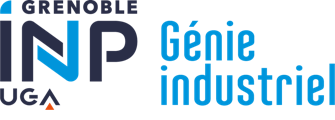
</div>

<center>

# **CASE STUDY IN DECISION AIDING AND ARTIFICIAL INTELLIGENCE**

**Predicting the consumption of healthcare products: A hands-on experience with Supervised Learning**
<br>
<br>
Doga Yilmaz<br>
Maria Fernanda Padilla<br>
Tom Nikolas Schmidt

The following code deals with the prediction of the monthly need for medication. The structure is divided into the general analysis of the available data, the breakdown of the data for each hospital and the prediction for the individual drugs per hospital site.
<br>

We performed linear regression, XGB regression, and random forest regression per hospital for all drugs with the UCD codes as dummy variables, as well as attempted to perform regression for each UCD Ccode individually.

In [ ]:
# Import packages needed
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import itertools
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from scipy.stats import chi2_contingency
from dateutil.relativedelta import relativedelta
import numpy as np
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Reading in the data
df= pd.read_csv(r'project_database.csv')

In [ ]:
# Get an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75692 entries, 0 to 75691
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        75692 non-null  int64  
 1   ID_REF            75689 non-null  object 
 2   ID_SITE_RATTACHE  75690 non-null  object 
 3   CODE_ATC          75685 non-null  object 
 4   HOSPI_CODE_UCD    75690 non-null  object 
 5   DATE_MOUV         75685 non-null  object 
 6   N_UFS             75692 non-null  int64  
 7   QUANTITY          75685 non-null  float64
 8   WEEK              75685 non-null  float64
 9   MONTH             75692 non-null  int64  
 10  YEAR              75685 non-null  float64
 11  N_ETB             75692 non-null  int64  
 12  POPULATION        75692 non-null  float64
 13  P_MEDICAL         75692 non-null  int64  
 14  PN_MEDICAL        75692 non-null  int64  
 15  LIT_HC            75685 non-null  float64
 16  LIT_HP            75692 non-null  float6

In [ ]:
# Drop the first column as it only contains index numbers
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
# Check missing values
df.isna().sum()

ID_REF              3
ID_SITE_RATTACHE    2
CODE_ATC            7
HOSPI_CODE_UCD      2
DATE_MOUV           7
N_UFS               0
QUANTITY            7
WEEK                7
MONTH               0
YEAR                7
N_ETB               0
POPULATION          0
P_MEDICAL           0
PN_MEDICAL          0
LIT_HC              7
LIT_HP              0
SEJ_MCO             0
SEJ_HAD             0
SEJ_PSY             0
SEJ_SSR             0
SEJ_SLD             0
dtype: int64

In [ ]:
# We drop the nan values as there are not many based on the size of our data
df=df.dropna(axis=0)

In [ ]:
# Get an overview on the data before using in terms of the number of unique values
print ('\nUnique values :  \n', df.nunique())


Unique values :  
 ID_REF                86
ID_SITE_RATTACHE       4
CODE_ATC              18
HOSPI_CODE_UCD        42
DATE_MOUV           2147
N_UFS                 65
QUANTITY            2138
WEEK                  53
MONTH                 12
YEAR                   7
N_ETB                  4
POPULATION            20
P_MEDICAL             18
PN_MEDICAL            20
LIT_HC                20
LIT_HP                19
SEJ_MCO               20
SEJ_HAD                7
SEJ_PSY               14
SEJ_SSR               19
SEJ_SLD               18
dtype: int64


In [ ]:
# Check how many medicines there are -> They have different data types
df.HOSPI_CODE_UCD.unique()

array([3400891996128, 3400891225037, 3400893875490, 3400892761527,
       3400892669236, 3400892761695, 3400892065366, 3400890837149,
       3400892729589, 3400891191226, 3400892745848, 3400892203645,
       3400893736135, 3400892075761, 3400893826706, 3400892697789,
       3400892508566, 3400892052120, 3400891235203, 3400892088310,
       3400893022634, '3400892075761', '3400893826706', '3400892697789',
       '3400892508566', '3400892052120', '3400891235203', '3400892088310',
       '3400893022634', '3400891996128', '3400891225037', '3400893875490',
       '3400892761527', '3400892669236', '3400892761695', '3400892065366',
       '3400890837149', '3400892729589', '3400891191226', '3400892745848',
       '3400892203645', '3400893736135'], dtype=object)

In [ ]:
# Change data type
df['YEAR'] = df['YEAR'].astype(int)
df['MONTH'] = df['MONTH'].astype(int)
df.MONTH.apply(lambda x: '0' + str(x) if len(str(x))==1 else str(x))
df['DATE']= (df['YEAR'].astype(str) + df['MONTH'].astype(str)).astype(int)
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m')

In [ ]:
# Numerical target variable --> Regression
df['QUANTITY'] = df['QUANTITY'].astype(int)

# Numerical independant/input variables
df['POPULATION'] = df['POPULATION'].astype(int)
df['LIT_HC'] = df['LIT_HC'].astype(int)
df['LIT_HP'] = df['LIT_HP'].astype(int)

# Categorial independant/input variables
df['ID_SITE_RATTACHE'] = df['ID_SITE_RATTACHE'].astype(str)
df['CODE_ATC'] = df['CODE_ATC'].astype(str)
df['HOSPI_CODE_UCD'] = df['HOSPI_CODE_UCD'].astype(str)


In [ ]:
# Get an overview of the data before using
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75685 entries, 0 to 75691
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_REF            75685 non-null  object        
 1   ID_SITE_RATTACHE  75685 non-null  object        
 2   CODE_ATC          75685 non-null  object        
 3   HOSPI_CODE_UCD    75685 non-null  object        
 4   DATE_MOUV         75685 non-null  object        
 5   N_UFS             75685 non-null  int64         
 6   QUANTITY          75685 non-null  int64         
 7   WEEK              75685 non-null  float64       
 8   MONTH             75685 non-null  int64         
 9   YEAR              75685 non-null  int64         
 10  N_ETB             75685 non-null  int64         
 11  POPULATION        75685 non-null  int64         
 12  P_MEDICAL         75685 non-null  int64         
 13  PN_MEDICAL        75685 non-null  int64         
 14  LIT_HC            7568

In [ ]:
# As we are aiming for the prediction of a monthly consumption, we do not need week data. Furthermore the Date_MOUV contains data about specific
# days, so we do not want any confusion with the days. In addition, there is already monthly data given in an extra column.
df.drop(['WEEK','DATE_MOUV'],axis=1,inplace=True)

In [ ]:
# Check the first entries of the dataframe
df.head(10)

,ID_REF,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,N_UFS,QUANTITY,MONTH,YEAR,N_ETB,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD,DATE
0,960148,HOSPI_1,N02BE01,3400891996128,1,10,6,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-06-01
1,960148,HOSPI_1,N02BE01,3400891996128,1,100,6,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-06-01
2,960148,HOSPI_1,N02BE01,3400891996128,1,100,7,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-07-01
3,960148,HOSPI_1,N02BE01,3400891996128,1,100,7,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-07-01
4,960148,HOSPI_1,N02BE01,3400891996128,1,200,7,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-07-01
5,960148,HOSPI_1,N02BE01,3400891996128,2,300,7,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-07-01
6,960148,HOSPI_1,N02BE01,3400891996128,1,40,7,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-07-01
7,960148,HOSPI_1,N02BE01,3400891996128,2,90,7,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-07-01
8,960148,HOSPI_1,N02BE01,3400891996128,2,120,7,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-07-01
9,960148,HOSPI_1,N02BE01,3400891996128,1,100,7,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-07-01


In [ ]:
# Get an overview on the data before using in terms of the number of unique values
print ('\nUnique values :  \n', df.nunique())


Unique values :  
 ID_REF                86
ID_SITE_RATTACHE       4
CODE_ATC              18
HOSPI_CODE_UCD        21
N_UFS                 65
QUANTITY            2138
MONTH                 12
YEAR                   7
N_ETB                  4
POPULATION            20
P_MEDICAL             18
PN_MEDICAL            20
LIT_HC                20
LIT_HP                19
SEJ_MCO               20
SEJ_HAD                7
SEJ_PSY               14
SEJ_SSR               19
SEJ_SLD               18
DATE                  79
dtype: int64


In [ ]:
#As the varıable ID_REF ıs a combınatıon of ID_SITE_RATTACHE and HOSPI_CODE_UCD and for dıfferent hospıtals ıt could be the same ID_REF for dıfferent medıcıne, we decıded to drop ıt

df.drop(['ID_REF'],axis=1,inplace=True)

In [ ]:
# Check the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75685 entries, 0 to 75691
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_SITE_RATTACHE  75685 non-null  object        
 1   CODE_ATC          75685 non-null  object        
 2   HOSPI_CODE_UCD    75685 non-null  object        
 3   N_UFS             75685 non-null  int64         
 4   QUANTITY          75685 non-null  int64         
 5   MONTH             75685 non-null  int64         
 6   YEAR              75685 non-null  int64         
 7   N_ETB             75685 non-null  int64         
 8   POPULATION        75685 non-null  int64         
 9   P_MEDICAL         75685 non-null  int64         
 10  PN_MEDICAL        75685 non-null  int64         
 11  LIT_HC            75685 non-null  int64         
 12  LIT_HP            75685 non-null  int64         
 13  SEJ_MCO           75685 non-null  int64         
 14  SEJ_HAD           7568

In [ ]:
# Create a dataframe for each hospital -> df_hospi_1, df_hospi_2, df_hospi_3, df_hospi_4
unique_sites = df['ID_SITE_RATTACHE'].unique()

for site in unique_sites:
    # Create a variable name based on the site value
    var_name = f"df_{site.replace(' ', '_').replace('-', '_')}"  # Replace spaces and hyphens with underscores
    globals()[var_name] = df[df['ID_SITE_RATTACHE'] == site]


## **Analyzing Hospital 3**

In [ ]:
# Check the dataframe
df_HOSPI_3

,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,N_UFS,QUANTITY,MONTH,YEAR,N_ETB,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD,DATE
38172,HOSPI_3,N02BE01,3400891996128,13,1790,5,2014,50,1107398,1158,7129,2063,521,117781,594,2903,1302,97,2014-05-01
38173,HOSPI_3,N02BE01,3400891996128,47,8440,5,2014,50,1107398,1158,7129,2063,521,117781,594,2903,1302,97,2014-05-01
38174,HOSPI_3,N02BE01,3400891996128,21,4840,5,2014,50,1107398,1158,7129,2063,521,117781,594,2903,1302,97,2014-05-01
38175,HOSPI_3,N02BE01,3400891996128,63,8440,5,2014,50,1107398,1158,7129,2063,521,117781,594,2903,1302,97,2014-05-01
38176,HOSPI_3,N02BE01,3400891996128,1,100,5,2014,50,1107398,1158,7129,2063,521,117781,594,2903,1302,97,2014-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65758,HOSPI_3,J01CR05,3400893022634,1,100,2,2019,50,1171739,1318,7578,2011,529,116793,1099,2297,1169,124,2019-02-01
65759,HOSPI_3,J01CR05,3400893022634,1,100,2,2019,50,1171739,1318,7578,2011,529,116793,1099,2297,1169,124,2019-02-01
65760,HOSPI_3,J01CR05,3400893022634,1,100,2,2019,50,1171739,1318,7578,2011,529,116793,1099,2297,1169,124,2019-02-01
65761,HOSPI_3,J01CR05,3400893022634,2,200,3,2019,50,1171739,1318,7578,2011,529,116793,1099,2297,1169,124,2019-03-01


In [ ]:
# Get an overview of the data
df_HOSPI_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27591 entries, 38172 to 65762
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_SITE_RATTACHE  27591 non-null  object        
 1   CODE_ATC          27591 non-null  object        
 2   HOSPI_CODE_UCD    27591 non-null  object        
 3   N_UFS             27591 non-null  int64         
 4   QUANTITY          27591 non-null  int64         
 5   MONTH             27591 non-null  int64         
 6   YEAR              27591 non-null  int64         
 7   N_ETB             27591 non-null  int64         
 8   POPULATION        27591 non-null  int64         
 9   P_MEDICAL         27591 non-null  int64         
 10  PN_MEDICAL        27591 non-null  int64         
 11  LIT_HC            27591 non-null  int64         
 12  LIT_HP            27591 non-null  int64         
 13  SEJ_MCO           27591 non-null  int64         
 14  SEJ_HAD           

In [ ]:
# Group the data
df_HOSPI_3= df_HOSPI_3.groupby(['CODE_ATC','HOSPI_CODE_UCD','DATE']).agg({'QUANTITY':'sum','N_ETB':'mean','N_UFS':'mean','POPULATION':'mean','P_MEDICAL':'mean','PN_MEDICAL':'mean','LIT_HC':'mean','LIT_HP':'mean','SEJ_MCO':'mean','SEJ_HAD':'mean', 'SEJ_PSY':'mean','SEJ_SSR':'mean','SEJ_SLD':'mean'})

In [ ]:
df_HOSPI_3

QUANTITY  N_ETB     N_UFS  POPULATION  \
CODE_ATC HOSPI_CODE_UCD DATE                                                
A03AX12  3400893736135  2014-05-01      2590   50.0  6.300000   1107398.0   
                        2014-06-01      5770   50.0  6.217391   1107398.0   
                        2014-07-01      6060   50.0  7.363636   1107398.0   
                        2014-08-01      5820   50.0  7.350000   1107398.0   
                        2014-09-01      6080   50.0  6.954545   1107398.0   
...                                      ...    ...       ...         ...   
R03AC02  3400892745848  2019-08-01       140   50.0  1.166667   1171739.0   
                        2019-09-01       240   50.0  1.181818   1171739.0   
                        2019-10-01       260   50.0  1.200000   1171739.0   
                        2019-11-01       410   50.0  1.666667   1171739.0   
                        2019-12-01       140   50.0  1.166667   1171739.0   

                                    P_MEDICAL  PN_MEDICAL  LIT_HC  LIT_HP  \
CODE_ATC HOSPI_CODE_UCD DATE                                                
A03AX12  3400893736135  2014-05-01     1158.0      7129.0  2063.0   521.0   
                        2014-06-01     1158.0      7129.0  2063.0   521.0   
                        2014-07-01     1158.0      7129.0  2063.0   521.0   
                        2014-08-01     1158.0      7129.0  2063.0   521.0   
                        2014-09-01     1158.0      7129.0  2063.0   521.0   
...                                       ...         ...     ...     ...   
R03AC02  3400892745848  2019-08-01     1318.0      7578.0  2011.0   529.0   
                        2019-09-01     1318.0      7578.0  2011.0   529.0   
                        2019-10-01     1318.0      7578.0  2011.0   529.0   
                        2019-11-01     1318.0      7578.0  2011.0   529.0   
                        2019-12-01     1318.0      7578.0  2011.0   529.0   

                                     SEJ_MCO  SEJ_HAD  SEJ_PSY  SEJ_SSR  \
CODE_ATC HOSPI_CODE_UCD DATE                                              
A03AX12  3400893736135  2014-05-01  117781.0    594.0   2903.0   1302.0   
                        2014-06-01  117781.0    594.0   2903.0   1302.0   
                        2014-07-01  117781.0    594.0   2903.0   1302.0   
                        2014-08-01  117781.0    594.0   2903.0   1302.0   
                        2014-09-01  117781.0    594.0   2903.0   1302.0   
...                                      ...      ...      ...      ...   
R03AC02  3400892745848  2019-08-01  116793.0   1099.0   2297.0   1169.0   
                        2019-09-01  116793.0   1099.0   2297.0   1169.0   
                        2019-10-01  116793.0   1099.0   2297.0   1169.0   
                        2019-11-01  116793.0   1099.0   2297.0   1169.0   
                        2019-12-01  116793.0   1099.0   2297.0   1169.0   

                                    SEJ_SLD  
CODE_ATC HOSPI_CODE_UCD DATE                 
A03AX12  3400893736135  2014-05-01     97.0  
                        2014-06-01     97.0  
                        2014-07-01     97.0  
                        2014-08-01     97.0  
                        2014-09-01     97.0  
...                                     ...  
R03AC02  3400892745848  2019-08-01    124.0  
                        2019-09-01    124.0  
                        2019-10-01    124.0  
                        2019-11-01    124.0  
                        2019-12-01    124.0  

[1398 rows x 13 columns]

In [ ]:
df_HOSPI_3.reset_index(inplace=True)

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

**Categorial input variables**

Since it is not possible to compute the correlation coefficient between a numerical and a categorial variable, we could not compute the correlation matrix for all independant input as in the exercise. Hence we had to follow a different approach to find out which categorial independant variables influence the dependant variable "Quantity" significantly and are independant of each other.

Investigate which categorial independant variables:

influence dependant variable "Quantity": This is done by first introducing (n-1) dummy variables for the n different values of the categorial variable. Afterwards a regression with the dummy variables and the dependent varibale is conducted and the R^2 score of this regression investigated. With the R^2 score, it can be quanitfied how much of the dependat variable's variance the categorial varibale explains.
are independant of each other: Make a pairwise Chi-squared-test to figure out which of the relevant categorial variables are independent.
This code aims to examine the effect of each categorical variable on the target variable "QUANTITY" using linear regressions. The use of one-hot encoding allows categorical data to be used in a form understood by linear regression models. The R-squared value indicates how well the model explains the variation in the target variable.

In [ ]:
# Check the influence of the categorical variables
categorical_variables= ['CODE_ATC','HOSPI_CODE_UCD','DATE']

for categorical_variable in categorical_variables:
    df_encoded = pd.get_dummies(df_HOSPI_3, columns=[categorical_variable], prefix=[categorical_variable], drop_first=True)
    dummy_variable_columns = [df_col for df_col in df_encoded.columns if categorical_variable in df_col]

    dummy_variable_columns_with_quantity = dummy_variable_columns.copy()
    dummy_variable_columns_with_quantity.append("QUANTITY")

    new_df = df_encoded[dummy_variable_columns_with_quantity]

    print("Categorical variable:", categorical_variable)
    print("Columns to be used for training:", dummy_variable_columns)
    print("Shape of X (features):", new_df[dummy_variable_columns].shape)
    print("Shape of y (target):", new_df["QUANTITY"].shape)

    # Check if new_df has data before fitting the model
    if not new_df.empty and dummy_variable_columns:
        model = LinearRegression()
        model.fit(new_df[dummy_variable_columns], new_df["QUANTITY"])
        predictions = model.predict(new_df[dummy_variable_columns])
        r2 = r2_score(new_df["QUANTITY"], predictions)
        print("R-squared score for", categorical_variable, ":", r2)
    else:
        print("No data for this code.")

    print("-" * 50)

Categorical variable: CODE_ATC
Columns to be used for training: ['CODE_ATC_A12BA01', 'CODE_ATC_B01AB05', 'CODE_ATC_B01AC06', 'CODE_ATC_B05XA03', 'CODE_ATC_B05XA09', 'CODE_ATC_C01CA03', 'CODE_ATC_C03CA01', 'CODE_ATC_H02AB06', 'CODE_ATC_J01CR05', 'CODE_ATC_M03BX01', 'CODE_ATC_N02AX02', 'CODE_ATC_N02BE01', 'CODE_ATC_N05BA04', 'CODE_ATC_N05BA12', 'CODE_ATC_N05CF01', 'CODE_ATC_N05CF02', 'CODE_ATC_R03AC02']
Shape of X (features): (1398, 17)
Shape of y (target): (1398,)
R-squared score for CODE_ATC : 0.553827711577664
--------------------------------------------------
Categorical variable: HOSPI_CODE_UCD
Columns to be used for training: ['HOSPI_CODE_UCD_3400891191226', 'HOSPI_CODE_UCD_3400891225037', 'HOSPI_CODE_UCD_3400891235203', 'HOSPI_CODE_UCD_3400891996128', 'HOSPI_CODE_UCD_3400892052120', 'HOSPI_CODE_UCD_3400892065366', 'HOSPI_CODE_UCD_3400892075761', 'HOSPI_CODE_UCD_3400892088310', 'HOSPI_CODE_UCD_3400892203645', 'HOSPI_CODE_UCD_3400892508566', 'HOSPI_CODE_UCD_3400892669236', 'HOSPI_CO

In [ ]:
# Chi-squared test to check which variables are independent
categorical_variables = [ 'CODE_ATC','HOSPI_CODE_UCD','DATE']

# Get all pairwise combinations of categorical variables
combinations = list(itertools.combinations(categorical_variables, 2))

# Perform chi-squared test for each pair of columns
for combo in combinations:
    observed = pd.crosstab(df_HOSPI_3[combo[0]], df_HOSPI_3[combo[1]])
    chi2, p, dof, expected = chi2_contingency(observed)
    print(f"Chi-squared test for columns {combo}:")
    print(f"P-value: {p}")
    #print(observed)
    print("-" * 50)

Chi-squared test for columns ('CODE_ATC', 'HOSPI_CODE_UCD'):
P-value: 0.0
--------------------------------------------------
Chi-squared test for columns ('CODE_ATC', 'DATE'):
P-value: 1.0
--------------------------------------------------
Chi-squared test for columns ('HOSPI_CODE_UCD', 'DATE'):
P-value: 1.0
--------------------------------------------------


These features seem to be dependent:'HOSPI_CODE_UCD', 'CODE_ATC'

We decided to only remove CODE_ATC at this point because this contains information about the UCD codes.

In [ ]:
df_HOSPI_3.drop(['CODE_ATC'],axis=1,inplace=True)

**Numerical input variables**
<br>
Here we use the same procedure to check the correlation for numerical variables as used in the excercise (check correlation, remove outliers).

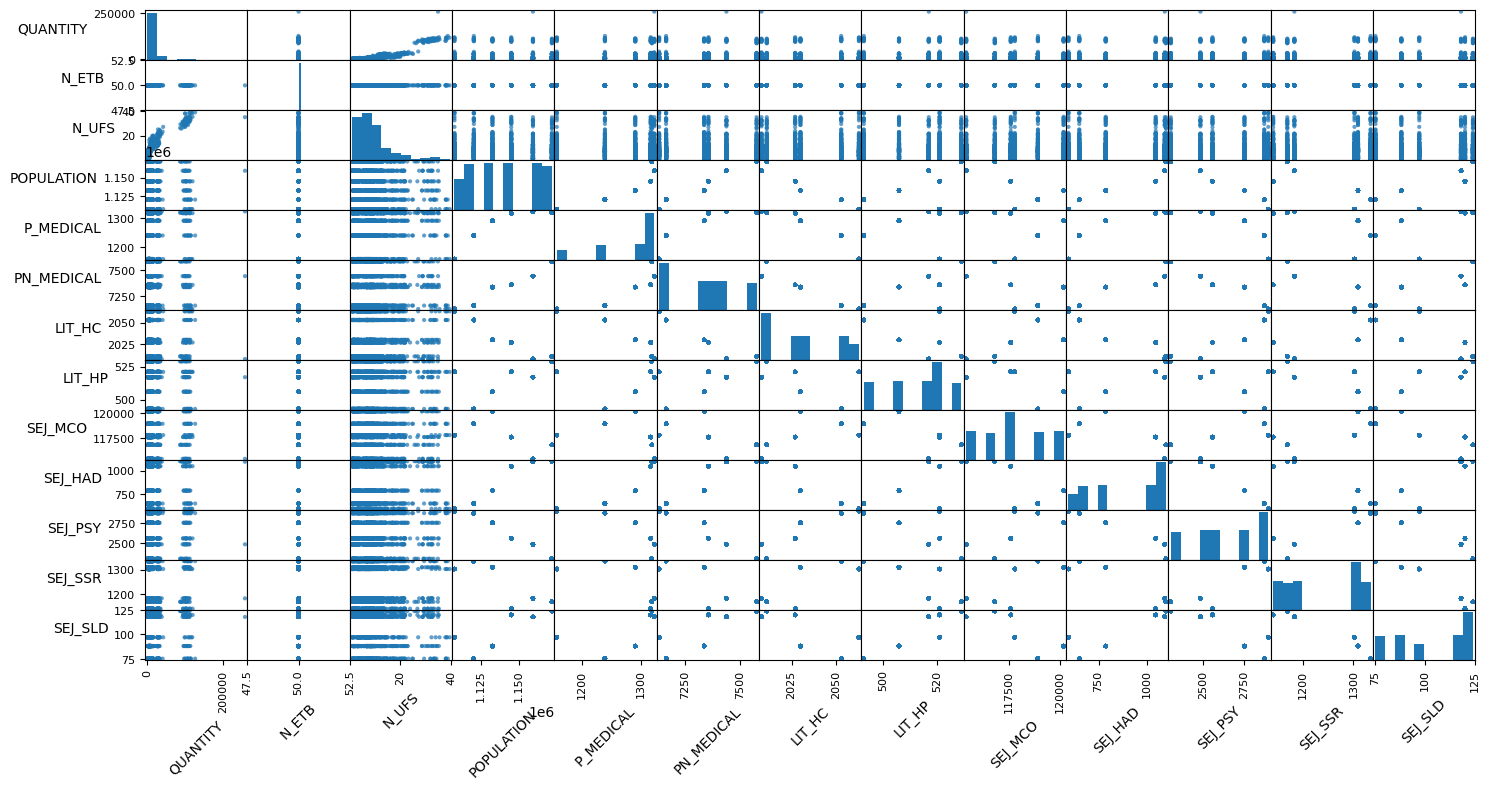

In [ ]:
# Look at the interactions between the variables.
axes=pd.plotting.scatter_matrix(df_HOSPI_3,figsize=(15, 8),alpha=0.7 )
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
# It is the same for one hospital so no need to keep it

df_HOSPI_3.drop(['N_ETB'],axis=1,inplace=True)

<Axes: >

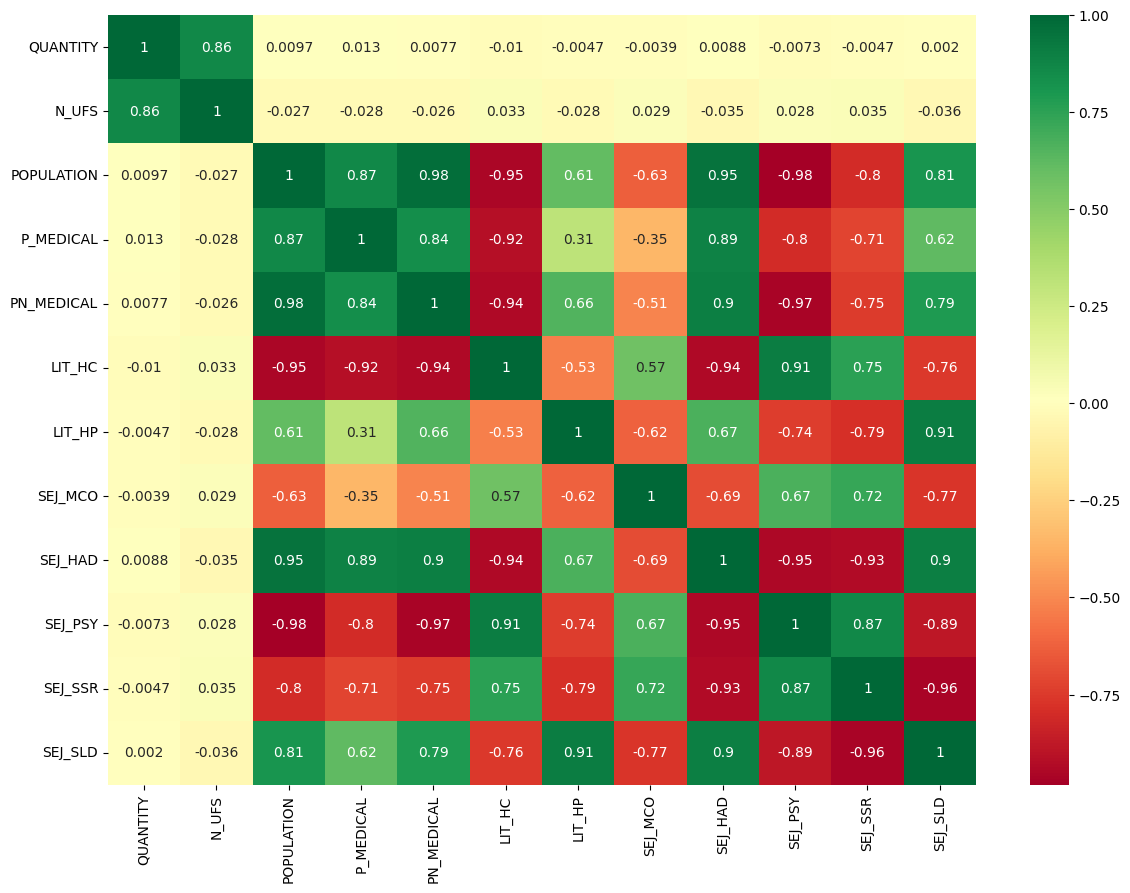

In [ ]:
plt.figure(figsize=(14,10))
# seaborn has an easy method to showcase heatmap
sns.heatmap(df_HOSPI_3.corr(method='pearson'), annot=True,cmap ='RdYlGn')

In [ ]:
# Check if feature is always zero
len(df_HOSPI_3.SEJ_PSY== 0.0)

1398

In [ ]:
df_HOSPI_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   HOSPI_CODE_UCD  1398 non-null   object        
 1   DATE            1398 non-null   datetime64[ns]
 2   QUANTITY        1398 non-null   int64         
 3   N_UFS           1398 non-null   float64       
 4   POPULATION      1398 non-null   float64       
 5   P_MEDICAL       1398 non-null   float64       
 6   PN_MEDICAL      1398 non-null   float64       
 7   LIT_HC          1398 non-null   float64       
 8   LIT_HP          1398 non-null   float64       
 9   SEJ_MCO         1398 non-null   float64       
 10  SEJ_HAD         1398 non-null   float64       
 11  SEJ_PSY         1398 non-null   float64       
 12  SEJ_SSR         1398 non-null   float64       
 13  SEJ_SLD         1398 non-null   float64       
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
m

In [ ]:
# Check how many variables contain zero values
zero_counts = (df_HOSPI_3 == 0).sum()

In [ ]:
zero_counts

HOSPI_CODE_UCD    0
DATE              0
QUANTITY          0
N_UFS             0
POPULATION        0
P_MEDICAL         0
PN_MEDICAL        0
LIT_HC            0
LIT_HP            0
SEJ_MCO           0
SEJ_HAD           0
SEJ_PSY           0
SEJ_SSR           0
SEJ_SLD           0
dtype: int64

In [ ]:
# SEJ_PSY has high correlation with other features
# PN_MEDICAL same situation
df_HOSPI_3.drop(['PN_MEDICAL', 'SEJ_PSY'],axis=1,inplace=True)

df_HOSPI_3.drop(['SEJ_SLD', 'POPULATION','LIT_HC'],axis=1,inplace=True)

<Axes: >

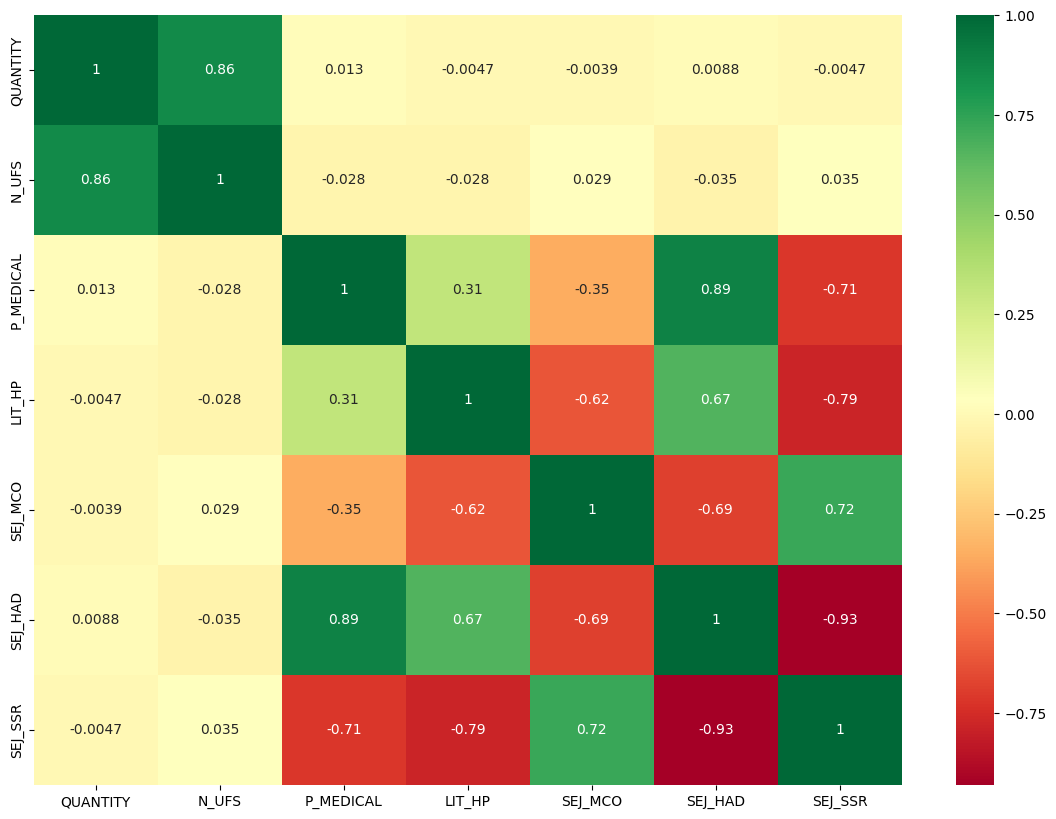

In [ ]:
plt.figure(figsize=(14,10))
# seaborn has an easy method to showcase heatmap
sns.heatmap(df_HOSPI_3.corr(method='pearson'), annot=True,cmap ='RdYlGn')

**Numerical and categorial variables**
<br>
We wanted to check how the categorical variable HOSPI_CODE_UCD  correlates with numerical variables.

In [ ]:
df_HOSPI_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   HOSPI_CODE_UCD  1398 non-null   object        
 1   DATE            1398 non-null   datetime64[ns]
 2   QUANTITY        1398 non-null   int64         
 3   N_UFS           1398 non-null   float64       
 4   P_MEDICAL       1398 non-null   float64       
 5   LIT_HP          1398 non-null   float64       
 6   SEJ_MCO         1398 non-null   float64       
 7   SEJ_HAD         1398 non-null   float64       
 8   SEJ_SSR         1398 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 98.4+ KB


In [ ]:
numerical_variables= ['N_UFS', 'LIT_HP', 'P_MEDICAL', 'SEJ_MCO','SEJ_HAD', 'SEJ_SSR']
categorical_variable='HOSPI_CODE_UCD'


for numerical_variable in numerical_variables:
    df_encoded = pd.get_dummies(df_HOSPI_3, columns=[categorical_variable], prefix=[categorical_variable], drop_first=True)
    dummy_variable_columns = [df_col for df_col in df_encoded.columns if categorical_variable in df_col]

    dummy_variable_columns_with_quantity = dummy_variable_columns.copy()
    dummy_variable_columns_with_quantity.append(numerical_variable)

    new_df = df_encoded[dummy_variable_columns_with_quantity]

    print("NUmerical variable:", numerical_variable)
    print("Columns to be used for training:", dummy_variable_columns)
    print("Shape of X (features):", new_df[dummy_variable_columns].shape)
    print("Shape of y (target):", new_df[numerical_variable].shape)

    # Check if new_df has data before fitting the model
    if not new_df.empty and dummy_variable_columns:
        model = LinearRegression()
        model.fit(new_df[dummy_variable_columns], new_df[numerical_variable])
        predictions = model.predict(new_df[dummy_variable_columns])
        r2 = r2_score(new_df[numerical_variable], predictions)
        print("R-squared score for", categorical_variable, ":", r2)
    else:
        print("No data for this code.")

    print("-" * 50)


NUmerical variable: N_UFS
Columns to be used for training: ['HOSPI_CODE_UCD_3400891191226', 'HOSPI_CODE_UCD_3400891225037', 'HOSPI_CODE_UCD_3400891235203', 'HOSPI_CODE_UCD_3400891996128', 'HOSPI_CODE_UCD_3400892052120', 'HOSPI_CODE_UCD_3400892065366', 'HOSPI_CODE_UCD_3400892075761', 'HOSPI_CODE_UCD_3400892088310', 'HOSPI_CODE_UCD_3400892203645', 'HOSPI_CODE_UCD_3400892508566', 'HOSPI_CODE_UCD_3400892669236', 'HOSPI_CODE_UCD_3400892697789', 'HOSPI_CODE_UCD_3400892729589', 'HOSPI_CODE_UCD_3400892745848', 'HOSPI_CODE_UCD_3400892761527', 'HOSPI_CODE_UCD_3400892761695', 'HOSPI_CODE_UCD_3400893022634', 'HOSPI_CODE_UCD_3400893736135', 'HOSPI_CODE_UCD_3400893826706', 'HOSPI_CODE_UCD_3400893875490']
Shape of X (features): (1398, 20)
Shape of y (target): (1398,)
R-squared score for HOSPI_CODE_UCD : 0.9491635666609501
--------------------------------------------------
NUmerical variable: LIT_HP
Columns to be used for training: ['HOSPI_CODE_UCD_3400891191226', 'HOSPI_CODE_UCD_3400891225037', 'HOSP

In [ ]:
# Changa datatype
df_HOSPI_3['N_UFS'] = df_HOSPI_3['N_UFS'].astype(int)
df_HOSPI_3['P_MEDICAL'] = df_HOSPI_3['P_MEDICAL'].astype(int)
df_HOSPI_3['LIT_HP'] = df_HOSPI_3['LIT_HP'].astype(int)
df_HOSPI_3['SEJ_MCO'] = df_HOSPI_3['SEJ_MCO'].astype(int)
df_HOSPI_3['SEJ_HAD'] = df_HOSPI_3['SEJ_HAD'].astype(int)
df_HOSPI_3['SEJ_SSR'] = df_HOSPI_3['SEJ_SSR'].astype(int)

### **Outliers of Hospital 3**

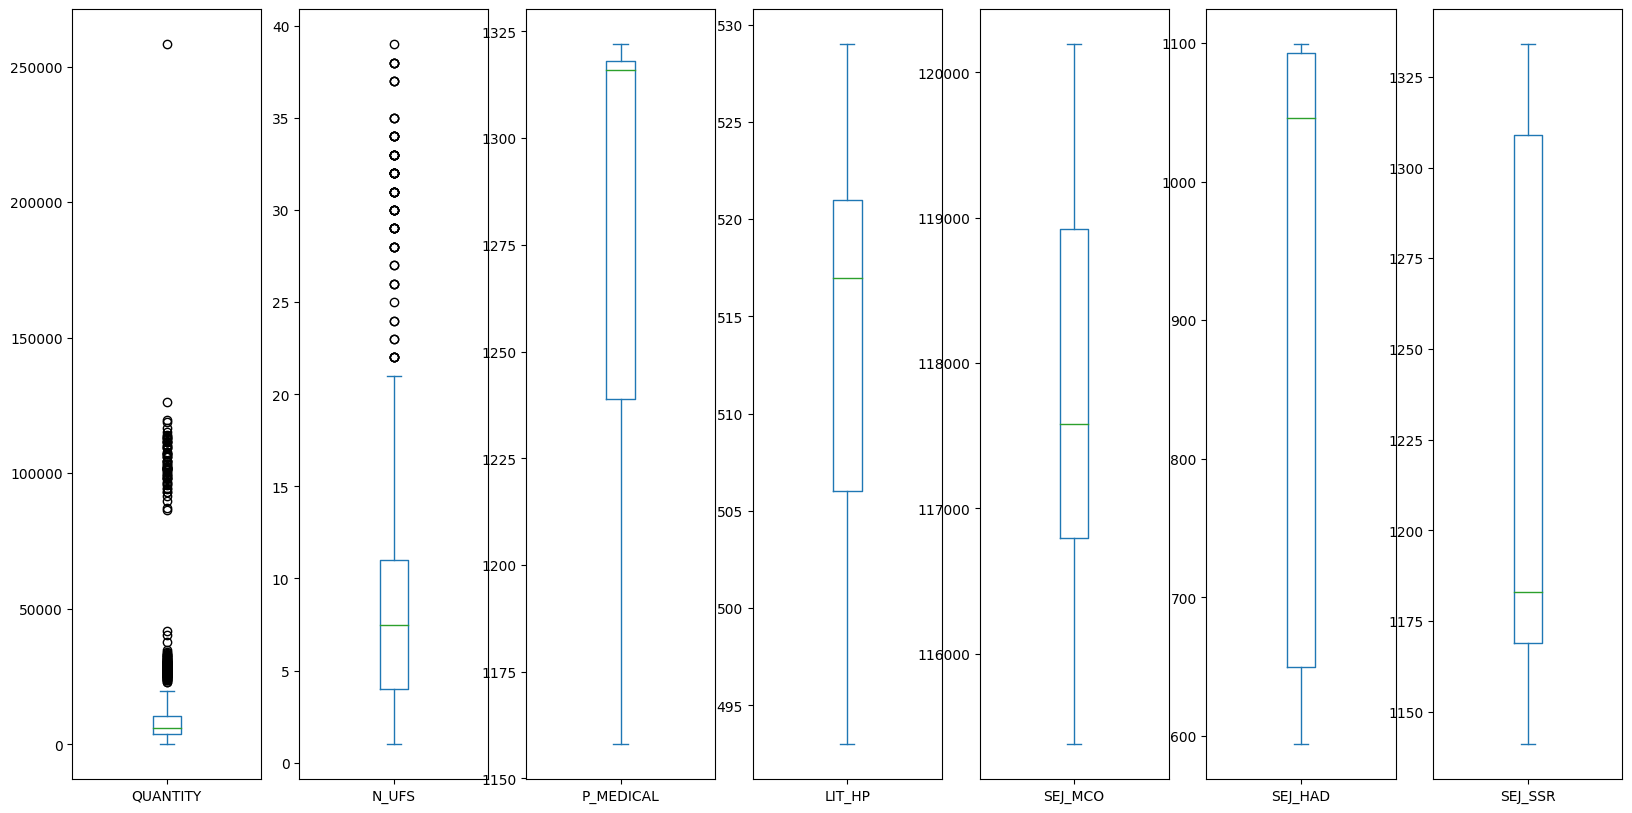

In [ ]:
# Outliers checking using boxplot
df_HOSPI_3.plot(kind='box', subplots=True, figsize=(20, 10))
plt.show()

In [ ]:
# Split date into year and months
df_HOSPI_3['YEAR'] = df_HOSPI_3['DATE'].dt.year
df_HOSPI_3['MONTH'] = df_HOSPI_3['DATE'].dt.month

In [ ]:
df_HOSPI_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   HOSPI_CODE_UCD  1398 non-null   object        
 1   DATE            1398 non-null   datetime64[ns]
 2   QUANTITY        1398 non-null   int64         
 3   N_UFS           1398 non-null   int64         
 4   P_MEDICAL       1398 non-null   int64         
 5   LIT_HP          1398 non-null   int64         
 6   SEJ_MCO         1398 non-null   int64         
 7   SEJ_HAD         1398 non-null   int64         
 8   SEJ_SSR         1398 non-null   int64         
 9   YEAR            1398 non-null   int64         
 10  MONTH           1398 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 120.3+ KB


In [ ]:
# Drop year
df_HOSPI_3.drop(['DATE'],axis=1,inplace=True)

In [ ]:
# Select columns to normalize
columns_to_normalize = [col for col in df_HOSPI_3.columns if col not in ['HOSPI_CODE_UCD', 'YEAR', 'MONTH']]

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_HOSPI_3[columns_to_normalize] = scaler.fit_transform(df_HOSPI_3[columns_to_normalize])


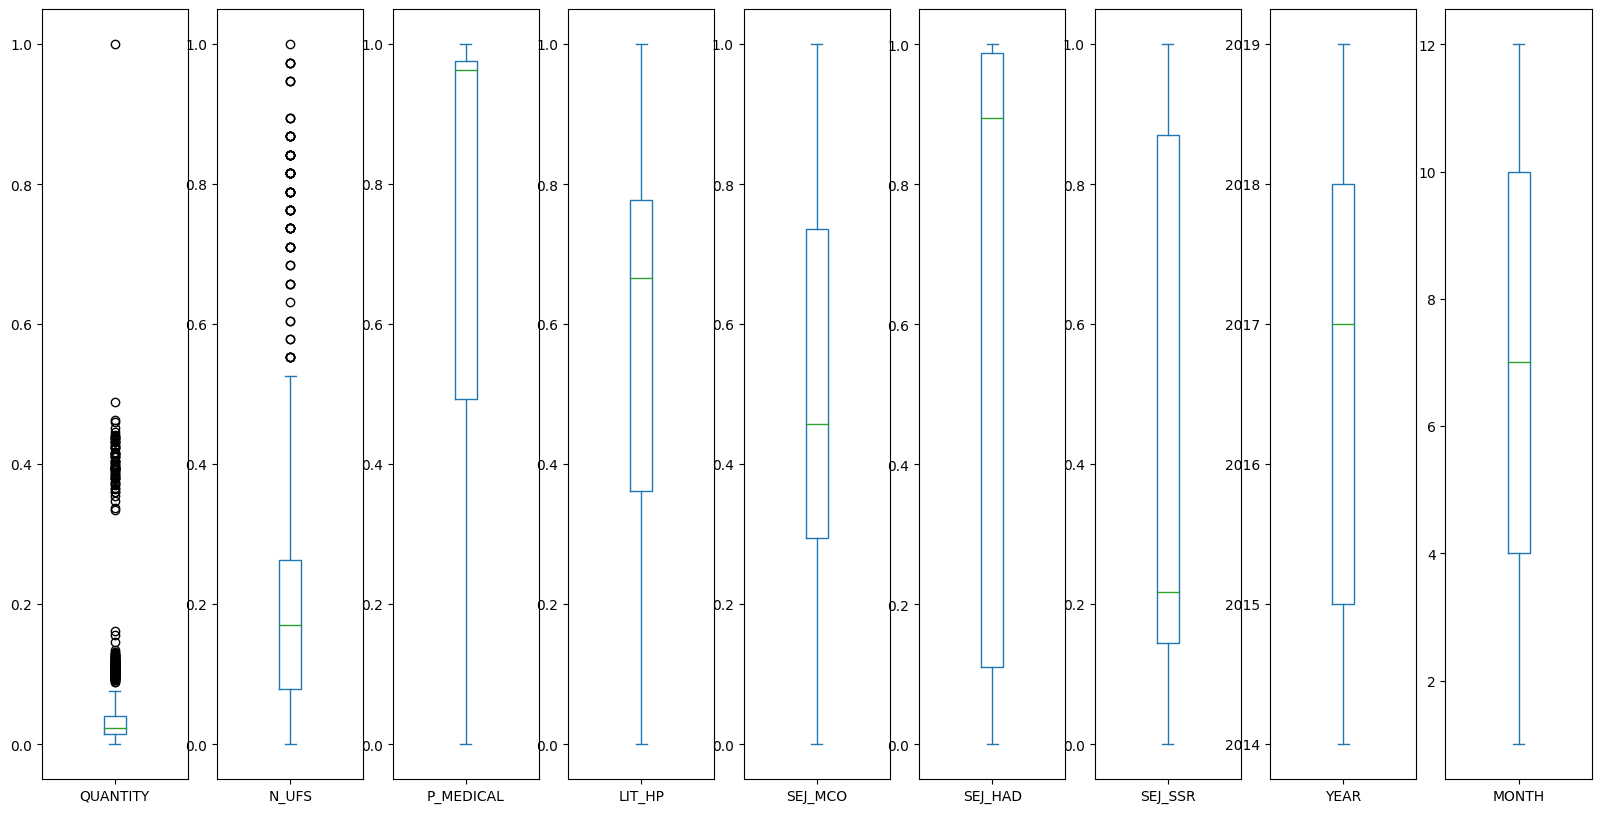

In [ ]:
# Outliers checking using boxplot -> We did not remove outliers here as we tried to remove them before and it did not change anything
df_HOSPI_3.plot(kind='box', subplots=True, figsize=(20, 10))
plt.show()

In [ ]:
# We have data for each medicine
for j in df_HOSPI_3.HOSPI_CODE_UCD.unique():
    df_temp= df_HOSPI_3[df_HOSPI_3.HOSPI_CODE_UCD==j]
    print(df_temp.YEAR.nunique())

6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


In [ ]:
df_HOSPI_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HOSPI_CODE_UCD  1398 non-null   object 
 1   QUANTITY        1398 non-null   float64
 2   N_UFS           1398 non-null   float64
 3   P_MEDICAL       1398 non-null   float64
 4   LIT_HP          1398 non-null   float64
 5   SEJ_MCO         1398 non-null   float64
 6   SEJ_HAD         1398 non-null   float64
 7   SEJ_SSR         1398 non-null   float64
 8   YEAR            1398 non-null   int64  
 9   MONTH           1398 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 109.3+ KB


In [ ]:
# Final grouping and saving the model
model=df_HOSPI_3.groupby(['HOSPI_CODE_UCD','YEAR','MONTH']).agg({'QUANTITY':'sum','N_UFS':'mean','P_MEDICAL':'mean','LIT_HP':'mean','SEJ_MCO':'mean', 'SEJ_HAD':'mean','SEJ_SSR':'mean'})

In [ ]:
model.head(24)

QUANTITY     N_UFS  P_MEDICAL    LIT_HP   SEJ_MCO  \
HOSPI_CODE_UCD YEAR MONTH                                                      
3400890837149  2014 5      0.003276  0.052632   0.000000  0.777778  0.499273   
                    6      0.010363  0.052632   0.000000  0.777778  0.499273   
                    7      0.011835  0.052632   0.000000  0.777778  0.499273   
                    8      0.014430  0.078947   0.000000  0.777778  0.499273   
                    9      0.010441  0.052632   0.000000  0.777778  0.499273   
                    10     0.014469  0.078947   0.000000  0.777778  0.499273   
                    11     0.011061  0.078947   0.000000  0.777778  0.499273   
                    12     0.011564  0.078947   0.000000  0.777778  0.499273   
               2015 1      0.012184  0.078947   0.493902  0.000000  0.736558   
                    2      0.010867  0.052632   0.493902  0.000000  0.736558   
                    3      0.012919  0.078947   0.493902  0.000000  0.736558   
                    4      0.015282  0.078947   0.493902  0.000000  0.736558   
                    5      0.013733  0.105263   0.493902  0.000000  0.736558   
                    6      0.012416  0.078947   0.493902  0.000000  0.736558   
                    7      0.012571  0.078947   0.493902  0.000000  0.736558   
                    8      0.014430  0.105263   0.493902  0.000000  0.736558   
                    9      0.016095  0.078947   0.493902  0.000000  0.736558   
                    10     0.015785  0.078947   0.493902  0.000000  0.736558   
                    11     0.015592  0.105263   0.493902  0.000000  0.736558   
                    12     0.015321  0.105263   0.493902  0.000000  0.736558   
               2016 1      0.018845  0.105263   0.804878  0.361111  1.000000   
                    2      0.017567  0.105263   0.804878  0.361111  1.000000   
                    3      0.022098  0.105263   0.804878  0.361111  1.000000   
                    4      0.015204  0.052632   0.804878  0.361111  1.000000   

                            SEJ_HAD   SEJ_SSR  
HOSPI_CODE_UCD YEAR MONTH                      
3400890837149  2014 5      0.000000  0.834197  
                    6      0.000000  0.834197  
                    7      0.000000  0.834197  
                    8      0.000000  0.834197  
                    9      0.000000  0.834197  
                    10     0.000000  0.834197  
                    11     0.000000  0.834197  
                    12     0.000000  0.834197  
               2015 1      0.110891  1.000000  
                    2      0.110891  1.000000  
                    3      0.110891  1.000000  
                    4      0.110891  1.000000  
                    5      0.110891  1.000000  
                    6      0.110891  1.000000  
                    7      0.110891  1.000000  
                    8      0.110891  1.000000  
                    9      0.110891  1.000000  
                    10     0.110891  1.000000  
                    11     0.110891  1.000000  
                    12     0.110891  1.000000  
               2016 1      0.382178  0.870466  
                    2      0.382178  0.870466  
                    3      0.382178  0.870466  
                    4      0.382178  0.870466

In [ ]:
model.reset_index(inplace=True)

In [ ]:
model

,HOSPI_CODE_UCD,YEAR,MONTH,QUANTITY,N_UFS,P_MEDICAL,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_SSR
0,3400890837149,2014,5,0.003276,0.052632,0.00000,0.777778,0.499273,0.0,0.834197
1,3400890837149,2014,6,0.010363,0.052632,0.00000,0.777778,0.499273,0.0,0.834197
2,3400890837149,2014,7,0.011835,0.052632,0.00000,0.777778,0.499273,0.0,0.834197
3,3400890837149,2014,8,0.014430,0.078947,0.00000,0.777778,0.499273,0.0,0.834197
4,3400890837149,2014,9,0.010441,0.052632,0.00000,0.777778,0.499273,0.0,0.834197
...,...,...,...,...,...,...,...,...,...,...
1393,3400893875490,2019,8,0.047720,0.342105,0.97561,1.000000,0.294166,1.0,0.145078
1394,3400893875490,2019,9,0.047061,0.342105,0.97561,1.000000,0.294166,1.0,0.145078
1395,3400893875490,2019,10,0.052290,0.342105,0.97561,1.000000,0.294166,1.0,0.145078
1396,3400893875490,2019,11,0.048394,0.421053,0.97561,1.000000,0.294166,1.0,0.145078


In [ ]:
# Encode the UCD code and save the model for the single regressions for each medicine later
df_UCD_regression_Hospi_3 = model
model = pd.get_dummies(model, columns=["HOSPI_CODE_UCD","MONTH"], prefix=["HOSPI_CODE_UCD", "MONTH"])
model

,YEAR,QUANTITY,N_UFS,P_MEDICAL,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_SSR,HOSPI_CODE_UCD_3400890837149,HOSPI_CODE_UCD_3400891191226,HOSPI_CODE_UCD_3400891225037,HOSPI_CODE_UCD_3400891235203,HOSPI_CODE_UCD_3400891996128,HOSPI_CODE_UCD_3400892052120,HOSPI_CODE_UCD_3400892065366,HOSPI_CODE_UCD_3400892075761,HOSPI_CODE_UCD_3400892088310,HOSPI_CODE_UCD_3400892203645,HOSPI_CODE_UCD_3400892508566,HOSPI_CODE_UCD_3400892669236,HOSPI_CODE_UCD_3400892697789,HOSPI_CODE_UCD_3400892729589,HOSPI_CODE_UCD_3400892745848,HOSPI_CODE_UCD_3400892761527,HOSPI_CODE_UCD_3400892761695,HOSPI_CODE_UCD_3400893022634,HOSPI_CODE_UCD_3400893736135,HOSPI_CODE_UCD_3400893826706,HOSPI_CODE_UCD_3400893875490,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,2014,0.003276,0.052632,0.00000,0.777778,0.499273,0.0,0.834197,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2014,0.010363,0.052632,0.00000,0.777778,0.499273,0.0,0.834197,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2014,0.011835,0.052632,0.00000,0.777778,0.499273,0.0,0.834197,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2014,0.014430,0.078947,0.00000,0.777778,0.499273,0.0,0.834197,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2014,0.010441,0.052632,0.00000,0.777778,0.499273,0.0,0.834197,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,2019,0.047720,0.342105,0.97561,1.000000,0.294166,1.0,0.145078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1394,2019,0.047061,0.342105,0.97561,1.000000,0.294166,1.0,0.145078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1395,2019,0.052290,0.342105,0.97561,1.000000,0.294166,1.0,0.145078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1396,2019,0.048394,0.421053,0.97561,1.000000,0.294166,1.0,0.145078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


### **Data Splitting Hospital 3**

In [ ]:
X_val=model.drop(['QUANTITY'], axis=1)
y_val=model['QUANTITY']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_val,y_val, test_size=0.2,shuffle=True, random_state=42)

In [ ]:
X_train

,YEAR,N_UFS,P_MEDICAL,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_SSR,HOSPI_CODE_UCD_3400890837149,HOSPI_CODE_UCD_3400891191226,HOSPI_CODE_UCD_3400891225037,HOSPI_CODE_UCD_3400891235203,HOSPI_CODE_UCD_3400891996128,HOSPI_CODE_UCD_3400892052120,HOSPI_CODE_UCD_3400892065366,HOSPI_CODE_UCD_3400892075761,HOSPI_CODE_UCD_3400892088310,HOSPI_CODE_UCD_3400892203645,HOSPI_CODE_UCD_3400892508566,HOSPI_CODE_UCD_3400892669236,HOSPI_CODE_UCD_3400892697789,HOSPI_CODE_UCD_3400892729589,HOSPI_CODE_UCD_3400892745848,HOSPI_CODE_UCD_3400892761527,HOSPI_CODE_UCD_3400892761695,HOSPI_CODE_UCD_3400893022634,HOSPI_CODE_UCD_3400893736135,HOSPI_CODE_UCD_3400893826706,HOSPI_CODE_UCD_3400893875490,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
48,2018,0.105263,1.000000,0.666667,0.000000,0.988119,0.217617,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
155,2015,0.210526,0.493902,0.000000,0.736558,0.110891,1.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
756,2015,0.315789,0.493902,0.000000,0.736558,0.110891,1.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1070,2019,0.552632,0.975610,1.000000,0.294166,1.000000,0.145078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
303,2017,0.763158,0.963415,0.777778,0.458169,0.895050,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2015,0.289474,0.493902,0.000000,0.736558,0.110891,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1130,2018,0.236842,1.000000,0.666667,0.000000,0.988119,0.217617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1294,2017,0.157895,0.963415,0.777778,0.458169,0.895050,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
860,2018,0.000000,1.000000,0.666667,0.000000,0.988119,0.217617,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### **Overall Linear Regression Hospital 3**

In [ ]:
#model definition
l_reg=LinearRegression()

In [ ]:
# train the model
l_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# The model parameters
l_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
print(f"The accuracy after learning %2.3f Percent"%(l_reg.score(X_train,y_train)*100))

The accuracy after learning 95.087 Percent


In [ ]:
## Let's make the test with the 20% remaining data
## To do it, we use the function `predict`
l_pred= l_reg.predict(X_test)

In [ ]:
print(f"Accuracy_Score = %2.2f" % metrics.r2_score(y_test,l_pred))

Accuracy_Score = 0.99


### **Overall XGB Regression**

In [ ]:
# Try different Regression
#model definition
xgb_model = XGBRegressor(random_state=0,seed = 7)

# train the model
xgb_model.fit(X_train, y_train)
print(f"The accuracy after learning %2.3f Percent"%(xgb_model.score(X_train,y_train)*100))

## Let's make the test with the 20% remaining data
## To do it, we use the function `predict`
xgb_predictions = xgb_model.predict(X_test)
print(f"Accuracy_Score = %2.2f" % metrics.r2_score(y_test,xgb_predictions))

The accuracy after learning 99.955 Percent
Accuracy_Score = 0.99


### **Overall Random Forest Regression**

In [ ]:
#model definition
rf_model=RandomForestRegressor(n_estimators=30,random_state=42)

# train the model
rf_model.fit(X_train,y_train)
print(f"The accuracy after learning %2.3f Percent"%(rf_model.score(X_train,y_train)*100))

## Let's make the test with the 20% remaining data
## To do it, we use the function `predict`
rf_predictions = rf_model.predict(X_test)
print(f"Accuracy_Score = %2.2f" % metrics.r2_score(y_test,rf_predictions))

The accuracy after learning 99.345 Percent
Accuracy_Score = 0.99


### **Linear Regression Hospital 3**

Here we tried to run a regression for each UCD Code separatly, but the results were not good at all as some of the UCD Codes had really bad results. We think that there is not enough data for each medicine.

In [ ]:
df_UCD_regression_Hospi_3 = pd.get_dummies(df_UCD_regression_Hospi_3, columns=["MONTH"], prefix=["MONTH"])

In [ ]:
# Coefficients of the linear regression
prediction_list =[]
y_list=[]
# Initialize variables for the weighted average
total_weighted_r2 = 0
total_samples = 0


unique_UCD_Code_list = df_UCD_regression_Hospi_3['HOSPI_CODE_UCD'].unique()
result=pd.DataFrame(index=range(len(unique_UCD_Code_list)),columns=['HOSPI_CODE_UCD','MSE','RMSE','R2','MAPE','Accurancy'])
result['HOSPI_CODE_UCD'] = unique_UCD_Code_list

j = 0
for unique_UCD_Code in unique_UCD_Code_list:

  df_temp = df_UCD_regression_Hospi_3[df_UCD_regression_Hospi_3['HOSPI_CODE_UCD'] == unique_UCD_Code].copy().drop(['HOSPI_CODE_UCD'], axis=1)

  X_val=df_temp.drop(['QUANTITY'], axis=1)
  y_val=df_temp['QUANTITY']

  # Separate data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42, shuffle=True)

  model=LinearRegression()
  model.fit(X_train,y_train)

  # Make predictions
  predictions = model.predict(X_test)
  prediction_list.append(pd.DataFrame(predictions))
  y_list.append(y_test.copy())

  # Evaluate model performance using KPIs
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

  # Result table
  result['Accurancy'][j]= model.score(X_test,y_test)*100
  result['MSE'][j]= round(mse, 5)
  result['RMSE'][j]= round(np.sqrt(mse), 5)
  result['R2'][j]= round(r2, 5)
  result['MAPE'][j]= round(mape, 5)

  # Weighting of the R-squared value based on the number of data points in this group
  num_samples = len(y_val)
  total_weighted_r2 += r2 * num_samples
  total_samples += num_samples

  j=j+1
result['HOSPI_CODE_UCD'] = result['HOSPI_CODE_UCD'].astype(str)
result

,HOSPI_CODE_UCD,MSE,RMSE,R2,MAPE,Accurancy
0,3400890837149,0.00001,0.00296,0.64073,23.6941,64.072533
1,3400891191226,0.00003,0.00559,0.45906,22.33462,45.906196
2,3400891225037,0.00004,0.00655,0.70502,23.68844,70.50164
3,3400891235203,0.00003,0.00553,0.82529,34.16726,82.529006
4,3400891996128,0.00332,0.05765,0.37906,14.83395,37.906115
5,3400892052120,0.0,0.00182,0.54031,23.48789,54.030902
6,3400892065366,0.00002,0.00412,0.45856,16.84184,45.855938
7,3400892075761,0.00001,0.00256,0.42319,21.92875,42.319428
8,3400892088310,0.00001,0.00366,-0.61343,17.3257,-61.342884
9,3400892203645,0.00002,0.00393,0.17071,19.6678,17.071176


In [ ]:
# Mean of MAPE of the regression
result.MAPE.astype(float).mean()

75.11836523809522

In [ ]:
# Mean of R suared of the regression
result.R2.astype(float).mean()

0.23748333333333335

In [ ]:
# Calculate the weighted average of the R-squared values
total_regression_r2 = total_weighted_r2 / total_samples

print("Weighted R-squared for the entire regression:", total_regression_r2)

Weighted R-squared for the entire regression: 0.22875643437116241


### **XGB Regression Hospital 3**

In [ ]:
# Coefficients of the XGB regression
prediction_list =[]
y_list=[]
# Initialize variables for the weighted average
total_weighted_r2 = 0
total_samples = 0


unique_UCD_Code_list = df_UCD_regression_Hospi_3['HOSPI_CODE_UCD'].unique()
result=pd.DataFrame(index=range(len(unique_UCD_Code_list)),columns=['HOSPI_CODE_UCD','MSE','RMSE','R2','MAPE','Accurancy',])
result['HOSPI_CODE_UCD'] = unique_UCD_Code_list

j = 0
for unique_UCD_Code in unique_UCD_Code_list:

  df_temp = df_UCD_regression_Hospi_3[df_UCD_regression_Hospi_3['HOSPI_CODE_UCD'] == unique_UCD_Code].copy().drop(['HOSPI_CODE_UCD'], axis=1)

  X_val=df_temp.drop(['QUANTITY'], axis=1)
  y_val=df_temp['QUANTITY']

  # Separate data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42, shuffle=True)

  model = XGBRegressor(random_state=0,seed = 7)
  model.fit(X_train, y_train)

  # Make predictions
  predictions = model.predict(X_test)
  prediction_list.append(pd.DataFrame(predictions))
  y_list.append(y_test.copy())

  # Evaluate model performance using KPIs
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

  # Result table
  result['Accurancy'][j]= model.score(X_test,y_test)*100
  result['MSE'][j]= round(mse, 5)
  result['RMSE'][j]= round(np.sqrt(mse), 5)
  result['R2'][j]= round(r2, 5)
  result['MAPE'][j]= round(mape, 5)

  # Weighting of the R-squared value based on the number of data points in this group
  num_samples = len(y_val)
  total_weighted_r2 += r2 * num_samples
  total_samples += num_samples

  j=j+1
result['HOSPI_CODE_UCD'] = result['HOSPI_CODE_UCD'].astype(str)
result

,HOSPI_CODE_UCD,MSE,RMSE,R2,MAPE,Accurancy
0,3400890837149,0.00001,0.0032,0.57771,30.45052,57.77145
1,3400891191226,0.00004,0.00592,0.39164,20.96732,39.164269
2,3400891225037,0.00003,0.00578,0.77056,20.5541,77.05612
3,3400891235203,0.0,0.00197,0.97792,15.29546,97.792349
4,3400891996128,0.00396,0.06291,0.26051,14.40184,26.051374
5,3400892052120,0.0,0.00166,0.61916,18.38523,61.916345
6,3400892065366,0.00003,0.00521,0.13402,21.04413,13.402292
7,3400892075761,0.00001,0.00337,-0.00209,31.8255,-0.20856
8,3400892088310,0.00001,0.00373,-0.67376,18.69213,-67.376468
9,3400892203645,0.00001,0.00386,0.19967,18.51492,19.96664


In [ ]:
result.MAPE.astype(float).mean()

32.27188666666667

In [ ]:
result.R2.astype(float).mean()

0.16355285714285714

In [ ]:
# Calculate the weighted average of the R-squared values
total_regression_r2 = total_weighted_r2 / total_samples

print("Weighted R-squared for the entire regression:", total_regression_r2)

Weighted R-squared for the entire regression: 0.15827194907767433


### **Random forest Regression Hospital 3**

In [ ]:
# Coefficients of the linear regression
prediction_list =[]
y_list=[]
# Initialize variables for the weighted average
total_weighted_r2 = 0
total_samples = 0


unique_UCD_Code_list = df_UCD_regression_Hospi_3['HOSPI_CODE_UCD'].unique()
result=pd.DataFrame(index=range(len(unique_UCD_Code_list)),columns=['HOSPI_CODE_UCD','MSE','RMSE','R2','MAPE','Accurancy',])
result['HOSPI_CODE_UCD'] = unique_UCD_Code_list

j = 0
for unique_UCD_Code in unique_UCD_Code_list:

  df_temp = df_UCD_regression_Hospi_3[df_UCD_regression_Hospi_3['HOSPI_CODE_UCD'] == unique_UCD_Code].copy().drop(['HOSPI_CODE_UCD'], axis=1)

  X_val=df_temp.drop(['QUANTITY'], axis=1)
  y_val=df_temp['QUANTITY']

  # Separate data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42, shuffle=True)

  model=RandomForestRegressor(n_estimators=30,random_state=42)
  model.fit(X_train,y_train)

  # Make predictions
  predictions = model.predict(X_test)
  prediction_list.append(pd.DataFrame(predictions))
  y_list.append(y_test.copy())

  # Evaluate model performance using KPIs
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

  # Result table
  result['Accurancy'][j]= model.score(X_test,y_test)*100
  result['MSE'][j]= round(mse, 5)
  result['RMSE'][j]= round(np.sqrt(mse), 5)
  result['R2'][j]= round(r2, 5)
  result['MAPE'][j]= round(mape, 5)

  # Weighting of the R-squared value based on the number of data points in this group
  num_samples = len(y_val)
  total_weighted_r2 += r2 * num_samples
  total_samples += num_samples

  j=j+1
result['HOSPI_CODE_UCD'] = result['HOSPI_CODE_UCD'].astype(str)
result

,HOSPI_CODE_UCD,MSE,RMSE,R2,MAPE,Accurancy
0,3400890837149,0.00001,0.00337,0.53186,31.73376,53.185834
1,3400891191226,0.00003,0.00556,0.46423,20.68019,46.422973
2,3400891225037,0.00003,0.00514,0.81867,18.92332,81.866814
3,3400891235203,0.00003,0.00579,0.80844,30.78586,80.844085
4,3400891996128,0.00434,0.06585,0.18983,14.80963,18.983306
5,3400892052120,0.0,0.00179,0.55585,20.19042,55.585258
6,3400892065366,0.00003,0.00514,0.15944,20.78145,15.94417
7,3400892075761,0.00001,0.00308,0.16225,28.88263,16.225468
8,3400892088310,0.00001,0.0038,-0.74459,18.986,-74.459408
9,3400892203645,0.00001,0.00341,0.37611,16.78683,37.611339


In [ ]:
# Calculate the weighted average of the R-squared values
total_regression_r2 = total_weighted_r2 / total_samples

print("Weighted R-squared for the entire regression:", total_regression_r2)

Weighted R-squared for the entire regression: 0.2174504839011134


In [ ]:
result.MAPE.astype(float).mean()

58.73089904761905

In [ ]:
result.R2.astype(float).mean()

0.22718809523809527

## **Analyzing Hospital 1**

The structure and procedure for the following hospital are identical to the previous one. Differences lie, however, in which variables we have finally taken into account for our model, since the correlation to the first hospital differs in part.

In [ ]:
df_HOSPI_1

,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,N_UFS,QUANTITY,MONTH,YEAR,N_ETB,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD,DATE
0,HOSPI_1,N02BE01,3400891996128,1,10,6,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-06-01
1,HOSPI_1,N02BE01,3400891996128,1,100,6,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-06-01
2,HOSPI_1,N02BE01,3400891996128,1,100,7,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-07-01
3,HOSPI_1,N02BE01,3400891996128,1,100,7,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-07-01
4,HOSPI_1,N02BE01,3400891996128,1,200,7,2013,12,571675,683,5270,1471,112,72785,0,0,1049,109,2013-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22721,HOSPI_1,J01CR05,3400893022634,1,10,12,2019,12,569894,843,5438,1353,100,82997,0,0,1141,92,2019-12-01
22722,HOSPI_1,J01CR05,3400893022634,2,30,12,2019,12,569894,843,5438,1353,100,82997,0,0,1141,92,2019-12-01
22723,HOSPI_1,J01CR05,3400893022634,1,3,12,2019,12,569894,843,5438,1353,100,82997,0,0,1141,92,2019-12-01
22724,HOSPI_1,J01CR05,3400893022634,1,19,12,2019,12,569894,843,5438,1353,100,82997,0,0,1141,92,2019-12-01


In [ ]:
df_HOSPI_1= df_HOSPI_1.groupby(['CODE_ATC','HOSPI_CODE_UCD','DATE']).agg({'QUANTITY':'sum','N_ETB':'mean','N_UFS':'mean','POPULATION':'mean','P_MEDICAL':'mean','PN_MEDICAL':'mean','LIT_HC':'mean','LIT_HP':'mean','SEJ_MCO':'mean','SEJ_HAD':'mean', 'SEJ_PSY':'mean','SEJ_SSR':'mean','SEJ_SLD':'mean'})

In [ ]:
df_HOSPI_1

QUANTITY  N_ETB     N_UFS  POPULATION  \
CODE_ATC HOSPI_CODE_UCD DATE                                                
A03AX12  3400893736135  2013-07-01        40   12.0  1.000000    571675.0   
                        2013-08-01        40   12.0  1.000000    571675.0   
                        2013-09-01       140   12.0  1.166667    571675.0   
                        2013-10-01       300   12.0  2.142857    571675.0   
                        2013-11-01       370   12.0  2.375000    571675.0   
...                                      ...    ...       ...         ...   
R03AC02  3400892745848  2018-11-01      6210   12.0  6.750000    570662.0   
                        2018-12-01      7650   12.0  8.590909    570662.0   
                        2019-01-01      8092   12.0  8.107143    569894.0   
                        2019-02-01      7688   12.0  8.000000    569894.0   
                        2019-03-01       890   12.0  7.000000    569894.0   

                                    P_MEDICAL  PN_MEDICAL  LIT_HC  LIT_HP  \
CODE_ATC HOSPI_CODE_UCD DATE                                                
A03AX12  3400893736135  2013-07-01      683.0      5270.0  1471.0   112.0   
                        2013-08-01      683.0      5270.0  1471.0   112.0   
                        2013-09-01      683.0      5270.0  1471.0   112.0   
                        2013-10-01      683.0      5270.0  1471.0   112.0   
                        2013-11-01      683.0      5270.0  1471.0   112.0   
...                                       ...         ...     ...     ...   
R03AC02  3400892745848  2018-11-01      805.0      5362.0  1364.0   101.0   
                        2018-12-01      805.0      5362.0  1364.0   101.0   
                        2019-01-01      843.0      5438.0  1353.0   100.0   
                        2019-02-01      843.0      5438.0  1353.0   100.0   
                        2019-03-01      843.0      5438.0  1353.0   100.0   

                                    SEJ_MCO  SEJ_HAD  SEJ_PSY  SEJ_SSR  \
CODE_ATC HOSPI_CODE_UCD DATE                                             
A03AX12  3400893736135  2013-07-01  72785.0      0.0      0.0   1049.0   
                        2013-08-01  72785.0      0.0      0.0   1049.0   
                        2013-09-01  72785.0      0.0      0.0   1049.0   
                        2013-10-01  72785.0      0.0      0.0   1049.0   
                        2013-11-01  72785.0      0.0      0.0   1049.0   
...                                     ...      ...      ...      ...   
R03AC02  3400892745848  2018-11-01  81054.0      0.0      0.0   1203.0   
                        2018-12-01  81054.0      0.0      0.0   1203.0   
                        2019-01-01  82997.0      0.0      0.0   1141.0   
                        2019-02-01  82997.0      0.0      0.0   1141.0   
                        2019-03-01  82997.0      0.0      0.0   1141.0   

                                    SEJ_SLD  
CODE_ATC HOSPI_CODE_UCD DATE                 
A03AX12  3400893736135  2013-07-01    109.0  
                        2013-08-01    109.0  
                        2013-09-01    109.0  
                        2013-10-01    109.0  
                        2013-11-01    109.0  
...                                     ...  
R03AC02  3400892745848  2018-11-01     93.0  
                        2018-12-01     93.0  
                        2019-01-01     92.0  
                        2019-02-01     92.0  
                        2019-03-01     92.0  

[1208 rows x 13 columns]

In [ ]:
df_HOSPI_1.reset_index(inplace=True)

In [ ]:
# Checking the correlation between the categorical variables and the dependent variable
categorical_variables= ['CODE_ATC','HOSPI_CODE_UCD','DATE']

for categorical_variable in categorical_variables:
    df_encoded = pd.get_dummies(df_HOSPI_1, columns=[categorical_variable], prefix=[categorical_variable], drop_first=True)
    dummy_variable_columns = [df_col for df_col in df_encoded.columns if categorical_variable in df_col]

    dummy_variable_columns_with_quantity = dummy_variable_columns.copy()
    dummy_variable_columns_with_quantity.append("QUANTITY")

    new_df = df_encoded[dummy_variable_columns_with_quantity]

    print("Categorical variable:", categorical_variable)
    print("Columns to be used for training:", dummy_variable_columns)
    print("Shape of X (features):", new_df[dummy_variable_columns].shape)
    print("Shape of y (target):", new_df["QUANTITY"].shape)

    # Check if new_df has data before fitting the model
    if not new_df.empty and dummy_variable_columns:
        model = LinearRegression()
        model.fit(new_df[dummy_variable_columns], new_df["QUANTITY"])
        predictions = model.predict(new_df[dummy_variable_columns])
        r2 = r2_score(new_df["QUANTITY"], predictions)
        print("R-squared score for", categorical_variable, ":", r2)
    else:
        print("No data for this code.")

    print("-" * 50)

Categorical variable: CODE_ATC
Columns to be used for training: ['CODE_ATC_A12BA01', 'CODE_ATC_B01AB05', 'CODE_ATC_B01AC06', 'CODE_ATC_B05XA03', 'CODE_ATC_B05XA09', 'CODE_ATC_C01CA03', 'CODE_ATC_C03CA01', 'CODE_ATC_H02AB06', 'CODE_ATC_J01CR05', 'CODE_ATC_M03BX01', 'CODE_ATC_N02AX02', 'CODE_ATC_N02BE01', 'CODE_ATC_N05BA04', 'CODE_ATC_N05BA12', 'CODE_ATC_N05CF01', 'CODE_ATC_N05CF02', 'CODE_ATC_R03AC02']
Shape of X (features): (1208, 17)
Shape of y (target): (1208,)
R-squared score for CODE_ATC : 0.42849598712831416
--------------------------------------------------
Categorical variable: HOSPI_CODE_UCD
Columns to be used for training: ['HOSPI_CODE_UCD_3400891191226', 'HOSPI_CODE_UCD_3400891225037', 'HOSPI_CODE_UCD_3400891235203', 'HOSPI_CODE_UCD_3400891996128', 'HOSPI_CODE_UCD_3400892052120', 'HOSPI_CODE_UCD_3400892065366', 'HOSPI_CODE_UCD_3400892075761', 'HOSPI_CODE_UCD_3400892088310', 'HOSPI_CODE_UCD_3400892203645', 'HOSPI_CODE_UCD_3400892508566', 'HOSPI_CODE_UCD_3400892669236', 'HOSPI_

In [ ]:
# Chi-squared test to check correlation of the categorical variables
categorical_variables = [ 'CODE_ATC','HOSPI_CODE_UCD','DATE']

# Get all pairwise combinations of categorical variables
combinations = list(itertools.combinations(categorical_variables, 2))

# Perform chi-squared test for each pair of columns
for combo in combinations:
    observed = pd.crosstab(df_HOSPI_1[combo[0]], df_HOSPI_1[combo[1]])
    chi2, p, dof, expected = chi2_contingency(observed)
    print(f"Chi-squared test for columns {combo}:")
    print(f"P-value: {p}")
    #print(observed)
    print("-" * 50)

Chi-squared test for columns ('CODE_ATC', 'HOSPI_CODE_UCD'):
P-value: 0.0
--------------------------------------------------
Chi-squared test for columns ('CODE_ATC', 'DATE'):
P-value: 1.0
--------------------------------------------------
Chi-squared test for columns ('HOSPI_CODE_UCD', 'DATE'):
P-value: 1.0
--------------------------------------------------


In [ ]:
# Only drop Code ATC with the same explanation as for Hospital 3
df_HOSPI_1.drop(['CODE_ATC'],axis=1,inplace=True)

In [ ]:
len(df_HOSPI_1[df_HOSPI_1.SEJ_PSY == 0])

1208

In [ ]:
len(df_HOSPI_1[df_HOSPI_1.SEJ_HAD == 0])

1208

In [ ]:
# Drop SEJ_PSY and SEJ_HAD as the variables only have the value zero
df_HOSPI_1.drop(['SEJ_PSY', 'SEJ_HAD'],axis=1,inplace=True)

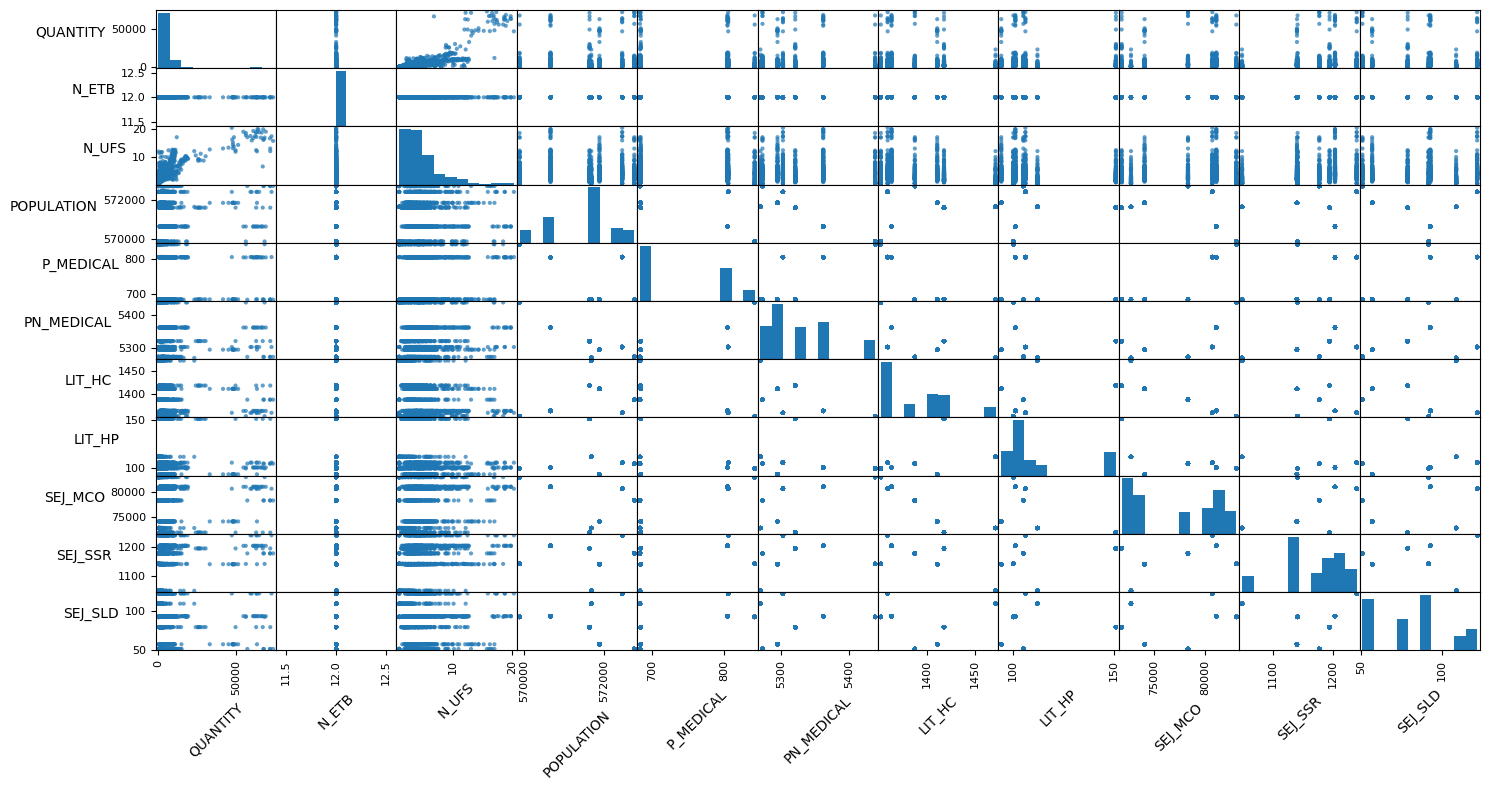

In [ ]:
# Look at the interactions between the variables.
axes=pd.plotting.scatter_matrix(df_HOSPI_1,figsize=(15, 8),alpha=0.7 )
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
# it is same for one hospital so no need to keep it

df_HOSPI_1.drop(['N_ETB'],axis=1,inplace=True)

<Axes: >

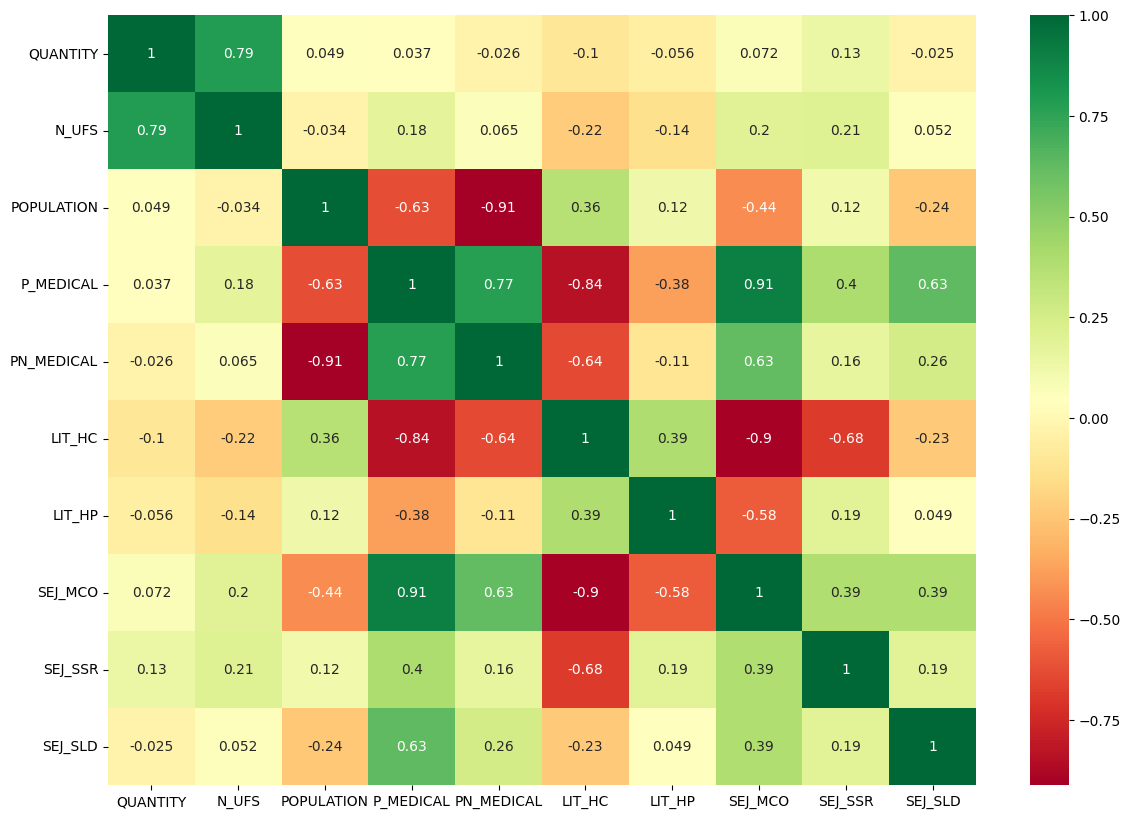

In [ ]:
plt.figure(figsize=(14,10))
# seaborn has an easy method to showcase heatmap
sns.heatmap(df_HOSPI_1.corr(method='pearson'), annot=True,cmap ='RdYlGn')

In [ ]:
# Check if there are more 0 values
zero_counts = (df_HOSPI_1 == 0).sum()
zero_counts

HOSPI_CODE_UCD    0
DATE              0
QUANTITY          0
N_UFS             0
POPULATION        0
P_MEDICAL         0
PN_MEDICAL        0
LIT_HC            0
LIT_HP            0
SEJ_MCO           0
SEJ_SSR           0
SEJ_SLD           0
dtype: int64

In [ ]:
# We only drop population due to high correlation
df_HOSPI_1.drop(['POPULATION'],axis=1,inplace=True)

<Axes: >

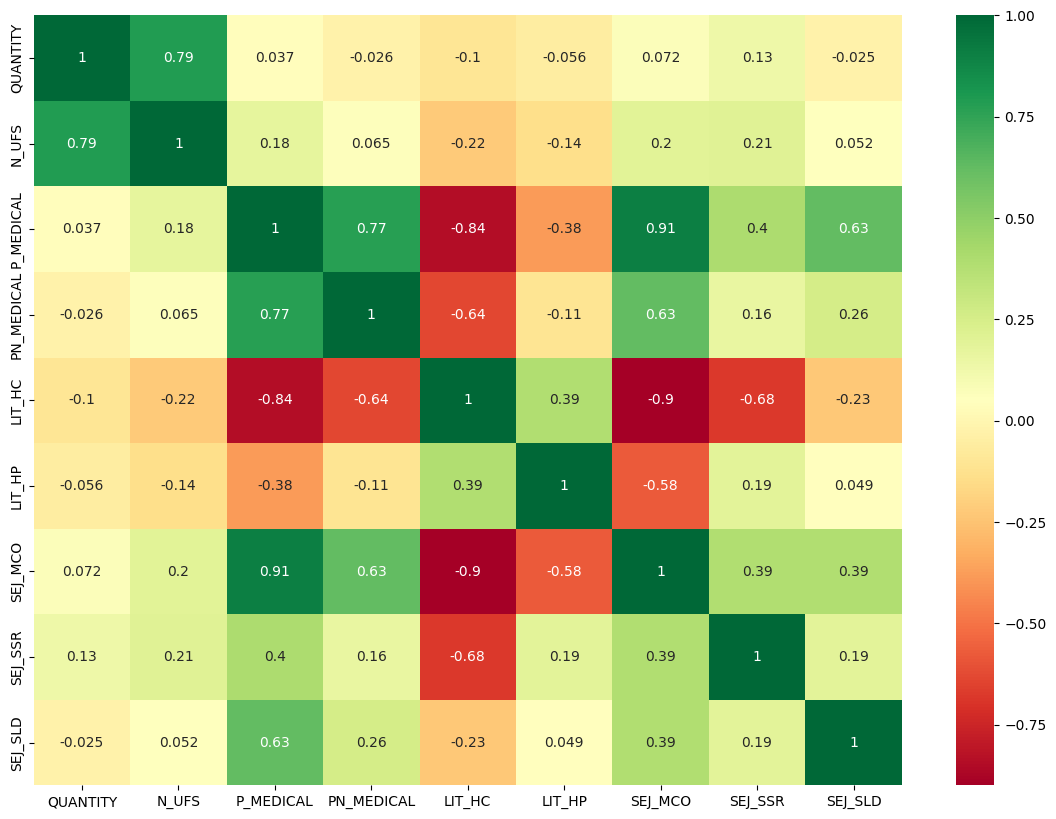

In [ ]:
plt.figure(figsize=(14,10))
# seaborn has an easy method to showcase heatmap
sns.heatmap(df_HOSPI_1.corr(method='pearson'), annot=True,cmap ='RdYlGn')

In [ ]:
df_HOSPI_1

,HOSPI_CODE_UCD,DATE,QUANTITY,N_UFS,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_SSR,SEJ_SLD
0,3400893736135,2013-07-01,40,1.000000,683.0,5270.0,1471.0,112.0,72785.0,1049.0,109.0
1,3400893736135,2013-08-01,40,1.000000,683.0,5270.0,1471.0,112.0,72785.0,1049.0,109.0
2,3400893736135,2013-09-01,140,1.166667,683.0,5270.0,1471.0,112.0,72785.0,1049.0,109.0
3,3400893736135,2013-10-01,300,2.142857,683.0,5270.0,1471.0,112.0,72785.0,1049.0,109.0
4,3400893736135,2013-11-01,370,2.375000,683.0,5270.0,1471.0,112.0,72785.0,1049.0,109.0
...,...,...,...,...,...,...,...,...,...,...,...
1203,3400892745848,2018-11-01,6210,6.750000,805.0,5362.0,1364.0,101.0,81054.0,1203.0,93.0
1204,3400892745848,2018-12-01,7650,8.590909,805.0,5362.0,1364.0,101.0,81054.0,1203.0,93.0
1205,3400892745848,2019-01-01,8092,8.107143,843.0,5438.0,1353.0,100.0,82997.0,1141.0,92.0
1206,3400892745848,2019-02-01,7688,8.000000,843.0,5438.0,1353.0,100.0,82997.0,1141.0,92.0


In [ ]:
# Check Correlation between numerical and categorical variables
numerical_variables= ['N_UFS',	'P_MEDICAL',	'PN_MEDICAL',	'LIT_HC',	'LIT_HP',	'SEJ_MCO',	'SEJ_SSR','SEJ_SLD']
categorical_variable='HOSPI_CODE_UCD'


for numerical_variable in numerical_variables:
    df_encoded = pd.get_dummies(df_HOSPI_1, columns=[categorical_variable], prefix=[categorical_variable], drop_first=True)
    dummy_variable_columns = [df_col for df_col in df_encoded.columns if categorical_variable in df_col]

    dummy_variable_columns_with_quantity = dummy_variable_columns.copy()
    dummy_variable_columns_with_quantity.append(numerical_variable)

    new_df = df_encoded[dummy_variable_columns_with_quantity]

    print("NUmerical variable:", numerical_variable)
    print("Columns to be used for training:", dummy_variable_columns)
    print("Shape of X (features):", new_df[dummy_variable_columns].shape)
    print("Shape of y (target):", new_df[numerical_variable].shape)

    # Check if new_df has data before fitting the model
    if not new_df.empty and dummy_variable_columns:
        model = LinearRegression()
        model.fit(new_df[dummy_variable_columns], new_df[numerical_variable])
        predictions = model.predict(new_df[dummy_variable_columns])
        r2 = r2_score(new_df[numerical_variable], predictions)
        print("R-squared score for", categorical_variable, ":", r2)
    else:
        print("No data for this code.")

    print("-" * 50)

NUmerical variable: N_UFS
Columns to be used for training: ['HOSPI_CODE_UCD_3400891191226', 'HOSPI_CODE_UCD_3400891225037', 'HOSPI_CODE_UCD_3400891235203', 'HOSPI_CODE_UCD_3400891996128', 'HOSPI_CODE_UCD_3400892052120', 'HOSPI_CODE_UCD_3400892065366', 'HOSPI_CODE_UCD_3400892075761', 'HOSPI_CODE_UCD_3400892088310', 'HOSPI_CODE_UCD_3400892203645', 'HOSPI_CODE_UCD_3400892508566', 'HOSPI_CODE_UCD_3400892669236', 'HOSPI_CODE_UCD_3400892697789', 'HOSPI_CODE_UCD_3400892729589', 'HOSPI_CODE_UCD_3400892745848', 'HOSPI_CODE_UCD_3400892761527', 'HOSPI_CODE_UCD_3400892761695', 'HOSPI_CODE_UCD_3400893022634', 'HOSPI_CODE_UCD_3400893736135', 'HOSPI_CODE_UCD_3400893826706', 'HOSPI_CODE_UCD_3400893875490']
Shape of X (features): (1208, 20)
Shape of y (target): (1208,)
R-squared score for HOSPI_CODE_UCD : 0.6303299733545645
--------------------------------------------------
NUmerical variable: P_MEDICAL
Columns to be used for training: ['HOSPI_CODE_UCD_3400891191226', 'HOSPI_CODE_UCD_3400891225037', 'H

In [ ]:
df_HOSPI_1['N_UFS'] = df_HOSPI_1['N_UFS'].astype(int)
df_HOSPI_1['P_MEDICAL'] = df_HOSPI_1['P_MEDICAL'].astype(int)
df_HOSPI_1['PN_MEDICAL'] = df_HOSPI_1['PN_MEDICAL'].astype(int)
df_HOSPI_1['LIT_HC'] = df_HOSPI_1['LIT_HC'].astype(int)
df_HOSPI_1['LIT_HP'] = df_HOSPI_1['LIT_HP'].astype(int)
df_HOSPI_1['SEJ_MCO'] = df_HOSPI_1['SEJ_MCO'].astype(int)
df_HOSPI_1['SEJ_SLD'] = df_HOSPI_1['SEJ_SLD'].astype(int)
df_HOSPI_1['SEJ_SSR'] = df_HOSPI_1['SEJ_SSR'].astype(int)

### **Outliers of Hospital 1**

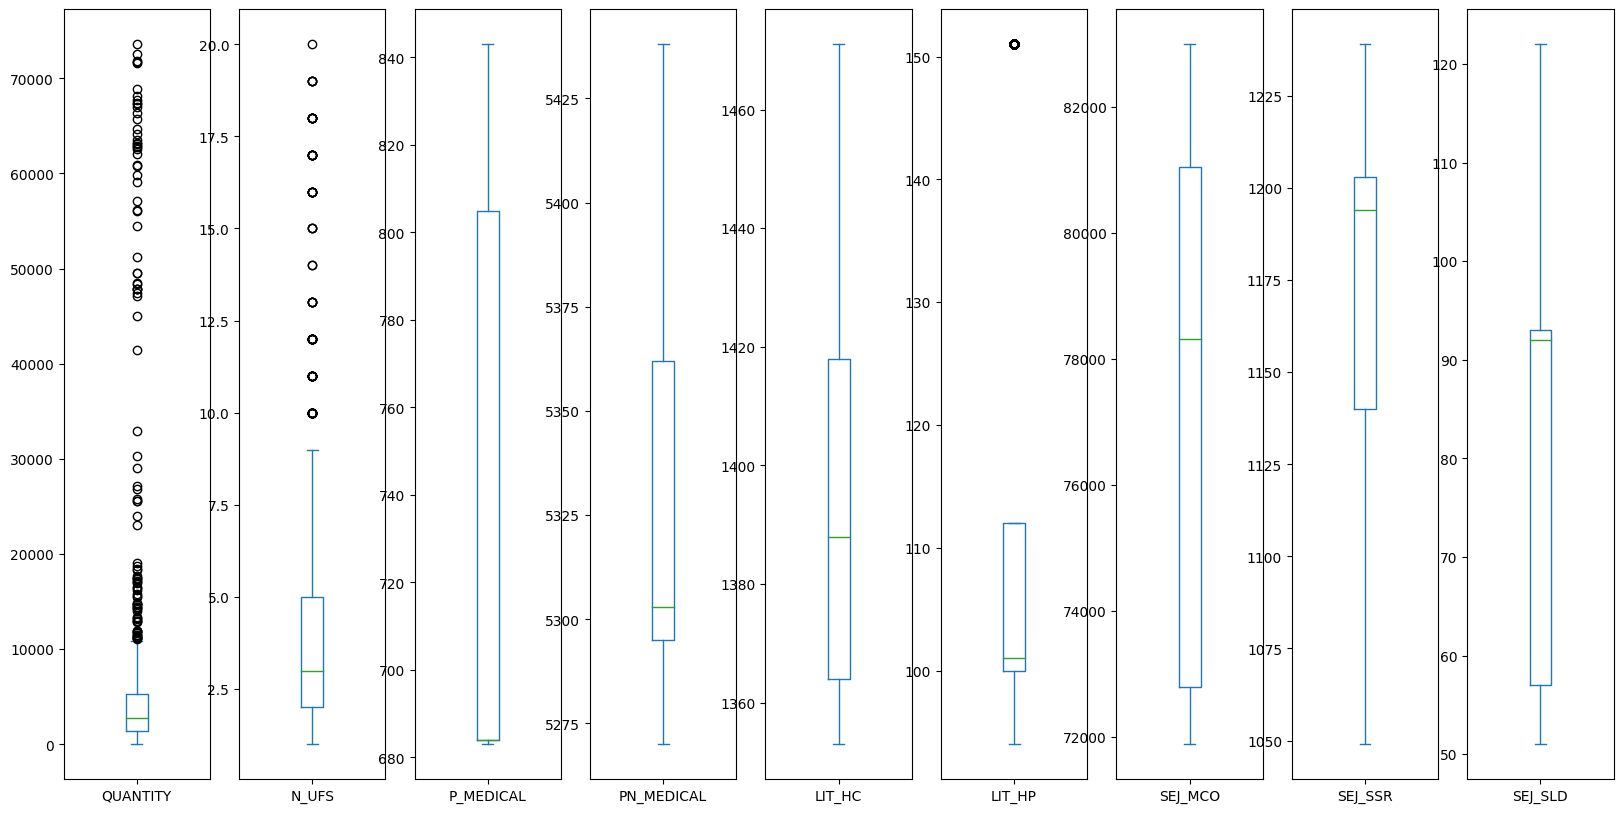

In [ ]:
# Outliers checking using boxplot
df_HOSPI_1.plot(kind='box', subplots=True, figsize=(20, 10))
plt.show()

In [ ]:
# Remove outliers in each numerical variable for every HOSPI_CODE_UCD
unique_UCD_list = df_HOSPI_1['HOSPI_CODE_UCD'].unique()
result_list=[]

for unique_UCD in unique_UCD_list:

  df_temp = df_HOSPI_1[df_HOSPI_1['HOSPI_CODE_UCD'] == unique_UCD].copy()

  #Outlierdetection here
  numerical_cols=['QUANTITY','N_UFS','LIT_HP']

  for col in numerical_cols:
    Q1 = df_temp[col].quantile(0.25)
    Q3 = df_temp[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data frame to remove outliers
    df_temp = df_temp[(df_temp[col] >= lower_bound) & (df_temp[col] <= upper_bound)]

  result_list.append(df_temp)

df_HOSPI_1=pd.concat(result_list, axis=0)

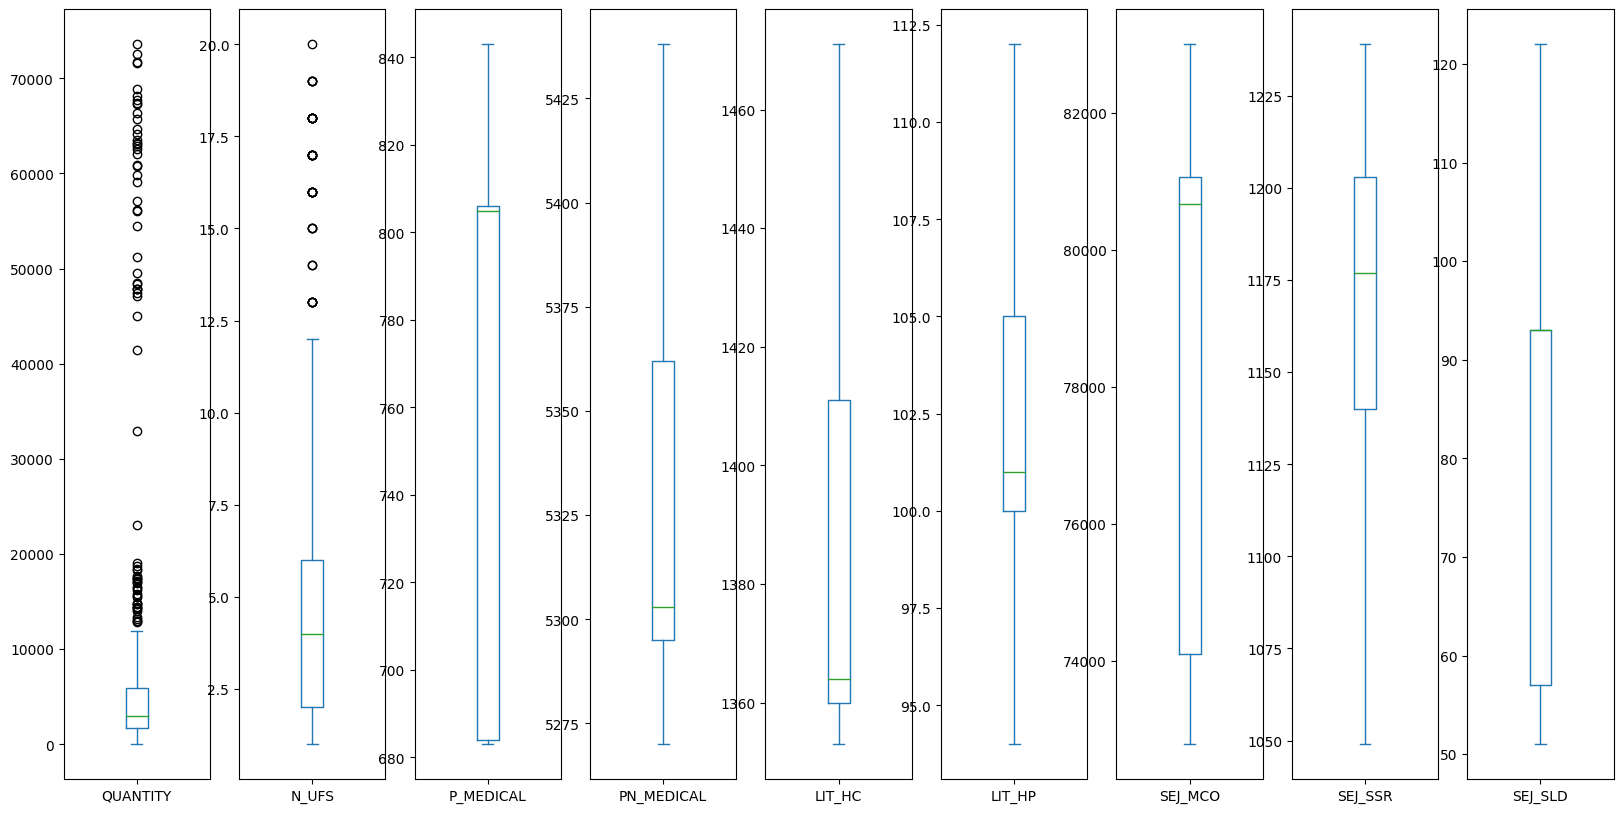

In [ ]:
# Outliers checking using boxplot
df_HOSPI_1.plot(kind='box', subplots=True, figsize=(20, 10))
plt.show()

In [ ]:
df_HOSPI_1['YEAR'] = df_HOSPI_1['DATE'].dt.year
df_HOSPI_1['MONTH'] = df_HOSPI_1['DATE'].dt.month


In [ ]:
df_HOSPI_1.drop(['DATE'],axis=1,inplace=True)


In [ ]:
# Select columns to normalize
columns_to_normalize = [col for col in df_HOSPI_1.columns if col not in ['HOSPI_CODE_UCD', 'YEAR', 'MONTH']]

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_HOSPI_1[columns_to_normalize] = scaler.fit_transform(df_HOSPI_1[columns_to_normalize])


In [ ]:
for j in df_HOSPI_1.HOSPI_CODE_UCD.unique():
    df_temp= df_HOSPI_1[df_HOSPI_1.HOSPI_CODE_UCD==j]
    print(df_temp.YEAR.nunique()) #and month, we have 21.

6
6
5
6
6
6
6
6
6
6
5
6
5
5
6
6
6
6
6
5
4


In [ ]:
model_1=df_HOSPI_1.groupby(['HOSPI_CODE_UCD','YEAR','MONTH']).agg({'QUANTITY':'sum','N_UFS':'mean','P_MEDICAL':'mean','PN_MEDICAL':'mean','LIT_HP':'mean','LIT_HC':'mean','SEJ_MCO':'mean', 'SEJ_SLD':'mean','SEJ_SSR':'mean'})

In [ ]:
model_1.reset_index(inplace=True)

In [ ]:
model_1

,HOSPI_CODE_UCD,YEAR,MONTH,QUANTITY,N_UFS,P_MEDICAL,PN_MEDICAL,LIT_HP,LIT_HC,SEJ_MCO,SEJ_SLD,SEJ_SSR
0,3400890837149,2013,7,0.001481,0.000000,0.0000,0.000000,1.000000,1.00000,0.000000,0.816901,0.000000
1,3400890837149,2013,8,0.002161,0.000000,0.0000,0.000000,1.000000,1.00000,0.000000,0.816901,0.000000
2,3400890837149,2013,9,0.004743,0.052632,0.0000,0.000000,1.000000,1.00000,0.000000,0.816901,0.000000
3,3400890837149,2013,10,0.014392,0.052632,0.0000,0.000000,1.000000,1.00000,0.000000,0.816901,0.000000
4,3400890837149,2013,11,0.019013,0.105263,0.0000,0.000000,1.000000,1.00000,0.000000,0.816901,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
920,3400893875490,2018,12,0.130073,0.473684,0.7625,0.547619,0.388889,0.09322,0.809734,0.591549,0.810526
921,3400893875490,2019,1,0.134204,0.473684,1.0000,1.000000,0.333333,0.00000,1.000000,0.577465,0.484211
922,3400893875490,2019,2,0.114131,0.526316,1.0000,1.000000,0.333333,0.00000,1.000000,0.577465,0.484211
923,3400893875490,2019,3,0.010369,0.526316,1.0000,1.000000,0.333333,0.00000,1.000000,0.577465,0.484211


In [ ]:
df_UCD_regression_Hospi_1 = model_1
model_1 = pd.get_dummies(model_1, columns=["HOSPI_CODE_UCD","MONTH"], prefix=["HOSPI_CODE_UCD", "MONTH"])
model_1

,YEAR,QUANTITY,N_UFS,P_MEDICAL,PN_MEDICAL,LIT_HP,LIT_HC,SEJ_MCO,SEJ_SLD,SEJ_SSR,HOSPI_CODE_UCD_3400890837149,HOSPI_CODE_UCD_3400891191226,HOSPI_CODE_UCD_3400891225037,HOSPI_CODE_UCD_3400891235203,HOSPI_CODE_UCD_3400891996128,HOSPI_CODE_UCD_3400892052120,HOSPI_CODE_UCD_3400892065366,HOSPI_CODE_UCD_3400892075761,HOSPI_CODE_UCD_3400892088310,HOSPI_CODE_UCD_3400892203645,HOSPI_CODE_UCD_3400892508566,HOSPI_CODE_UCD_3400892669236,HOSPI_CODE_UCD_3400892697789,HOSPI_CODE_UCD_3400892729589,HOSPI_CODE_UCD_3400892745848,HOSPI_CODE_UCD_3400892761527,HOSPI_CODE_UCD_3400892761695,HOSPI_CODE_UCD_3400893022634,HOSPI_CODE_UCD_3400893736135,HOSPI_CODE_UCD_3400893826706,HOSPI_CODE_UCD_3400893875490,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,2013,0.001481,0.000000,0.0000,0.000000,1.000000,1.00000,0.000000,0.816901,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2013,0.002161,0.000000,0.0000,0.000000,1.000000,1.00000,0.000000,0.816901,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2013,0.004743,0.052632,0.0000,0.000000,1.000000,1.00000,0.000000,0.816901,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2013,0.014392,0.052632,0.0000,0.000000,1.000000,1.00000,0.000000,0.816901,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2013,0.019013,0.105263,0.0000,0.000000,1.000000,1.00000,0.000000,0.816901,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,2018,0.130073,0.473684,0.7625,0.547619,0.388889,0.09322,0.809734,0.591549,0.810526,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
921,2019,0.134204,0.473684,1.0000,1.000000,0.333333,0.00000,1.000000,0.577465,0.484211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
922,2019,0.114131,0.526316,1.0000,1.000000,0.333333,0.00000,1.000000,0.577465,0.484211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
923,2019,0.010369,0.526316,1.0000,1.000000,0.333333,0.00000,1.000000,0.577465,0.484211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


### **Data Splitting Hospital 1**

In [ ]:
X_val=model_1.drop(['QUANTITY'], axis=1)
y_val=model_1['QUANTITY']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_val,y_val, test_size=0.2,shuffle=True, random_state=42)

### **Overall Linear Regression Hospital 1**

In [ ]:
#model definition
l_reg_1=LinearRegression()

In [ ]:
# train the model
l_reg_1.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(f"The accuracy after learning %2.3f Percent"%(l_reg_1.score(X_train,y_train)*100))

The accuracy after learning 86.981 Percent


In [ ]:
## Let's make the test with the 20% remaining data
## To do it, we use the function `predict`
l_pred_1= l_reg_1.predict(X_test)

In [ ]:
print(f"Accuracy_Score = %2.2f" % metrics.r2_score(y_test,l_pred_1))

Accuracy_Score = 0.89


### **Overall XGB Regression**

In [ ]:
# Try different Regression
xgb_model = XGBRegressor(random_state=0,seed = 7)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
print(f"The accuracy after learning %2.3f Percent"%(xgb_model.score(X_train,y_train)*100))
print(f"Accuracy_Score = %2.2f" % metrics.r2_score(y_test,xgb_predictions))

The accuracy after learning 99.950 Percent
Accuracy_Score = 0.96


### **Overall Random Forest Regression**

In [ ]:
rf_model=RandomForestRegressor(n_estimators=30,random_state=42)
rf_model.fit(X_train,y_train)
rf_predictions = rf_model.predict(X_test)
print(f"The accuracy after learning %2.3f Percent"%(rf_model.score(X_train,y_train)*100))
print(f"Accuracy_Score = %2.2f" % metrics.r2_score(y_test,rf_predictions))

The accuracy after learning 98.641 Percent
Accuracy_Score = 0.97


### **Linear Regression Hospital 1**

In [ ]:
df_UCD_regression_Hospi_1 = pd.get_dummies(df_UCD_regression_Hospi_1, columns=["MONTH"], prefix=["MONTH"])

In [ ]:
# Coefficients of the linear regression
prediction_list =[]
y_list=[]
# Initialize variables for the weighted average
total_weighted_r2 = 0
total_samples = 0


unique_UCD_Code_list = df_UCD_regression_Hospi_1['HOSPI_CODE_UCD'].unique()
result=pd.DataFrame(index=range(len(unique_UCD_Code_list)),columns=['HOSPI_CODE_UCD','MSE','RMSE','R2','MAPE','Accurancy'])
result['HOSPI_CODE_UCD'] = unique_UCD_Code_list

j = 0
for unique_UCD_Code in unique_UCD_Code_list:

  df_temp = df_UCD_regression_Hospi_1[df_UCD_regression_Hospi_1['HOSPI_CODE_UCD'] == unique_UCD_Code].copy().drop(['HOSPI_CODE_UCD'], axis=1)

  X_val=df_temp.drop(['QUANTITY'], axis=1)
  y_val=df_temp['QUANTITY']

  # Separate data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42, shuffle=True)

  model=LinearRegression()
  model.fit(X_train,y_train)

  # Make predictions
  predictions = model.predict(X_test)
  prediction_list.append(pd.DataFrame(predictions))
  y_list.append(y_test.copy())

  # Evaluate model performance using KPIs
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

  # Result table
  result['Accurancy'][j]= model.score(X_test,y_test)*100
  result['MSE'][j]= round(mse, 5)
  result['RMSE'][j]= round(np.sqrt(mse), 5)
  result['R2'][j]= round(r2, 5)
  result['MAPE'][j]= round(mape, 5)

  # Weighting of the R-squared value based on the number of data points in this group
  num_samples = len(y_val)
  total_weighted_r2 += r2 * num_samples
  total_samples += num_samples

  j=j+1
result['HOSPI_CODE_UCD'] = result['HOSPI_CODE_UCD'].astype(str)
result

,HOSPI_CODE_UCD,MSE,RMSE,R2,MAPE,Accurancy
0,3400890837149,5954949066.5229,77168.31647,-1904291645198.102295,116978893.59151,-190429164519810.21875
1,3400891191226,0.00029,0.01709,-0.30236,22.0633,-30.235788
2,3400891225037,0.0007,0.02644,0.90217,1564.30313,90.217352
3,3400891235203,0.00008,0.00899,0.64623,20.66244,64.622922
4,3400891996128,0.03091,0.17582,0.76606,562.30416,76.606481
5,3400892052120,0.00013,0.01126,-3.15732,22.42404,-315.732311
6,3400892065366,0.0003,0.01739,0.15569,19.26296,15.568733
7,3400892075761,0.00021,0.0146,0.34747,286.54499,34.747048
8,3400892088310,1558201038512992.0,39474055.25802,-6891150959714825216.0,51346204195752.898438,-689115095971482566656.0
9,3400892203645,0.00003,0.00579,-0.46823,36.36323,-46.822757


In [ ]:
result.MAPE.astype(float).mean()

inf

In [ ]:
result.R2.astype(float).mean()

-3.281970944852731e+17

In [ ]:
# Calculate the weighted average of the R-squared values
total_regression_r2 = total_weighted_r2 / total_samples

print("Weighted R-squared for the entire regression:", total_regression_r2)

Weighted R-squared for the entire regression: -2.905843136984612e+17


### **XGB Regression Hospital 1**

In [ ]:
# Coefficients of the XGB regression
prediction_list =[]
y_list=[]
# Initialize variables for the weighted average
total_weighted_r2 = 0
total_samples = 0


unique_UCD_Code_list = df_UCD_regression_Hospi_1['HOSPI_CODE_UCD'].unique()
result=pd.DataFrame(index=range(len(unique_UCD_Code_list)),columns=['HOSPI_CODE_UCD','MSE','RMSE','R2','MAPE','Accurancy',])
result['HOSPI_CODE_UCD'] = unique_UCD_Code_list

j = 0
for unique_UCD_Code in unique_UCD_Code_list:

  df_temp = df_UCD_regression_Hospi_1[df_UCD_regression_Hospi_1['HOSPI_CODE_UCD'] == unique_UCD_Code].copy().drop(['HOSPI_CODE_UCD'], axis=1)

  X_val=df_temp.drop(['QUANTITY'], axis=1)
  y_val=df_temp['QUANTITY']

  # Separate data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42, shuffle=True)

  model = XGBRegressor(random_state=0,seed = 7)
  model.fit(X_train, y_train)

  # Make predictions
  predictions = model.predict(X_test)
  prediction_list.append(pd.DataFrame(predictions))
  y_list.append(y_test.copy())

  # Evaluate model performance using KPIs
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

  # Result table
  result['Accurancy'][j]= model.score(X_test,y_test)*100
  result['MSE'][j]= round(mse, 5)
  result['RMSE'][j]= round(np.sqrt(mse), 5)
  result['R2'][j]= round(r2, 5)
  result['MAPE'][j]= round(mape, 5)

  # Weighting of the R-squared value based on the number of data points in this group
  num_samples = len(y_val)
  total_weighted_r2 += r2 * num_samples
  total_samples += num_samples

  j=j+1
result['HOSPI_CODE_UCD'] = result['HOSPI_CODE_UCD'].astype(str)
result

,HOSPI_CODE_UCD,MSE,RMSE,R2,MAPE,Accurancy
0,3400890837149,0.00181,0.04249,0.42274,545.14011,42.274017
1,3400891191226,0.00012,0.01103,0.45747,15.31824,45.746931
2,3400891225037,0.00105,0.03244,0.85273,458.85163,85.272728
3,3400891235203,0.00006,0.00755,0.75027,21.67305,75.026934
4,3400891996128,0.00607,0.07791,0.95406,74.21751,95.406172
5,3400892052120,0.0002,0.01398,-5.40808,24.18589,-540.807527
6,3400892065366,0.00045,0.02129,-0.26548,18.8058,-26.547903
7,3400892075761,0.00014,0.01175,0.57743,82.98021,57.743269
8,3400892088310,0.00023,0.01518,-0.01928,1068.34602,-1.927896
9,3400892203645,0.00004,0.00598,-0.56592,29.61997,-56.592302


In [ ]:
result.MAPE.astype(float).mean()

inf

In [ ]:
result.R2.astype(float).mean()

-0.1832042857142857

In [ ]:
# Calculate the weighted average of the R-squared values
total_regression_r2 = total_weighted_r2 / total_samples

print("Weighted R-squared for the entire regression:", total_regression_r2)

Weighted R-squared for the entire regression: -0.04533249264920247


### **Random Forest Regression Hospital 1**

In [ ]:
# Coefficients of the linear regression
prediction_list =[]
y_list=[]
# Initialize variables for the weighted average
total_weighted_r2 = 0
total_samples = 0


unique_UCD_Code_list = df_UCD_regression_Hospi_1['HOSPI_CODE_UCD'].unique()
result=pd.DataFrame(index=range(len(unique_UCD_Code_list)),columns=['HOSPI_CODE_UCD','MSE','RMSE','R2','MAPE','Accurancy',])
result['HOSPI_CODE_UCD'] = unique_UCD_Code_list

j = 0
for unique_UCD_Code in unique_UCD_Code_list:

  df_temp = df_UCD_regression_Hospi_1[df_UCD_regression_Hospi_1['HOSPI_CODE_UCD'] == unique_UCD_Code].copy().drop(['HOSPI_CODE_UCD'], axis=1)

  X_val=df_temp.drop(['QUANTITY'], axis=1)
  y_val=df_temp['QUANTITY']

  # Separate data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42, shuffle=True)

  model=RandomForestRegressor(n_estimators=30,random_state=42)
  model.fit(X_train,y_train)

  # Make predictions
  predictions = model.predict(X_test)
  prediction_list.append(pd.DataFrame(predictions))
  y_list.append(y_test.copy())

  # Evaluate model performance using KPIs
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

  # Result table
  result['Accurancy'][j]= model.score(X_test,y_test)*100
  result['MSE'][j]= round(mse, 5)
  result['RMSE'][j]= round(np.sqrt(mse), 5)
  result['R2'][j]= round(r2, 5)
  result['MAPE'][j]= round(mape, 5)

  # Weighting of the R-squared value based on the number of data points in this group
  num_samples = len(y_val)
  total_weighted_r2 += r2 * num_samples
  total_samples += num_samples

  j=j+1
result['HOSPI_CODE_UCD'] = result['HOSPI_CODE_UCD'].astype(str)
result

,HOSPI_CODE_UCD,MSE,RMSE,R2,MAPE,Accurancy
0,3400890837149,0.00091,0.03009,0.71041,484.44741,71.0406
1,3400891191226,0.0001,0.01004,0.55069,15.79469,55.069334
2,3400891225037,0.0004,0.02007,0.94362,941.93277,94.361522
3,3400891235203,0.00005,0.00692,0.79017,15.19728,79.016635
4,3400891996128,0.00301,0.05483,0.97725,1073.56731,97.725219
5,3400892052120,0.00005,0.00711,-0.65923,13.84086,-65.923443
6,3400892065366,0.00017,0.01311,0.52052,11.078,52.052085
7,3400892075761,0.00014,0.01195,0.56323,790.79407,56.323108
8,3400892088310,0.00022,0.01497,0.00929,9223.21526,0.928658
9,3400892203645,0.00004,0.00601,-0.58446,31.8262,-58.446048


In [ ]:
result.MAPE.astype(float).mean()

inf

In [ ]:
result.R2.astype(float).mean()

0.24944714285714284

In [ ]:
# Calculate the weighted average of the R-squared values
total_regression_r2 = total_weighted_r2 / total_samples

print("Weighted R-squared for the entire regression:", total_regression_r2)

Weighted R-squared for the entire regression: 0.3338707500665282


## **Analyzing Hospital 2**

In [ ]:
df_HOSPI_2

,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,N_UFS,QUANTITY,MONTH,YEAR,N_ETB,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD,DATE
22726,HOSPI_2,N02BE01,3400891996128,5,464,3,2017,5,539067,714,5001,1157,187,75420,0,1236,261,0,2017-03-01
22727,HOSPI_2,N02BE01,3400891996128,26,1910,4,2017,5,539067,714,5001,1157,187,75420,0,1236,261,0,2017-04-01
22728,HOSPI_2,N02BE01,3400891996128,19,2540,4,2017,5,539067,714,5001,1157,187,75420,0,1236,261,0,2017-04-01
22729,HOSPI_2,N02BE01,3400891996128,25,1810,4,2017,5,539067,714,5001,1157,187,75420,0,1236,261,0,2017-04-01
22730,HOSPI_2,N02BE01,3400891996128,34,2180,4,2017,5,539067,714,5001,1157,187,75420,0,1236,261,0,2017-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38167,HOSPI_2,J01CR05,3400893022634,1,40,12,2019,5,542302,706,5013,1141,141,76593,0,1007,206,0,2019-12-01
38168,HOSPI_2,J01CR05,3400893022634,28,544,12,2019,5,542302,706,5013,1141,141,76593,0,1007,206,0,2019-12-01
38169,HOSPI_2,J01CR05,3400893022634,4,29,12,2019,5,542302,706,5013,1141,141,76593,0,1007,206,0,2019-12-01
38170,HOSPI_2,J01CR05,3400893022634,3,31,12,2019,5,542302,706,5013,1141,141,76593,0,1007,206,0,2019-12-01


In [ ]:
df_HOSPI_2= df_HOSPI_2.groupby(['CODE_ATC','HOSPI_CODE_UCD','DATE']).agg({'QUANTITY':'sum','N_ETB':'mean','N_UFS':'mean','POPULATION':'mean','P_MEDICAL':'mean','PN_MEDICAL':'mean','LIT_HC':'mean','LIT_HP':'mean','SEJ_MCO':'mean','SEJ_HAD':'mean', 'SEJ_PSY':'mean','SEJ_SSR':'mean','SEJ_SLD':'mean'})

In [ ]:
df_HOSPI_2.reset_index(inplace=True)

In [ ]:
df_HOSPI_2

,CODE_ATC,HOSPI_CODE_UCD,DATE,QUANTITY,N_ETB,N_UFS,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
0,A03AX12,3400893736135,2017-06-01,3066,5.0,8.555556,539067.0,714.0,5001.0,1157.0,187.0,75420.0,0.0,1236.0,261.0,0.0
1,A03AX12,3400893736135,2017-07-01,5184,5.0,6.360000,539067.0,714.0,5001.0,1157.0,187.0,75420.0,0.0,1236.0,261.0,0.0
2,A03AX12,3400893736135,2017-08-01,5140,5.0,6.777778,539067.0,714.0,5001.0,1157.0,187.0,75420.0,0.0,1236.0,261.0,0.0
3,A03AX12,3400893736135,2017-09-01,5481,5.0,7.136364,539067.0,714.0,5001.0,1157.0,187.0,75420.0,0.0,1236.0,261.0,0.0
4,A03AX12,3400893736135,2017-10-01,6103,5.0,7.652174,539067.0,714.0,5001.0,1157.0,187.0,75420.0,0.0,1236.0,261.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,R03AC02,3400892745848,2019-08-01,2410,5.0,5.521739,542302.0,706.0,5013.0,1141.0,141.0,76593.0,0.0,1007.0,206.0,0.0
694,R03AC02,3400892745848,2019-09-01,2230,5.0,6.000000,542302.0,706.0,5013.0,1141.0,141.0,76593.0,0.0,1007.0,206.0,0.0
695,R03AC02,3400892745848,2019-10-01,4670,5.0,7.791667,542302.0,706.0,5013.0,1141.0,141.0,76593.0,0.0,1007.0,206.0,0.0
696,R03AC02,3400892745848,2019-11-01,3330,5.0,7.300000,542302.0,706.0,5013.0,1141.0,141.0,76593.0,0.0,1007.0,206.0,0.0


In [ ]:
# Checking the correlation between the categorical variables and the dependent variable
categorical_variables= ['CODE_ATC','HOSPI_CODE_UCD','DATE']

for categorical_variable in categorical_variables:
    df_encoded = pd.get_dummies(df_HOSPI_2, columns=[categorical_variable], prefix=[categorical_variable], drop_first=True)
    dummy_variable_columns = [df_col for df_col in df_encoded.columns if categorical_variable in df_col]

    dummy_variable_columns_with_quantity = dummy_variable_columns.copy()
    dummy_variable_columns_with_quantity.append("QUANTITY")

    new_df = df_encoded[dummy_variable_columns_with_quantity]

    print("Categorical variable:", categorical_variable)
    print("Columns to be used for training:", dummy_variable_columns)
    print("Shape of X (features):", new_df[dummy_variable_columns].shape)
    print("Shape of y (target):", new_df["QUANTITY"].shape)

    # Check if new_df has data before fitting the model
    if not new_df.empty and dummy_variable_columns:
        model = LinearRegression()
        model.fit(new_df[dummy_variable_columns], new_df["QUANTITY"])
        predictions = model.predict(new_df[dummy_variable_columns])
        r2 = r2_score(new_df["QUANTITY"], predictions)
        print("R-squared score for", categorical_variable, ":", r2)
    else:
        print("No data for this code.")

    print("-" * 50)

Categorical variable: CODE_ATC
Columns to be used for training: ['CODE_ATC_A12BA01', 'CODE_ATC_B01AB05', 'CODE_ATC_B01AC06', 'CODE_ATC_B05XA03', 'CODE_ATC_B05XA09', 'CODE_ATC_C01CA03', 'CODE_ATC_C03CA01', 'CODE_ATC_H02AB06', 'CODE_ATC_J01CR05', 'CODE_ATC_M03BX01', 'CODE_ATC_N02AX02', 'CODE_ATC_N02BE01', 'CODE_ATC_N05BA04', 'CODE_ATC_N05BA12', 'CODE_ATC_N05CF01', 'CODE_ATC_N05CF02', 'CODE_ATC_R03AC02']
Shape of X (features): (698, 17)
Shape of y (target): (698,)
R-squared score for CODE_ATC : 0.46867624177100276
--------------------------------------------------
Categorical variable: HOSPI_CODE_UCD
Columns to be used for training: ['HOSPI_CODE_UCD_3400891191226', 'HOSPI_CODE_UCD_3400891225037', 'HOSPI_CODE_UCD_3400891235203', 'HOSPI_CODE_UCD_3400891996128', 'HOSPI_CODE_UCD_3400892052120', 'HOSPI_CODE_UCD_3400892065366', 'HOSPI_CODE_UCD_3400892075761', 'HOSPI_CODE_UCD_3400892088310', 'HOSPI_CODE_UCD_3400892203645', 'HOSPI_CODE_UCD_3400892508566', 'HOSPI_CODE_UCD_3400892669236', 'HOSPI_CO

In [ ]:
# Chi-squared test to check correlation of the categorical variables
categorical_variables = [ 'CODE_ATC','HOSPI_CODE_UCD','DATE']

# Get all pairwise combinations of categorical variables
combinations = list(itertools.combinations(categorical_variables, 2))

# Perform chi-squared test for each pair of columns
for combo in combinations:
    observed = pd.crosstab(df_HOSPI_2[combo[0]], df_HOSPI_2[combo[1]])
    chi2, p, dof, expected = chi2_contingency(observed)
    print(f"Chi-squared test for columns {combo}:")
    print(f"P-value: {p}")
    #print(observed)
    print("-" * 50)

Chi-squared test for columns ('CODE_ATC', 'HOSPI_CODE_UCD'):
P-value: 0.0
--------------------------------------------------
Chi-squared test for columns ('CODE_ATC', 'DATE'):
P-value: 1.0
--------------------------------------------------
Chi-squared test for columns ('HOSPI_CODE_UCD', 'DATE'):
P-value: 1.0
--------------------------------------------------


In [ ]:
# Only drop Code ATC with the same explanation as for Hospital 3
df_HOSPI_2.drop(['CODE_ATC'],axis=1,inplace=True)

In [ ]:
df_HOSPI_2

,HOSPI_CODE_UCD,DATE,QUANTITY,N_ETB,N_UFS,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
0,3400893736135,2017-06-01,3066,5.0,8.555556,539067.0,714.0,5001.0,1157.0,187.0,75420.0,0.0,1236.0,261.0,0.0
1,3400893736135,2017-07-01,5184,5.0,6.360000,539067.0,714.0,5001.0,1157.0,187.0,75420.0,0.0,1236.0,261.0,0.0
2,3400893736135,2017-08-01,5140,5.0,6.777778,539067.0,714.0,5001.0,1157.0,187.0,75420.0,0.0,1236.0,261.0,0.0
3,3400893736135,2017-09-01,5481,5.0,7.136364,539067.0,714.0,5001.0,1157.0,187.0,75420.0,0.0,1236.0,261.0,0.0
4,3400893736135,2017-10-01,6103,5.0,7.652174,539067.0,714.0,5001.0,1157.0,187.0,75420.0,0.0,1236.0,261.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,3400892745848,2019-08-01,2410,5.0,5.521739,542302.0,706.0,5013.0,1141.0,141.0,76593.0,0.0,1007.0,206.0,0.0
694,3400892745848,2019-09-01,2230,5.0,6.000000,542302.0,706.0,5013.0,1141.0,141.0,76593.0,0.0,1007.0,206.0,0.0
695,3400892745848,2019-10-01,4670,5.0,7.791667,542302.0,706.0,5013.0,1141.0,141.0,76593.0,0.0,1007.0,206.0,0.0
696,3400892745848,2019-11-01,3330,5.0,7.300000,542302.0,706.0,5013.0,1141.0,141.0,76593.0,0.0,1007.0,206.0,0.0


In [ ]:
len(df_HOSPI_2[df_HOSPI_2.SEJ_HAD == 0])

698

In [ ]:
len(df_HOSPI_2[df_HOSPI_2.SEJ_SLD == 0])

698

In [ ]:
# Drop SEJ_SLD and SEJ_HAD as the variables only have the value zero
df_HOSPI_2.drop(['SEJ_SLD', 'SEJ_HAD'],axis=1,inplace=True)

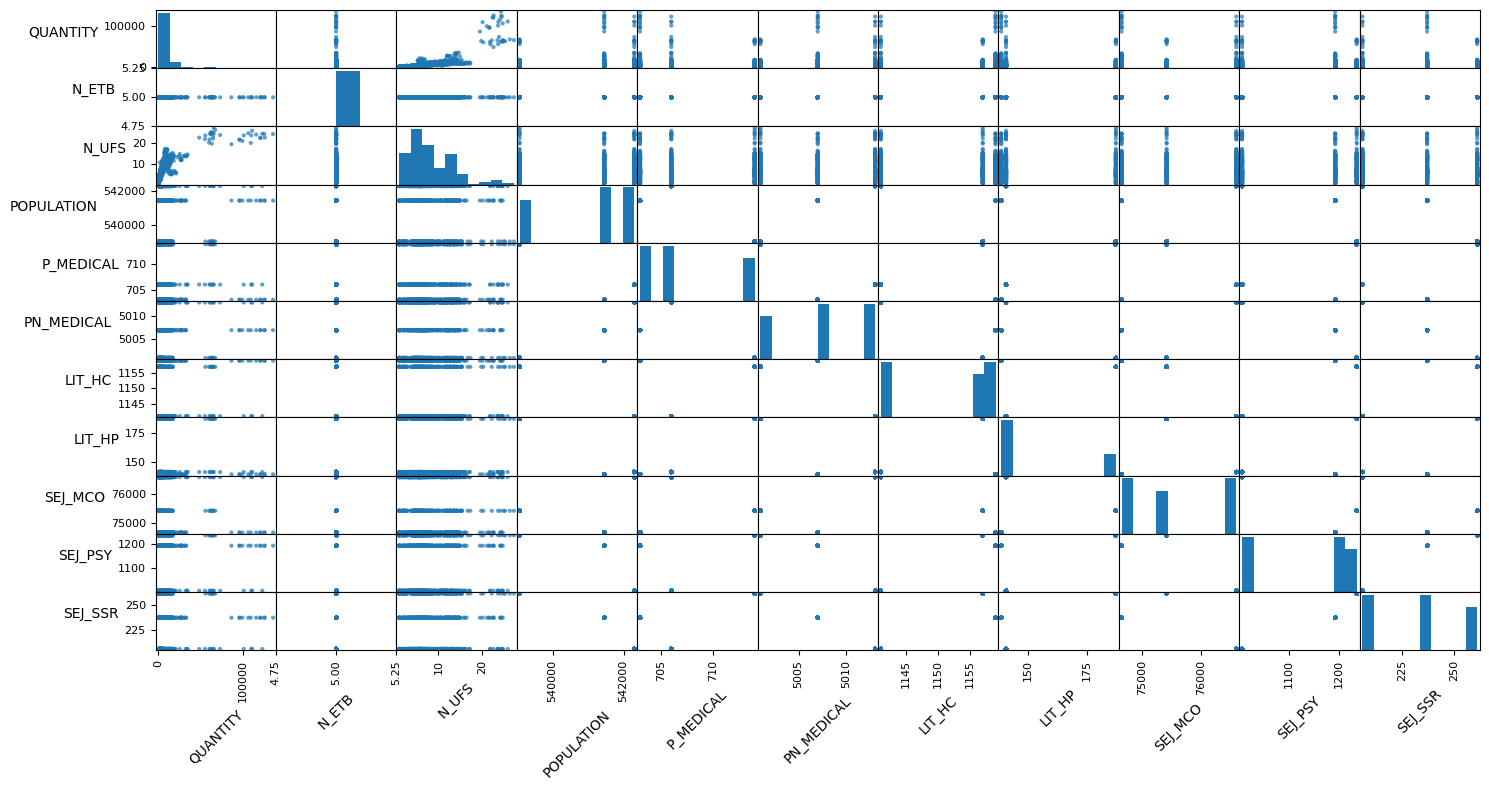

In [ ]:
# Look at the interactions between the variables.
axes=pd.plotting.scatter_matrix(df_HOSPI_2,figsize=(15, 8),alpha=0.7 )
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
# It is same for one hospital so no need to keep it
df_HOSPI_2.drop(['N_ETB'],axis=1,inplace=True)

<Axes: >

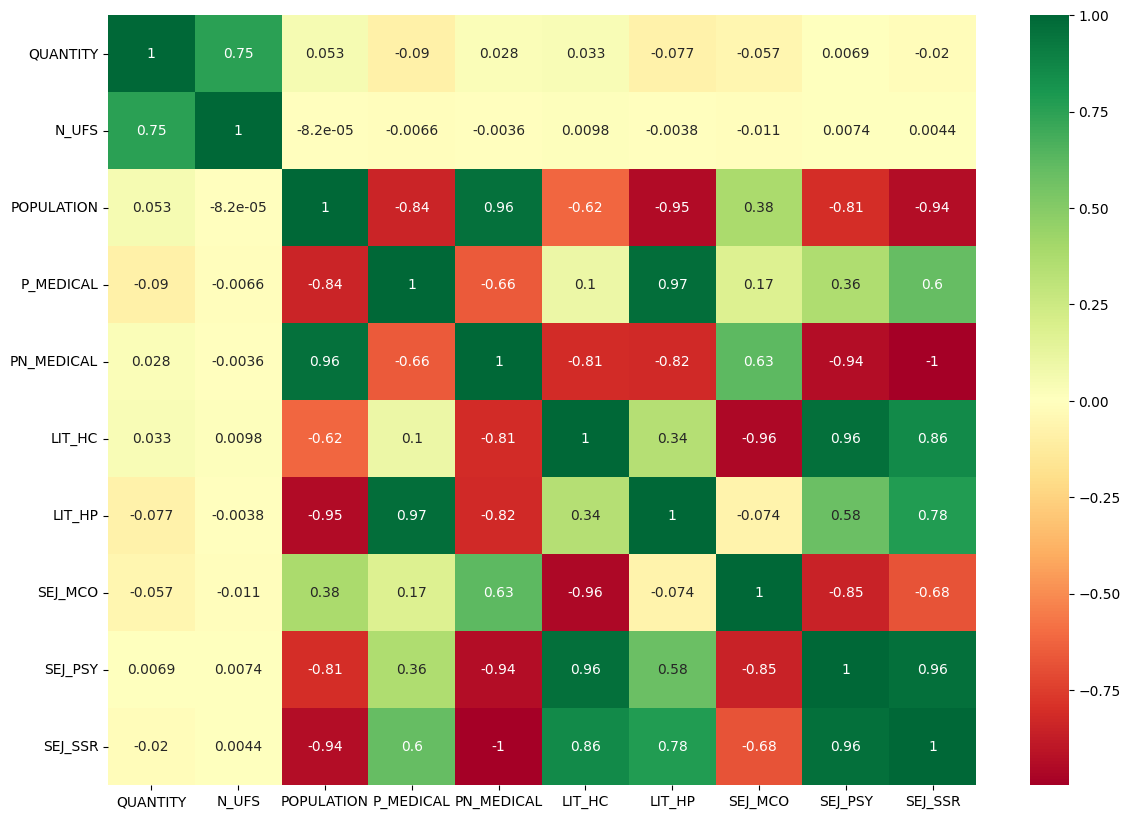

In [ ]:
plt.figure(figsize=(14,10))
# seaborn has an easy method to showcase heatmap
sns.heatmap(df_HOSPI_2.corr(method='pearson'), annot=True,cmap ='RdYlGn')

In [ ]:
# Check if there are more 0 values
zero_counts = (df_HOSPI_2 == 0).sum()
zero_counts

HOSPI_CODE_UCD    0
DATE              0
QUANTITY          0
N_UFS             0
POPULATION        0
P_MEDICAL         0
PN_MEDICAL        0
LIT_HC            0
LIT_HP            0
SEJ_MCO           0
SEJ_PSY           0
SEJ_SSR           0
dtype: int64

In [ ]:
# We drop 'POPULATION', 'LIT_HP', 'LIT_HC', 'SEJ_MCO' due to high correlation
df_HOSPI_2.drop(['POPULATION', 'LIT_HP', 'LIT_HC', 'SEJ_MCO'],axis=1,inplace=True)

<Axes: >

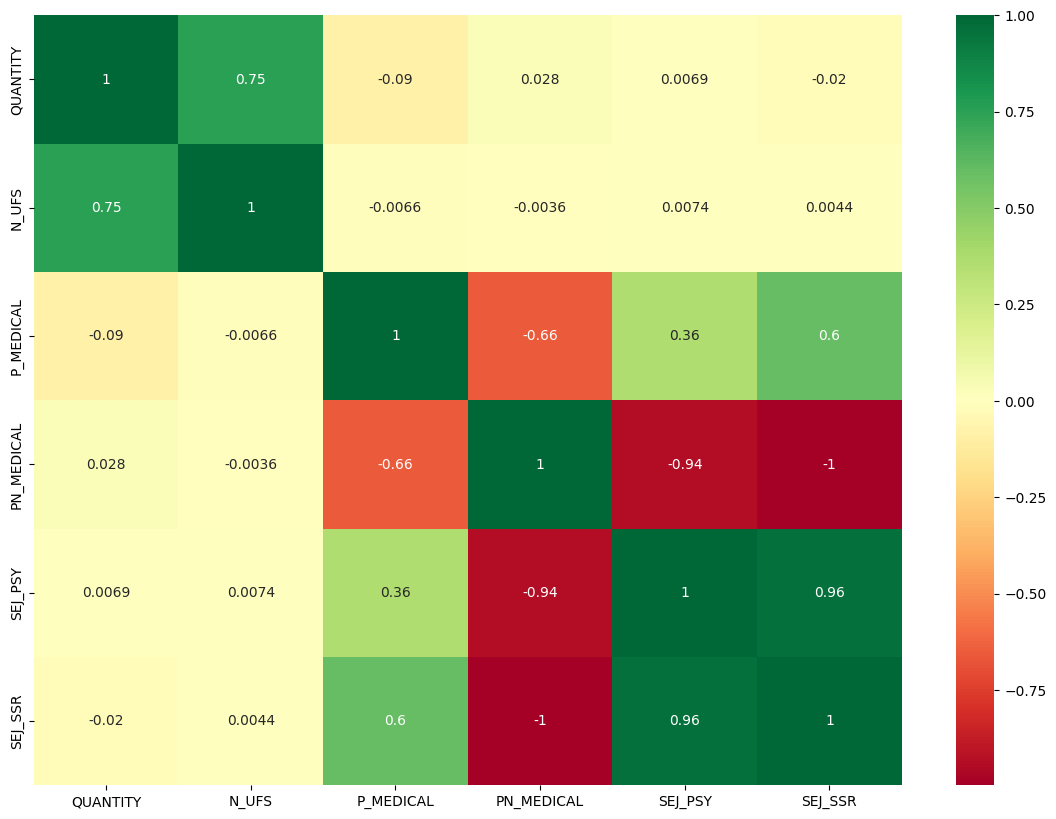

In [ ]:
plt.figure(figsize=(14,10))
# seaborn has an easy method to showcase heatmap
sns.heatmap(df_HOSPI_2.corr(method='pearson'), annot=True,cmap ='RdYlGn')

In [ ]:
# Check Correlation between numerical and categorical variables
numerical_variables= ['N_UFS',	'P_MEDICAL',	'PN_MEDICAL',	'SEJ_PSY',	'SEJ_SSR']
categorical_variable='HOSPI_CODE_UCD'


for numerical_variable in numerical_variables:
    df_encoded = pd.get_dummies(df_HOSPI_2, columns=[categorical_variable], prefix=[categorical_variable], drop_first=True)
    dummy_variable_columns = [df_col for df_col in df_encoded.columns if categorical_variable in df_col]

    dummy_variable_columns_with_quantity = dummy_variable_columns.copy()
    dummy_variable_columns_with_quantity.append(numerical_variable)

    new_df = df_encoded[dummy_variable_columns_with_quantity]

    print("NUmerical variable:", numerical_variable)
    print("Columns to be used for training:", dummy_variable_columns)
    print("Shape of X (features):", new_df[dummy_variable_columns].shape)
    print("Shape of y (target):", new_df[numerical_variable].shape)

    # Check if new_df has data before fitting the model
    if not new_df.empty and dummy_variable_columns:
        model = LinearRegression()
        model.fit(new_df[dummy_variable_columns], new_df[numerical_variable])
        predictions = model.predict(new_df[dummy_variable_columns])
        r2 = r2_score(new_df[numerical_variable], predictions)
        print("R-squared score for", categorical_variable, ":", r2)
    else:
        print("No data for this code.")

    print("-" * 50)

NUmerical variable: N_UFS
Columns to be used for training: ['HOSPI_CODE_UCD_3400891191226', 'HOSPI_CODE_UCD_3400891225037', 'HOSPI_CODE_UCD_3400891235203', 'HOSPI_CODE_UCD_3400891996128', 'HOSPI_CODE_UCD_3400892052120', 'HOSPI_CODE_UCD_3400892065366', 'HOSPI_CODE_UCD_3400892075761', 'HOSPI_CODE_UCD_3400892088310', 'HOSPI_CODE_UCD_3400892203645', 'HOSPI_CODE_UCD_3400892508566', 'HOSPI_CODE_UCD_3400892669236', 'HOSPI_CODE_UCD_3400892697789', 'HOSPI_CODE_UCD_3400892729589', 'HOSPI_CODE_UCD_3400892745848', 'HOSPI_CODE_UCD_3400892761527', 'HOSPI_CODE_UCD_3400892761695', 'HOSPI_CODE_UCD_3400893022634', 'HOSPI_CODE_UCD_3400893736135', 'HOSPI_CODE_UCD_3400893826706', 'HOSPI_CODE_UCD_3400893875490']
Shape of X (features): (698, 20)
Shape of y (target): (698,)
R-squared score for HOSPI_CODE_UCD : 0.9013798700921221
--------------------------------------------------
NUmerical variable: P_MEDICAL
Columns to be used for training: ['HOSPI_CODE_UCD_3400891191226', 'HOSPI_CODE_UCD_3400891225037', 'HOS

In [ ]:
df_HOSPI_2['N_UFS'] = df_HOSPI_2['N_UFS'].astype(int)
df_HOSPI_2['P_MEDICAL'] = df_HOSPI_2['P_MEDICAL'].astype(int)
df_HOSPI_2['PN_MEDICAL'] = df_HOSPI_2['PN_MEDICAL'].astype(int)
df_HOSPI_2['SEJ_PSY'] = df_HOSPI_2['SEJ_PSY'].astype(int)
df_HOSPI_2['SEJ_SSR'] = df_HOSPI_2['SEJ_SSR'].astype(int)

### **Outliers of Hospital 2**

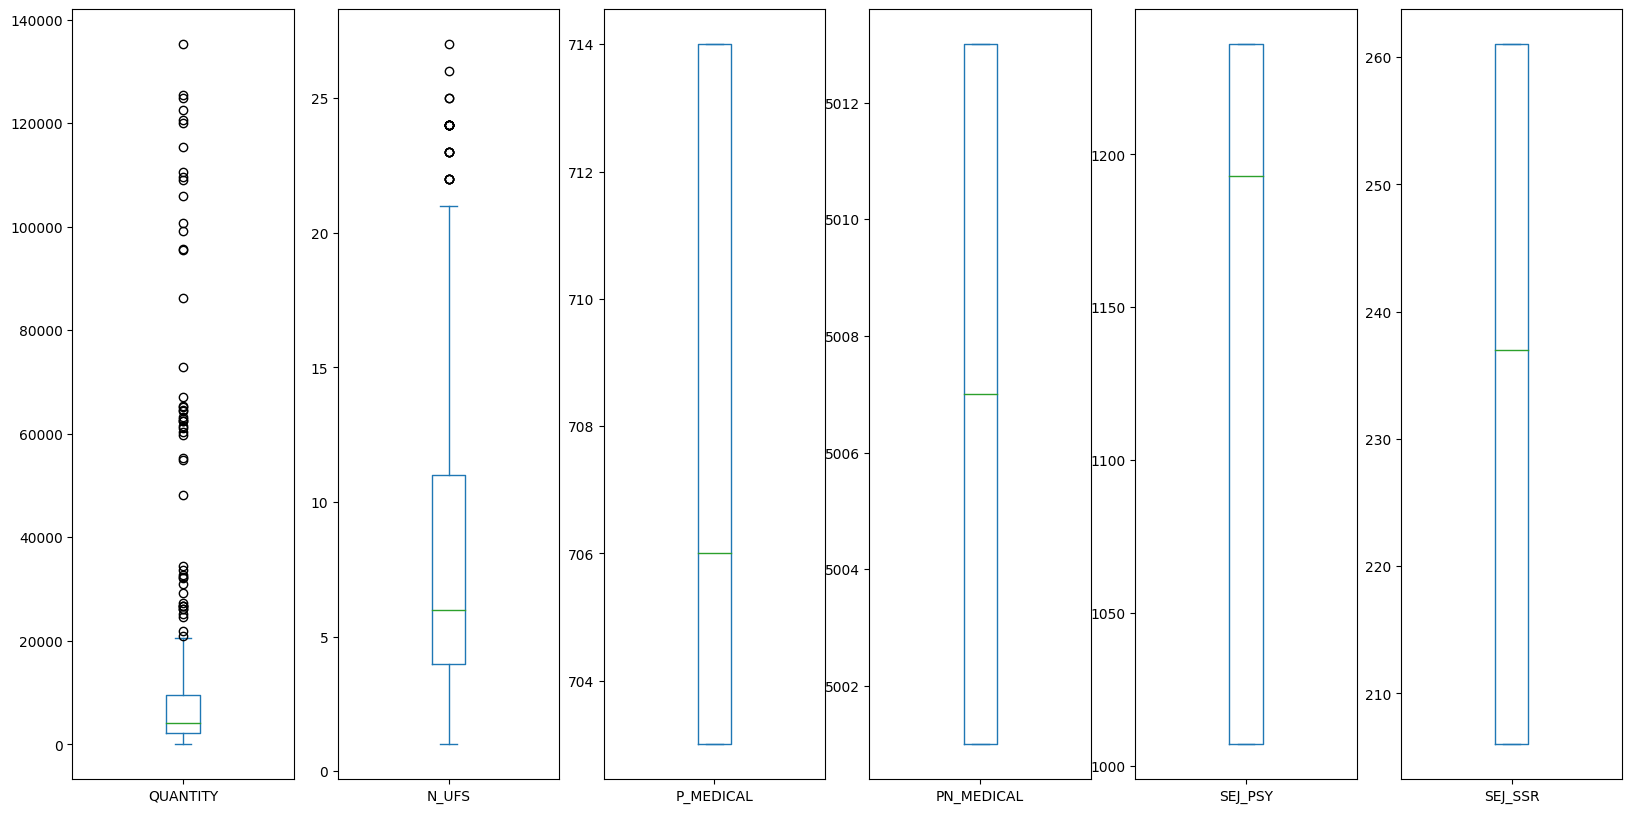

In [ ]:
# Outliers checking using boxplot
df_HOSPI_2.plot(kind='box', subplots=True, figsize=(20, 10))
plt.show()

In [ ]:
# Remove outliers in each numerical variable for every HOSPI_CODE_UCD
unique_UCD_list = df_HOSPI_2['HOSPI_CODE_UCD'].unique()
result_list=[]

for unique_UCD in unique_UCD_list:

  df_temp = df_HOSPI_2[df_HOSPI_2['HOSPI_CODE_UCD'] == unique_UCD].copy()

  #Outlierdetection here
  numerical_cols=['QUANTITY','N_UFS']

  for col in numerical_cols:
    Q1 = df_temp[col].quantile(0.25)
    Q3 = df_temp[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data frame to remove outliers
    df_temp = df_temp[(df_temp[col] >= lower_bound) & (df_temp[col] <= upper_bound)]

  result_list.append(df_temp)

df_HOSPI_2=pd.concat(result_list, axis=0)

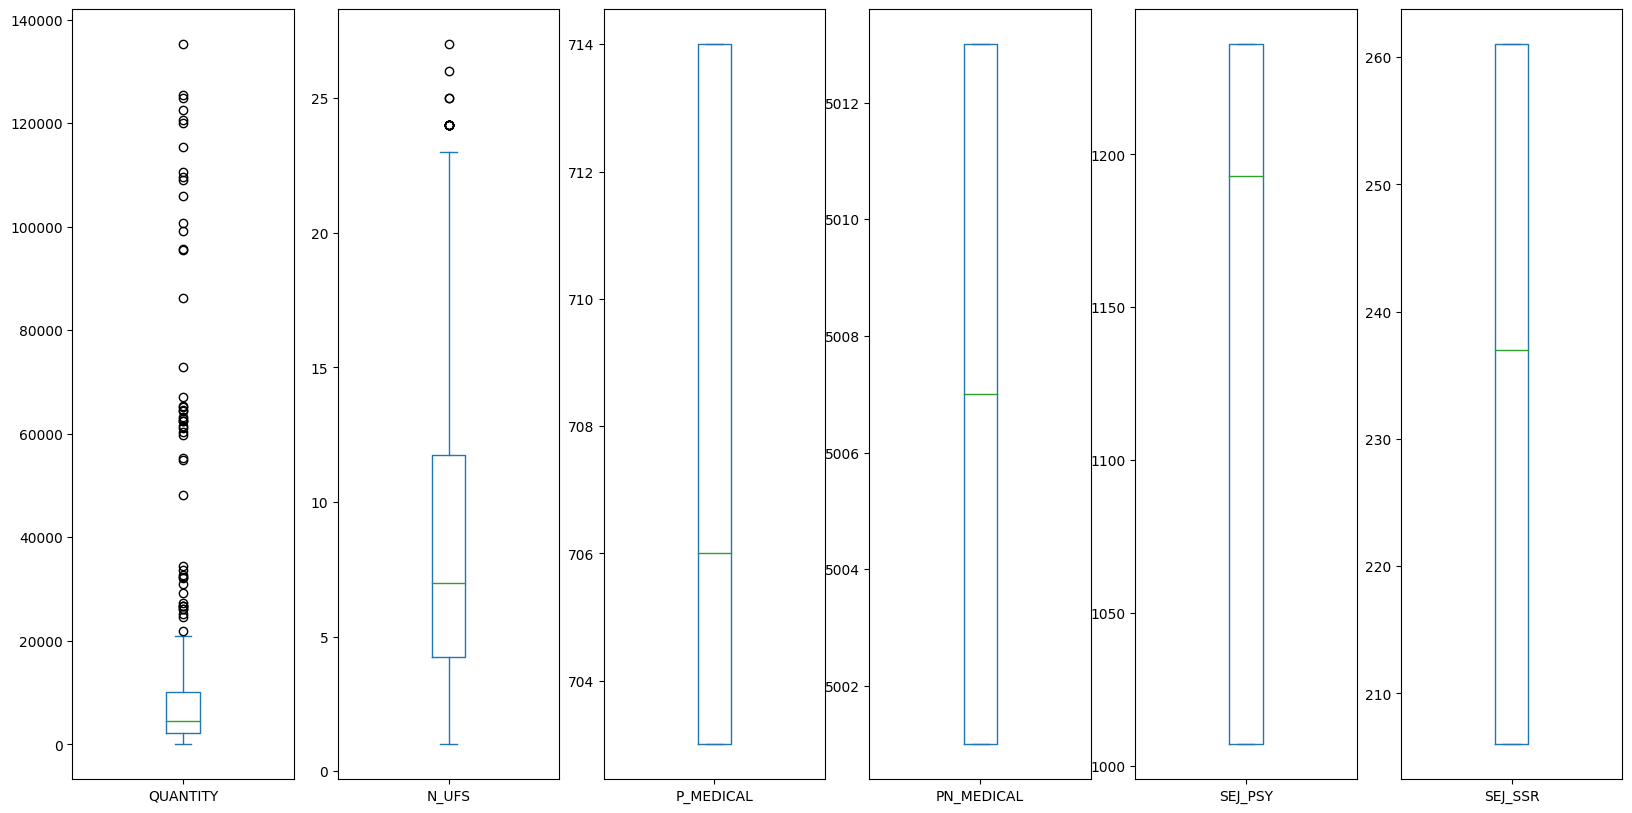

In [ ]:
# Outliers checking using boxplot
df_HOSPI_2.plot(kind='box', subplots=True, figsize=(20, 10))
plt.show()

In [ ]:
df_HOSPI_2['YEAR'] = df_HOSPI_2['DATE'].dt.year
df_HOSPI_2['MONTH'] = df_HOSPI_2['DATE'].dt.month


In [ ]:
df_HOSPI_2.drop(['DATE'],axis=1,inplace=True)

In [ ]:
# Select columns to normalize
columns_to_normalize = [col for col in df_HOSPI_2.columns if col not in ['HOSPI_CODE_UCD', 'YEAR', 'MONTH']]

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_HOSPI_2[columns_to_normalize] = scaler.fit_transform(df_HOSPI_2[columns_to_normalize])

In [ ]:
model_2=df_HOSPI_2.groupby(['HOSPI_CODE_UCD','YEAR','MONTH']).agg({'QUANTITY':'sum','N_UFS':'mean','P_MEDICAL':'mean','PN_MEDICAL':'mean', 'SEJ_PSY':'mean','SEJ_SSR':'mean'})

In [ ]:
model_2.reset_index(inplace=True)

In [ ]:
df_UCD_regression_Hospi_2 = model_2
model_2 = pd.get_dummies(model_2, columns=["HOSPI_CODE_UCD","MONTH"], prefix=["HOSPI_CODE_UCD", "MONTH"])
model_2

,YEAR,QUANTITY,N_UFS,P_MEDICAL,PN_MEDICAL,SEJ_PSY,SEJ_SSR,HOSPI_CODE_UCD_3400890837149,HOSPI_CODE_UCD_3400891191226,HOSPI_CODE_UCD_3400891225037,HOSPI_CODE_UCD_3400891235203,HOSPI_CODE_UCD_3400891996128,HOSPI_CODE_UCD_3400892052120,HOSPI_CODE_UCD_3400892065366,HOSPI_CODE_UCD_3400892075761,HOSPI_CODE_UCD_3400892088310,HOSPI_CODE_UCD_3400892203645,HOSPI_CODE_UCD_3400892508566,HOSPI_CODE_UCD_3400892669236,HOSPI_CODE_UCD_3400892697789,HOSPI_CODE_UCD_3400892729589,HOSPI_CODE_UCD_3400892745848,HOSPI_CODE_UCD_3400892761527,HOSPI_CODE_UCD_3400892761695,HOSPI_CODE_UCD_3400893022634,HOSPI_CODE_UCD_3400893736135,HOSPI_CODE_UCD_3400893826706,HOSPI_CODE_UCD_3400893875490,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,2017,0.013681,0.153846,1.000000,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2017,0.016640,0.115385,1.000000,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2017,0.018193,0.153846,1.000000,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2017,0.014791,0.115385,1.000000,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2017,0.015826,0.153846,1.000000,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2019,0.052818,0.423077,0.272727,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
606,2019,0.060220,0.500000,0.272727,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
607,2019,0.063386,0.423077,0.272727,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
608,2019,0.056123,0.423077,0.272727,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


### **Data Splitting Hospital 2**

In [ ]:
X_val=model_2.drop(['QUANTITY'], axis=1)
y_val=model_2['QUANTITY']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_val,y_val, test_size=0.2,shuffle=True, random_state=42)

### **Overall Linear Regression Hospital 2**

In [ ]:
#model definition
l_reg_1=LinearRegression()

# train the model
l_reg_1.fit(X_train,y_train)

print(f"The accuracy after learning %2.3f Percent"%(l_reg_1.score(X_train,y_train)*100))

## Let's make the test with the 20% remaining data
## To do it, we use the function `predict`
l_pred_1= l_reg_1.predict(X_test)

print(f"Accuracy_Score = %2.2f" % metrics.r2_score(y_test,l_pred_1))

The accuracy after learning 89.895 Percent
Accuracy_Score = 0.90


### **Overall XGB Regression**

In [ ]:
# Try different Regression
#model definition
xgb_model = XGBRegressor(random_state=0,seed = 7)

# train the model
xgb_model.fit(X_train, y_train)

print(f"The accuracy after learning %2.3f Percent"%(xgb_model.score(X_train,y_train)*100))

## Let's make the test with the 20% remaining data
## To do it, we use the function `predict`
xgb_predictions = xgb_model.predict(X_test)

print(f"Accuracy_Score = %2.2f" % metrics.r2_score(y_test,xgb_predictions))

The accuracy after learning 99.979 Percent
Accuracy_Score = 0.93


### **Overall Random Forest Regression**

In [ ]:
# Try different Regression
#model definition
rf_model=RandomForestRegressor(n_estimators=30,random_state=42)

# train the model
rf_model.fit(X_train,y_train)
print(f"The accuracy after learning %2.3f Percent"%(rf_model.score(X_train,y_train)*100))

## Let's make the test with the 20% remaining data
## To do it, we use the function `predict`
rf_predictions = rf_model.predict(X_test)

print(f"Accuracy_Score = %2.2f" % metrics.r2_score(y_test,rf_predictions))

The accuracy after learning 99.097 Percent
Accuracy_Score = 0.96


### **Linear Regression Hospital 2**

In [ ]:
df_UCD_regression_Hospi_2 = pd.get_dummies(df_UCD_regression_Hospi_2, columns=["MONTH"], prefix=["MONTH"])

In [ ]:
# Coefficients of the linear regression
prediction_list =[]
y_list=[]
# Initialize variables for the weighted average
total_weighted_r2 = 0
total_samples = 0


unique_UCD_Code_list = df_UCD_regression_Hospi_2['HOSPI_CODE_UCD'].unique()
result=pd.DataFrame(index=range(len(unique_UCD_Code_list)),columns=['HOSPI_CODE_UCD','MSE','RMSE','R2','MAPE','Accurancy'])
result['HOSPI_CODE_UCD'] = unique_UCD_Code_list

j = 0
for unique_UCD_Code in unique_UCD_Code_list:

  df_temp = df_UCD_regression_Hospi_2[df_UCD_regression_Hospi_2['HOSPI_CODE_UCD'] == unique_UCD_Code].copy().drop(['HOSPI_CODE_UCD'], axis=1)

  X_val=df_temp.drop(['QUANTITY'], axis=1)
  y_val=df_temp['QUANTITY']

  # Separate data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42, shuffle=True)

  model=LinearRegression()
  model.fit(X_train,y_train)

  # Make predictions
  predictions = model.predict(X_test)
  prediction_list.append(pd.DataFrame(predictions))
  y_list.append(y_test.copy())

  # Evaluate model performance using KPIs
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

  # Result table
  result['Accurancy'][j]= model.score(X_test,y_test)*100
  result['MSE'][j]= round(mse, 5)
  result['RMSE'][j]= round(np.sqrt(mse), 5)
  result['R2'][j]= round(r2, 5)
  result['MAPE'][j]= round(mape, 5)

  # Weighting of the R-squared value based on the number of data points in this group
  num_samples = len(y_val)
  total_weighted_r2 += r2 * num_samples
  total_samples += num_samples

  j=j+1
result['HOSPI_CODE_UCD'] = result['HOSPI_CODE_UCD'].astype(str)
result

,HOSPI_CODE_UCD,MSE,RMSE,R2,MAPE,Accurancy
0,3400890837149,0.00319,0.05648,-0.39831,125.54608,-39.831378
1,3400891191226,0.00004,0.00606,0.14193,23.81888,14.192619
2,3400891225037,0.00305,0.05526,-0.28785,36.43235,-28.785203
3,3400891235203,0.00001,0.00329,-1.13343,24.0832,-113.343416
4,3400891996128,0.02932,0.17123,0.20942,21.58621,20.942046
5,3400892052120,0.0,0.00208,0.62167,14.58419,62.167465
6,3400892065366,0.00061,0.0246,-1.28212,33.56939,-128.211966
7,3400892075761,8586715.97961,2930.30988,-189480286330.851685,5132612.24788,-18948028633085.167969
8,3400892088310,0.0,0.002,0.66589,6.63524,66.589072
9,3400892203645,0.00003,0.00572,-3.20755,23.33559,-320.754853


In [ ]:
result.MAPE.astype(float).mean()

830083.4626171427

In [ ]:
result.R2.astype(float).mean()

-60158441299.595505

In [ ]:
# Calculate the weighted average of the R-squared values
total_regression_r2 = total_weighted_r2 / total_samples

print("Weighted R-squared for the entire regression:", total_regression_r2)

Weighted R-squared for the entire regression: -54872055595.425186


### **XGB Regression Hospital 2**

In [ ]:
# Coefficients of the XGB regression
prediction_list =[]
y_list=[]
# Initialize variables for the weighted average
total_weighted_r2 = 0
total_samples = 0


unique_UCD_Code_list = df_UCD_regression_Hospi_2['HOSPI_CODE_UCD'].unique()
result=pd.DataFrame(index=range(len(unique_UCD_Code_list)),columns=['HOSPI_CODE_UCD','MSE','RMSE','R2','MAPE','Accurancy',])
result['HOSPI_CODE_UCD'] = unique_UCD_Code_list

j = 0
for unique_UCD_Code in unique_UCD_Code_list:

  df_temp = df_UCD_regression_Hospi_2[df_UCD_regression_Hospi_2['HOSPI_CODE_UCD'] == unique_UCD_Code].copy().drop(['HOSPI_CODE_UCD'], axis=1)

  X_val=df_temp.drop(['QUANTITY'], axis=1)
  y_val=df_temp['QUANTITY']

  # Separate data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42, shuffle=True)

  model = XGBRegressor(random_state=0,seed = 7)
  model.fit(X_train, y_train)

  # Make predictions
  predictions = model.predict(X_test)
  prediction_list.append(pd.DataFrame(predictions))
  y_list.append(y_test.copy())

  # Evaluate model performance using KPIs
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

  # Result table
  result['Accurancy'][j]= model.score(X_test,y_test)*100
  result['MSE'][j]= round(mse, 5)
  result['RMSE'][j]= round(np.sqrt(mse), 5)
  result['R2'][j]= round(r2, 5)
  result['MAPE'][j]= round(mape, 5)

  # Weighting of the R-squared value based on the number of data points in this group
  num_samples = len(y_val)
  total_weighted_r2 += r2 * num_samples
  total_samples += num_samples

  j=j+1
result['HOSPI_CODE_UCD'] = result['HOSPI_CODE_UCD'].astype(str)
result

,HOSPI_CODE_UCD,MSE,RMSE,R2,MAPE,Accurancy
0,3400890837149,0.0024,0.04903,-0.05403,134.38624,-5.40274
1,3400891191226,0.00001,0.00293,0.79882,9.68575,79.882432
2,3400891225037,0.00195,0.04417,0.17736,27.0673,17.735801
3,3400891235203,0.0,0.00203,0.18903,16.26495,18.90263
4,3400891996128,0.00911,0.09545,0.75433,14.0608,75.433057
5,3400892052120,0.00001,0.0028,0.31152,18.78489,31.151549
6,3400892065366,0.00019,0.01372,0.29023,19.93019,29.02262
7,3400892075761,0.00002,0.00392,0.66123,18.58892,66.123154
8,3400892088310,0.0,0.00183,0.72139,5.75951,72.138708
9,3400892203645,0.00005,0.00691,-5.12225,23.3122,-512.225091


In [ ]:
result.MAPE.astype(float).mean()

19.881289999999996

In [ ]:
result.R2.astype(float).mean()

-0.319712380952381

In [ ]:
# Calculate the weighted average of the R-squared values
total_regression_r2 = total_weighted_r2 / total_samples

print("Weighted R-squared for the entire regression:", total_regression_r2)

Weighted R-squared for the entire regression: -0.17327341199627436


### **Random Forest Regression Hospital 2**

In [ ]:
# Coefficients of the linear regression
prediction_list =[]
y_list=[]
# Initialize variables for the weighted average
total_weighted_r2 = 0
total_samples = 0


unique_UCD_Code_list = df_UCD_regression_Hospi_2['HOSPI_CODE_UCD'].unique()
result=pd.DataFrame(index=range(len(unique_UCD_Code_list)),columns=['HOSPI_CODE_UCD','MSE','RMSE','R2','MAPE','Accurancy',])
result['HOSPI_CODE_UCD'] = unique_UCD_Code_list

j = 0
for unique_UCD_Code in unique_UCD_Code_list:

  df_temp = df_UCD_regression_Hospi_2[df_UCD_regression_Hospi_2['HOSPI_CODE_UCD'] == unique_UCD_Code].copy().drop(['HOSPI_CODE_UCD'], axis=1)

  X_val=df_temp.drop(['QUANTITY'], axis=1)
  y_val=df_temp['QUANTITY']

  # Separate data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42, shuffle=True)

  model=RandomForestRegressor(n_estimators=30,random_state=42)
  model.fit(X_train,y_train)

  # Make predictions
  predictions = model.predict(X_test)
  prediction_list.append(pd.DataFrame(predictions))
  y_list.append(y_test.copy())

  # Evaluate model performance using KPIs
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

  # Result table
  result['Accurancy'][j]= model.score(X_test,y_test)*100
  result['MSE'][j]= round(mse, 5)
  result['RMSE'][j]= round(np.sqrt(mse), 5)
  result['R2'][j]= round(r2, 5)
  result['MAPE'][j]= round(mape, 5)

  # Weighting of the R-squared value based on the number of data points in this group
  num_samples = len(y_val)
  total_weighted_r2 += r2 * num_samples
  total_samples += num_samples

  j=j+1
result['HOSPI_CODE_UCD'] = result['HOSPI_CODE_UCD'].astype(str)
result

,HOSPI_CODE_UCD,MSE,RMSE,R2,MAPE,Accurancy
0,3400890837149,0.00267,0.05169,-0.17145,148.09455,-17.145313
1,3400891191226,0.0,0.00172,0.9308,6.64615,93.080263
2,3400891225037,0.00155,0.03934,0.34733,25.35228,34.732755
3,3400891235203,0.0,0.00216,0.08569,18.30549,8.569166
4,3400891996128,0.01613,0.12699,0.56513,18.69775,56.513205
5,3400892052120,0.00001,0.00279,0.32033,19.9671,32.032966
6,3400892065366,0.00029,0.01691,-0.07787,27.1094,-7.787293
7,3400892075761,0.00002,0.00409,0.63166,17.89464,63.166107
8,3400892088310,0.0,0.00207,0.64517,6.78262,64.517234
9,3400892203645,0.00003,0.00583,-3.3566,20.8895,-335.660362


In [ ]:
result.MAPE.astype(float).mean()

20.618386190476194

In [ ]:
result.R2.astype(float).mean()

-0.07790523809523806

In [ ]:
# Calculate the weighted average of the R-squared values
total_regression_r2 = total_weighted_r2 / total_samples

print("Weighted R-squared for the entire regression:", total_regression_r2)

Weighted R-squared for the entire regression: 0.007927726942843076


## **Analyzing Hospital 4**

In [ ]:
df_HOSPI_4

,ID_SITE_RATTACHE,CODE_ATC,HOSPI_CODE_UCD,N_UFS,QUANTITY,MONTH,YEAR,N_ETB,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD,DATE
65763,HOSPI_4,N02BE01,3400891996128,2,600,1,2016,39,1835903,2526,15604,4536,470,247827,0,22,7902,163,2016-01-01
65764,HOSPI_4,N02BE01,3400891996128,1,3000,1,2016,39,1835903,2526,15604,4536,470,247827,0,22,7902,163,2016-01-01
65765,HOSPI_4,N02BE01,3400891996128,1,9000,1,2016,39,1835903,2526,15604,4536,470,247827,0,22,7902,163,2016-01-01
65766,HOSPI_4,N02BE01,3400891996128,1,18000,1,2016,39,1835903,2526,15604,4536,470,247827,0,22,7902,163,2016-01-01
65767,HOSPI_4,N02BE01,3400891996128,2,18000,1,2016,39,1835903,2526,15604,4536,470,247827,0,22,7902,163,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75687,HOSPI_4,J01CR05,3400893022634,2,250,2,2019,39,1871364,2639,15774,4530,514,263011,0,770,8031,172,2019-02-01
75688,HOSPI_4,J01CR05,3400893022634,1,200,2,2019,39,1871364,2639,15774,4530,514,263011,0,770,8031,172,2019-02-01
75689,HOSPI_4,J01CR05,3400893022634,3,500,2,2019,39,1871364,2639,15774,4530,514,263011,0,770,8031,172,2019-02-01
75690,HOSPI_4,J01CR05,3400893022634,3,650,3,2019,39,1871364,2639,15774,4530,514,263011,0,770,8031,172,2019-03-01


In [ ]:
df_HOSPI_4= df_HOSPI_4.groupby(['CODE_ATC','HOSPI_CODE_UCD','DATE']).agg({'QUANTITY':'sum','N_ETB':'mean','N_UFS':'mean','POPULATION':'mean','P_MEDICAL':'mean','PN_MEDICAL':'mean','LIT_HC':'mean','LIT_HP':'mean','SEJ_MCO':'mean','SEJ_HAD':'mean', 'SEJ_PSY':'mean','SEJ_SSR':'mean','SEJ_SLD':'mean'})

In [ ]:
df_HOSPI_4.reset_index(inplace=True)

In [ ]:
# Checking the correlation between the categorical variables and the dependent variable
categorical_variables= ['CODE_ATC','HOSPI_CODE_UCD','DATE']

for categorical_variable in categorical_variables:
    df_encoded = pd.get_dummies(df_HOSPI_4, columns=[categorical_variable], prefix=[categorical_variable], drop_first=True)
    dummy_variable_columns = [df_col for df_col in df_encoded.columns if categorical_variable in df_col]

    dummy_variable_columns_with_quantity = dummy_variable_columns.copy()
    dummy_variable_columns_with_quantity.append("QUANTITY")

    new_df = df_encoded[dummy_variable_columns_with_quantity]

    print("Categorical variable:", categorical_variable)
    print("Columns to be used for training:", dummy_variable_columns)
    print("Shape of X (features):", new_df[dummy_variable_columns].shape)
    print("Shape of y (target):", new_df["QUANTITY"].shape)

    # Check if new_df has data before fitting the model
    if not new_df.empty and dummy_variable_columns:
        model = LinearRegression()
        model.fit(new_df[dummy_variable_columns], new_df["QUANTITY"])
        predictions = model.predict(new_df[dummy_variable_columns])
        r2 = r2_score(new_df["QUANTITY"], predictions)
        print("R-squared score for", categorical_variable, ":", r2)
    else:
        print("No data for this code.")

    print("-" * 50)

Categorical variable: CODE_ATC
Columns to be used for training: ['CODE_ATC_A12BA01', 'CODE_ATC_B01AB05', 'CODE_ATC_B01AC06', 'CODE_ATC_B05XA03', 'CODE_ATC_B05XA09', 'CODE_ATC_C01CA03', 'CODE_ATC_C03CA01', 'CODE_ATC_H02AB06', 'CODE_ATC_J01CR05', 'CODE_ATC_M03BX01', 'CODE_ATC_N02AX02', 'CODE_ATC_N02BE01', 'CODE_ATC_N05BA04', 'CODE_ATC_N05BA12', 'CODE_ATC_N05CF01', 'CODE_ATC_N05CF02', 'CODE_ATC_R03AC02']
Shape of X (features): (770, 17)
Shape of y (target): (770,)
R-squared score for CODE_ATC : 0.5125204918537694
--------------------------------------------------
Categorical variable: HOSPI_CODE_UCD
Columns to be used for training: ['HOSPI_CODE_UCD_3400891191226', 'HOSPI_CODE_UCD_3400891225037', 'HOSPI_CODE_UCD_3400891235203', 'HOSPI_CODE_UCD_3400891996128', 'HOSPI_CODE_UCD_3400892052120', 'HOSPI_CODE_UCD_3400892065366', 'HOSPI_CODE_UCD_3400892075761', 'HOSPI_CODE_UCD_3400892088310', 'HOSPI_CODE_UCD_3400892203645', 'HOSPI_CODE_UCD_3400892508566', 'HOSPI_CODE_UCD_3400892669236', 'HOSPI_COD

In [ ]:
# Chi-squared test to check correlation of the categorical variables
categorical_variables = [ 'CODE_ATC','HOSPI_CODE_UCD','DATE']

# Get all pairwise combinations of categorical variables
combinations = list(itertools.combinations(categorical_variables, 2))

# Perform chi-squared test for each pair of columns
for combo in combinations:
    observed = pd.crosstab(df_HOSPI_4[combo[0]], df_HOSPI_4[combo[1]])
    chi2, p, dof, expected = chi2_contingency(observed)
    print(f"Chi-squared test for columns {combo}:")
    print(f"P-value: {p}")
    #print(observed)
    print("-" * 50)

Chi-squared test for columns ('CODE_ATC', 'HOSPI_CODE_UCD'):
P-value: 0.0
--------------------------------------------------
Chi-squared test for columns ('CODE_ATC', 'DATE'):
P-value: 1.0
--------------------------------------------------
Chi-squared test for columns ('HOSPI_CODE_UCD', 'DATE'):
P-value: 1.0
--------------------------------------------------


In [ ]:
# Only drop Code ATC with the same explanation as for the other hospitals
df_HOSPI_4.drop(['CODE_ATC'],axis=1,inplace=True)

In [ ]:
df_HOSPI_4

,HOSPI_CODE_UCD,DATE,QUANTITY,N_ETB,N_UFS,POPULATION,P_MEDICAL,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_MCO,SEJ_HAD,SEJ_PSY,SEJ_SSR,SEJ_SLD
0,3400893736135,2016-01-01,2500,39.0,1.250000,1835903.0,2526.0,15604.0,4536.0,470.0,247827.0,0.0,22.0,7902.0,163.0
1,3400893736135,2016-02-01,9560,39.0,1.307692,1835903.0,2526.0,15604.0,4536.0,470.0,247827.0,0.0,22.0,7902.0,163.0
2,3400893736135,2016-03-01,7710,39.0,1.500000,1835903.0,2526.0,15604.0,4536.0,470.0,247827.0,0.0,22.0,7902.0,163.0
3,3400893736135,2016-04-01,7380,39.0,1.888889,1835903.0,2526.0,15604.0,4536.0,470.0,247827.0,0.0,22.0,7902.0,163.0
4,3400893736135,2016-05-01,8360,39.0,1.454545,1835903.0,2526.0,15604.0,4536.0,470.0,247827.0,0.0,22.0,7902.0,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,3400892745848,2018-11-01,12720,39.0,1.437500,1859524.0,2627.0,15723.0,4477.0,486.0,255490.0,0.0,837.0,8416.0,209.0
766,3400892745848,2018-12-01,13080,39.0,1.277778,1859524.0,2627.0,15723.0,4477.0,486.0,255490.0,0.0,837.0,8416.0,209.0
767,3400892745848,2019-01-01,18540,39.0,1.611111,1871364.0,2639.0,15774.0,4530.0,514.0,263011.0,0.0,770.0,8031.0,172.0
768,3400892745848,2019-02-01,17460,39.0,1.769231,1871364.0,2639.0,15774.0,4530.0,514.0,263011.0,0.0,770.0,8031.0,172.0


In [ ]:
len(df_HOSPI_4[df_HOSPI_4.SEJ_HAD == 0])

770

In [ ]:
# Drop SEJ_HAD as the variable only has the value zero
df_HOSPI_4.drop(['SEJ_HAD'],axis=1,inplace=True)

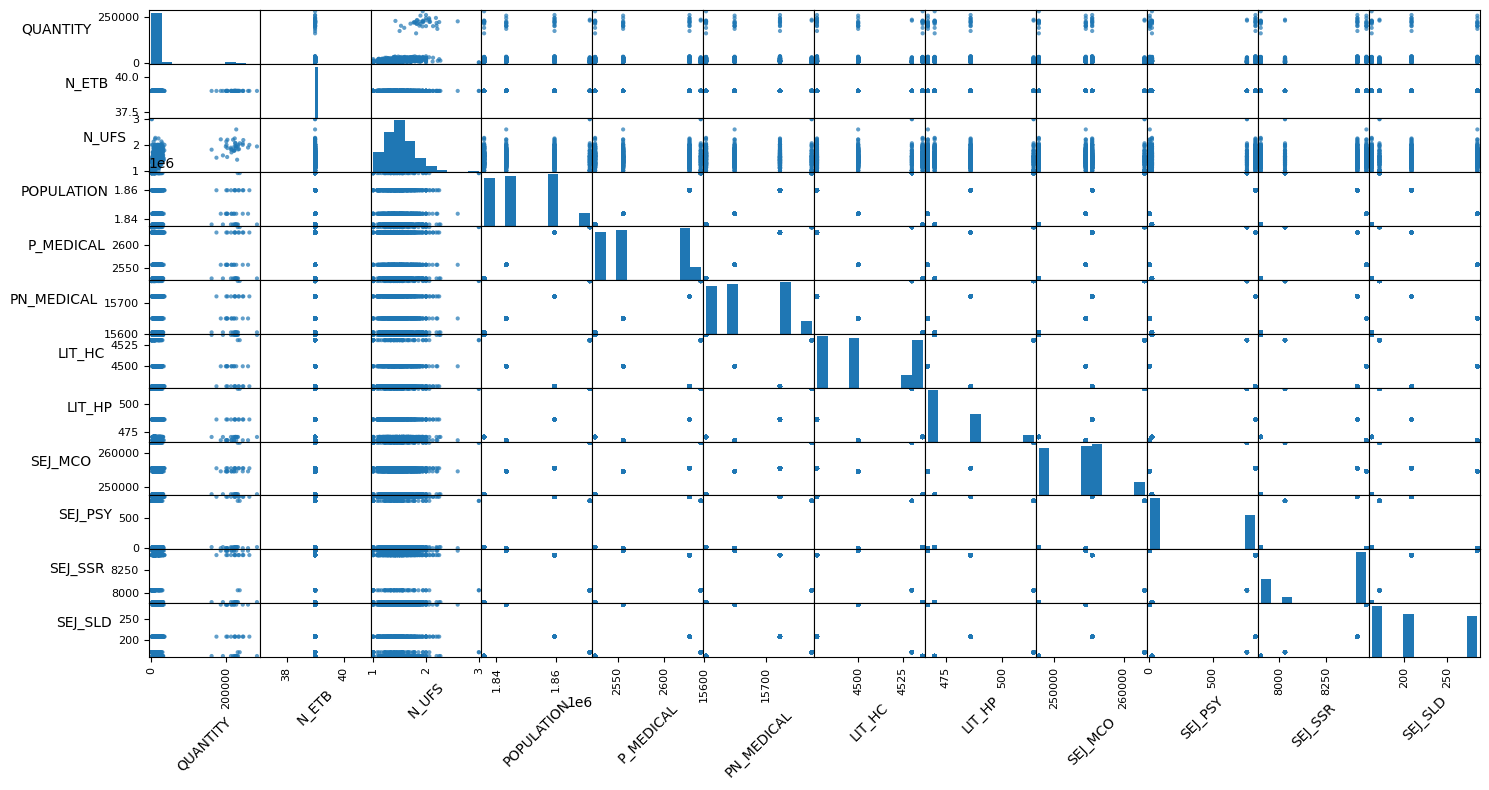

In [ ]:
# Look at the interactions between the variables.
axes=pd.plotting.scatter_matrix(df_HOSPI_4,figsize=(15, 8),alpha=0.7 )
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
# It is same for one hospital so no need to keep it
df_HOSPI_4.drop(['N_ETB'],axis=1,inplace=True)

<Axes: >

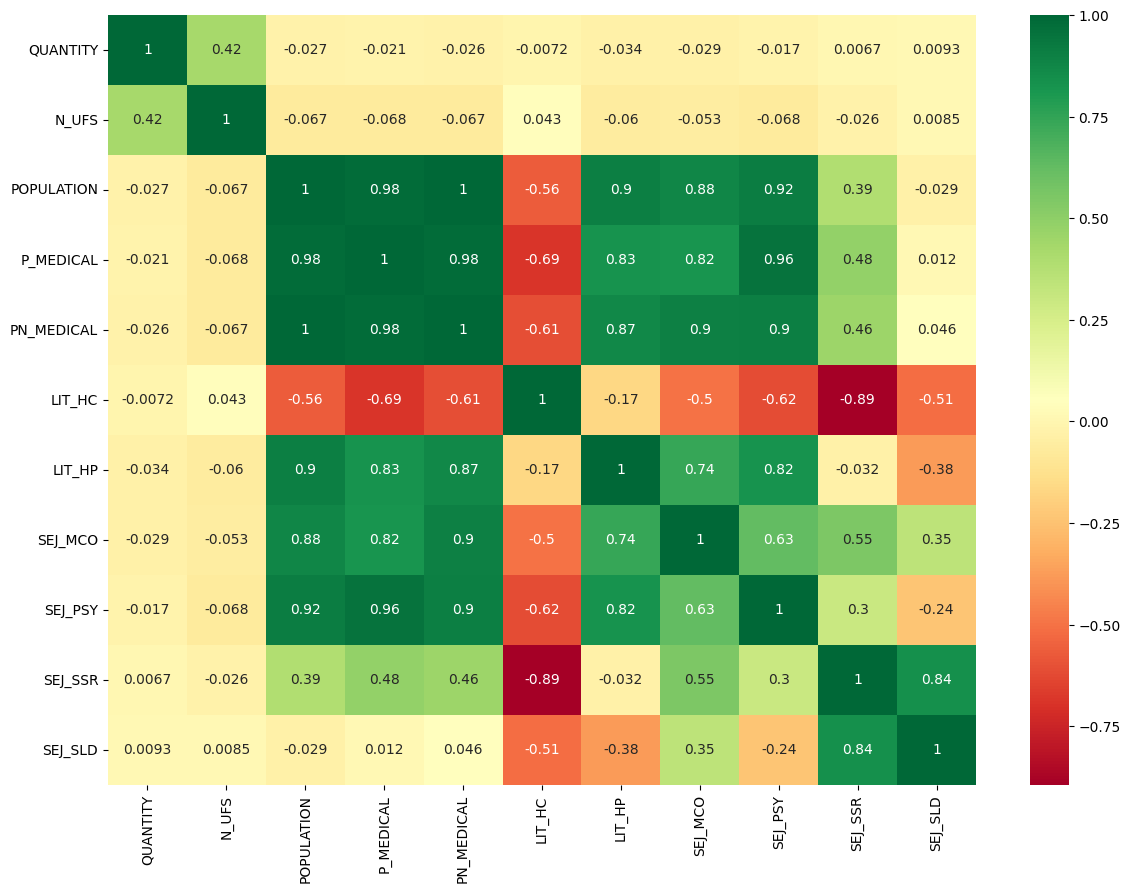

In [ ]:
plt.figure(figsize=(14,10))
# seaborn has an easy method to showcase heatmap
sns.heatmap(df_HOSPI_4.corr(method='pearson'), annot=True,cmap ='RdYlGn')

In [ ]:
# We drop 'POPULATION' and P_MEDICAL due to high correlation
df_HOSPI_4.drop(['POPULATION', 'P_MEDICAL'],axis=1,inplace=True)

<Axes: >

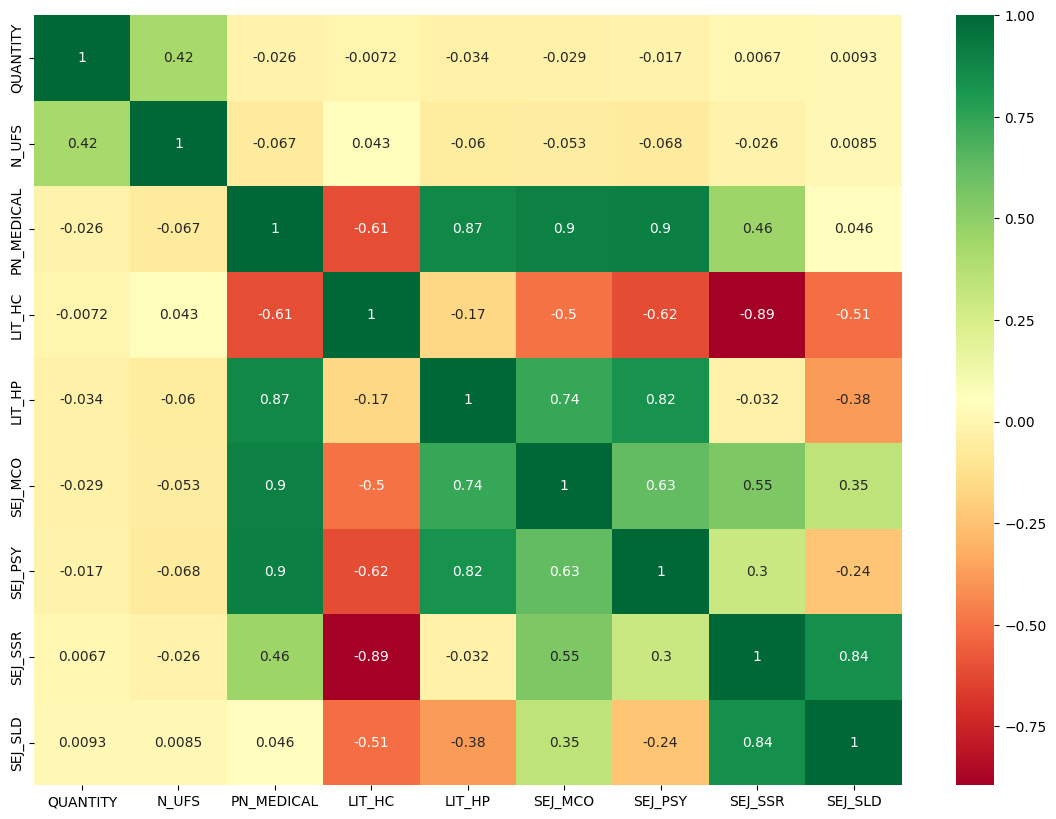

In [ ]:
plt.figure(figsize=(14,10))
# seaborn has an easy method to showcase heatmap
sns.heatmap(df_HOSPI_4.corr(method='pearson'), annot=True,cmap ='RdYlGn')

In [ ]:
# Check Correlation between numerical and categorical variables
numerical_variables= ['N_UFS',	'PN_MEDICAL',	'LIT_HC',	'LIT_HP','SEJ_PSY',	'SEJ_SSR', 'SEJ_MCO', 'SEJ_SLD']
categorical_variable='HOSPI_CODE_UCD'


for numerical_variable in numerical_variables:
    df_encoded = pd.get_dummies(df_HOSPI_4, columns=[categorical_variable], prefix=[categorical_variable], drop_first=True)
    dummy_variable_columns = [df_col for df_col in df_encoded.columns if categorical_variable in df_col]

    dummy_variable_columns_with_quantity = dummy_variable_columns.copy()
    dummy_variable_columns_with_quantity.append(numerical_variable)

    new_df = df_encoded[dummy_variable_columns_with_quantity]

    print("NUmerical variable:", numerical_variable)
    print("Columns to be used for training:", dummy_variable_columns)
    print("Shape of X (features):", new_df[dummy_variable_columns].shape)
    print("Shape of y (target):", new_df[numerical_variable].shape)

    # Check if new_df has data before fitting the model
    if not new_df.empty and dummy_variable_columns:
        model = LinearRegression()
        model.fit(new_df[dummy_variable_columns], new_df[numerical_variable])
        predictions = model.predict(new_df[dummy_variable_columns])
        r2 = r2_score(new_df[numerical_variable], predictions)
        print("R-squared score for", categorical_variable, ":", r2)
    else:
        print("No data for this code.")

    print("-" * 50)

NUmerical variable: N_UFS
Columns to be used for training: ['HOSPI_CODE_UCD_3400891191226', 'HOSPI_CODE_UCD_3400891225037', 'HOSPI_CODE_UCD_3400891235203', 'HOSPI_CODE_UCD_3400891996128', 'HOSPI_CODE_UCD_3400892052120', 'HOSPI_CODE_UCD_3400892065366', 'HOSPI_CODE_UCD_3400892075761', 'HOSPI_CODE_UCD_3400892088310', 'HOSPI_CODE_UCD_3400892203645', 'HOSPI_CODE_UCD_3400892508566', 'HOSPI_CODE_UCD_3400892669236', 'HOSPI_CODE_UCD_3400892697789', 'HOSPI_CODE_UCD_3400892729589', 'HOSPI_CODE_UCD_3400892745848', 'HOSPI_CODE_UCD_3400892761527', 'HOSPI_CODE_UCD_3400892761695', 'HOSPI_CODE_UCD_3400893022634', 'HOSPI_CODE_UCD_3400893736135', 'HOSPI_CODE_UCD_3400893826706', 'HOSPI_CODE_UCD_3400893875490']
Shape of X (features): (770, 20)
Shape of y (target): (770,)
R-squared score for HOSPI_CODE_UCD : 0.3868637510291584
--------------------------------------------------
NUmerical variable: PN_MEDICAL
Columns to be used for training: ['HOSPI_CODE_UCD_3400891191226', 'HOSPI_CODE_UCD_3400891225037', 'HO

In [ ]:
df_HOSPI_4['N_UFS'] = df_HOSPI_4['N_UFS'].astype(int)
df_HOSPI_4['PN_MEDICAL'] = df_HOSPI_4['PN_MEDICAL'].astype(int)
df_HOSPI_4['LIT_HC'] = df_HOSPI_4['LIT_HC'].astype(int)
df_HOSPI_4['LIT_HP'] = df_HOSPI_4['LIT_HP'].astype(int)
df_HOSPI_4['SEJ_MCO'] = df_HOSPI_4['SEJ_MCO'].astype(int)
df_HOSPI_4['SEJ_SLD'] = df_HOSPI_4['SEJ_SLD'].astype(int)
df_HOSPI_4['SEJ_SSR'] = df_HOSPI_4['SEJ_SSR'].astype(int)
df_HOSPI_4['SEJ_PSY'] = df_HOSPI_4['SEJ_PSY'].astype(int)

### **Outliers of Hospital 4**

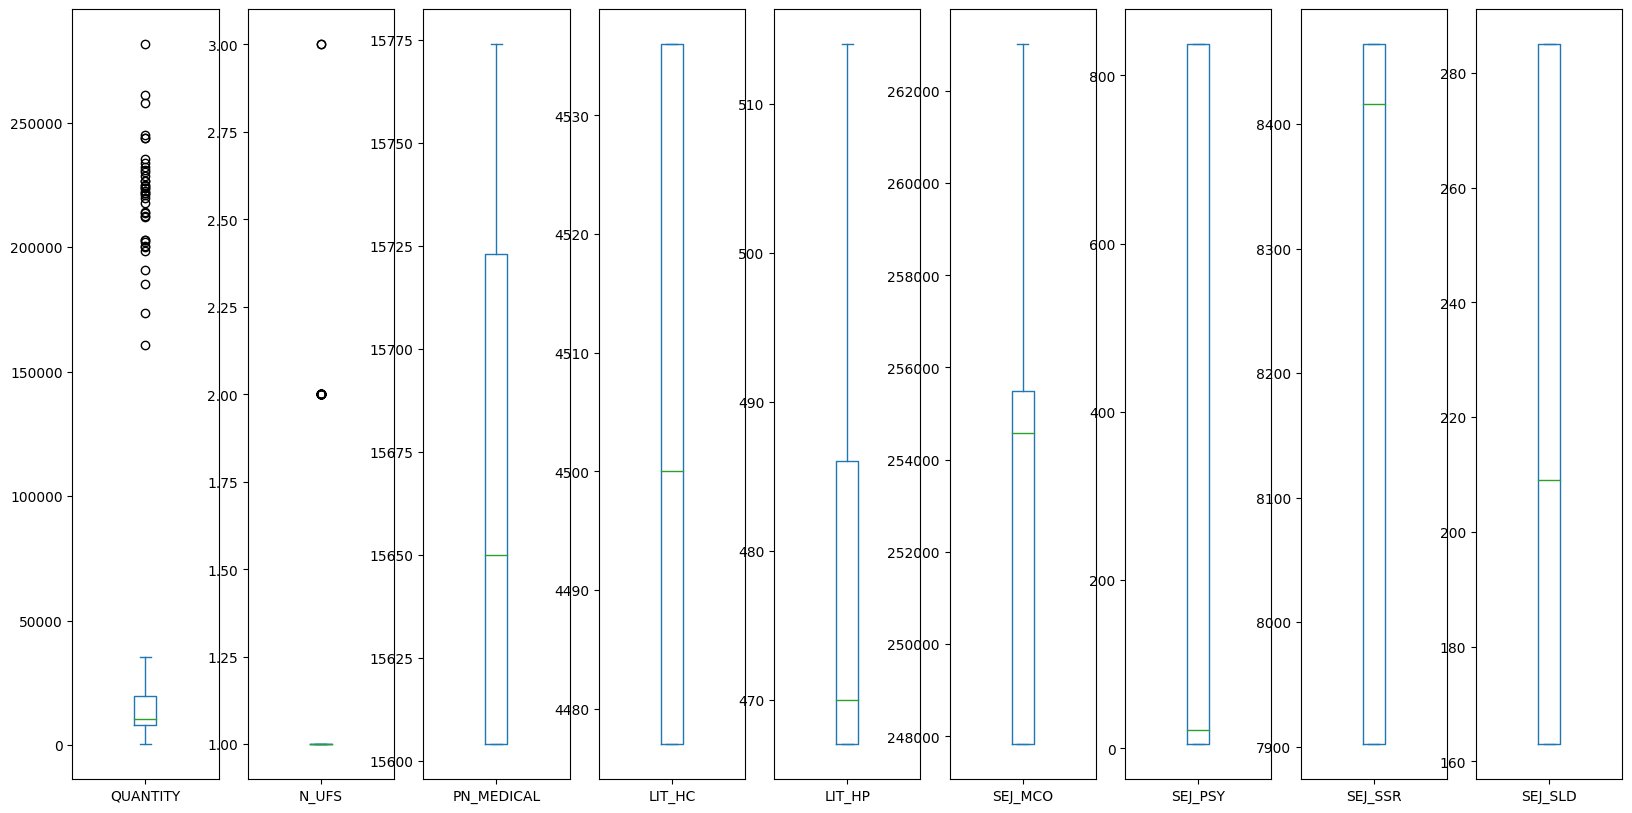

In [ ]:
# Outliers checking using boxplot
df_HOSPI_4.plot(kind='box', subplots=True, figsize=(20, 10))
plt.show()

In [ ]:
# Remove outliers in each numerical variable for every HOSPI_CODE_UCD
unique_UCD_list = df_HOSPI_4['HOSPI_CODE_UCD'].unique()
result_list=[]

for unique_UCD in unique_UCD_list:

  df_temp = df_HOSPI_4[df_HOSPI_4['HOSPI_CODE_UCD'] == unique_UCD].copy()

  #Outlierdetection here
  numerical_cols=['QUANTITY','N_UFS']

  for col in numerical_cols:
    Q1 = df_temp[col].quantile(0.25)
    Q3 = df_temp[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data frame to remove outliers
    df_temp = df_temp[(df_temp[col] >= lower_bound) & (df_temp[col] <= upper_bound)]

  result_list.append(df_temp)

df_HOSPI_2=pd.concat(result_list, axis=0)

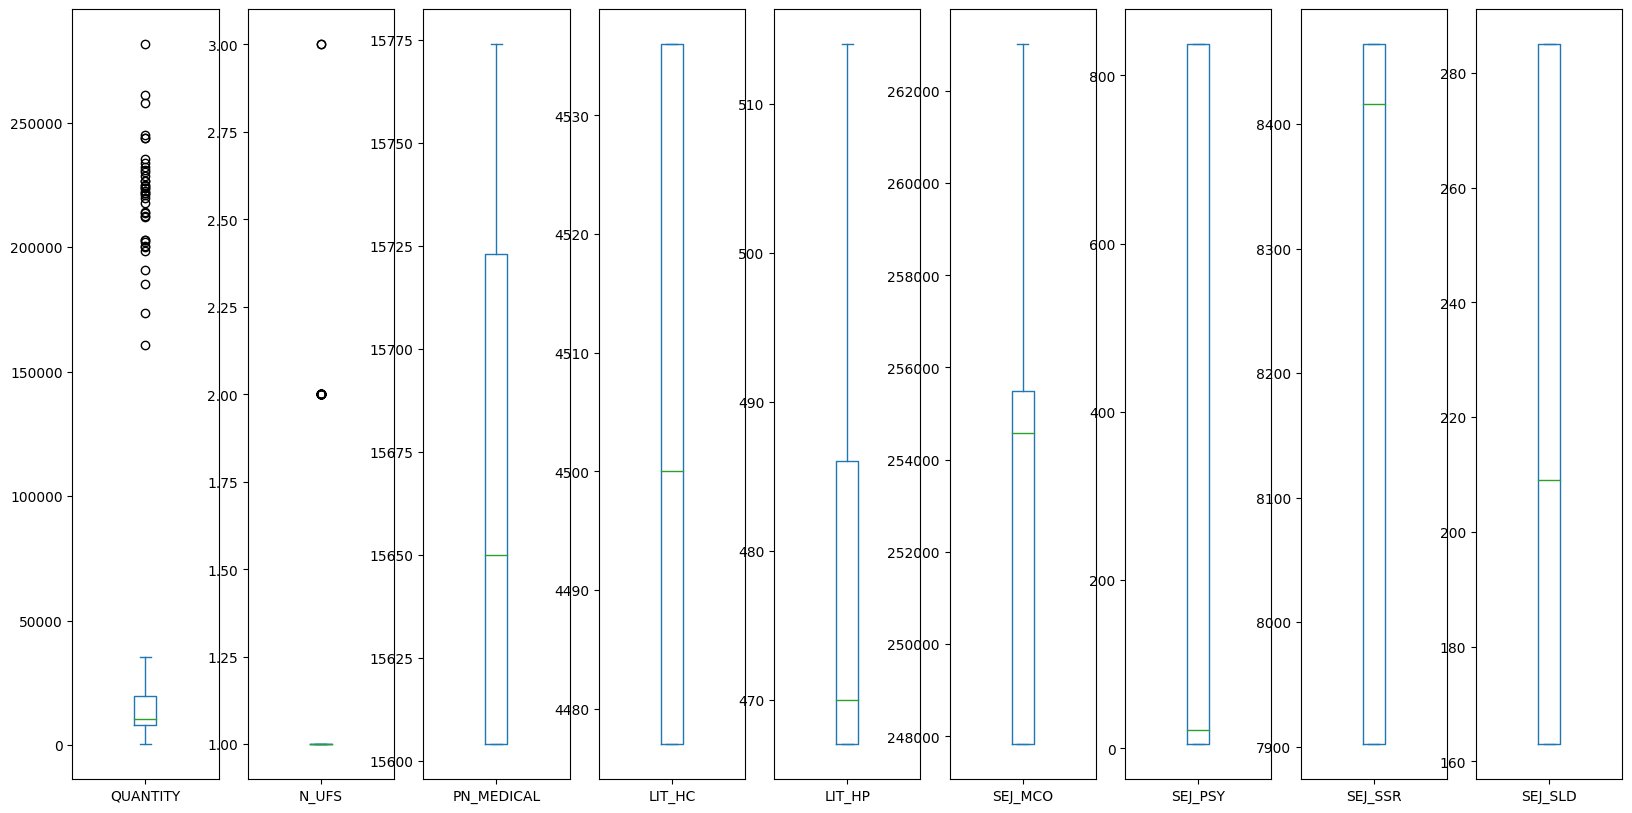

In [ ]:
# Outliers checking using boxplot
df_HOSPI_4.plot(kind='box', subplots=True, figsize=(20, 10))
plt.show()

In [ ]:
df_HOSPI_4['YEAR'] = df_HOSPI_4['DATE'].dt.year
df_HOSPI_4['MONTH'] = df_HOSPI_4['DATE'].dt.month

In [ ]:
df_HOSPI_4.drop(['DATE'],axis=1,inplace=True)

In [ ]:
# Select columns to normalize
columns_to_normalize = [col for col in df_HOSPI_4.columns if col not in ['HOSPI_CODE_UCD', 'YEAR', 'MONTH']]

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_HOSPI_4[columns_to_normalize] = scaler.fit_transform(df_HOSPI_4[columns_to_normalize])

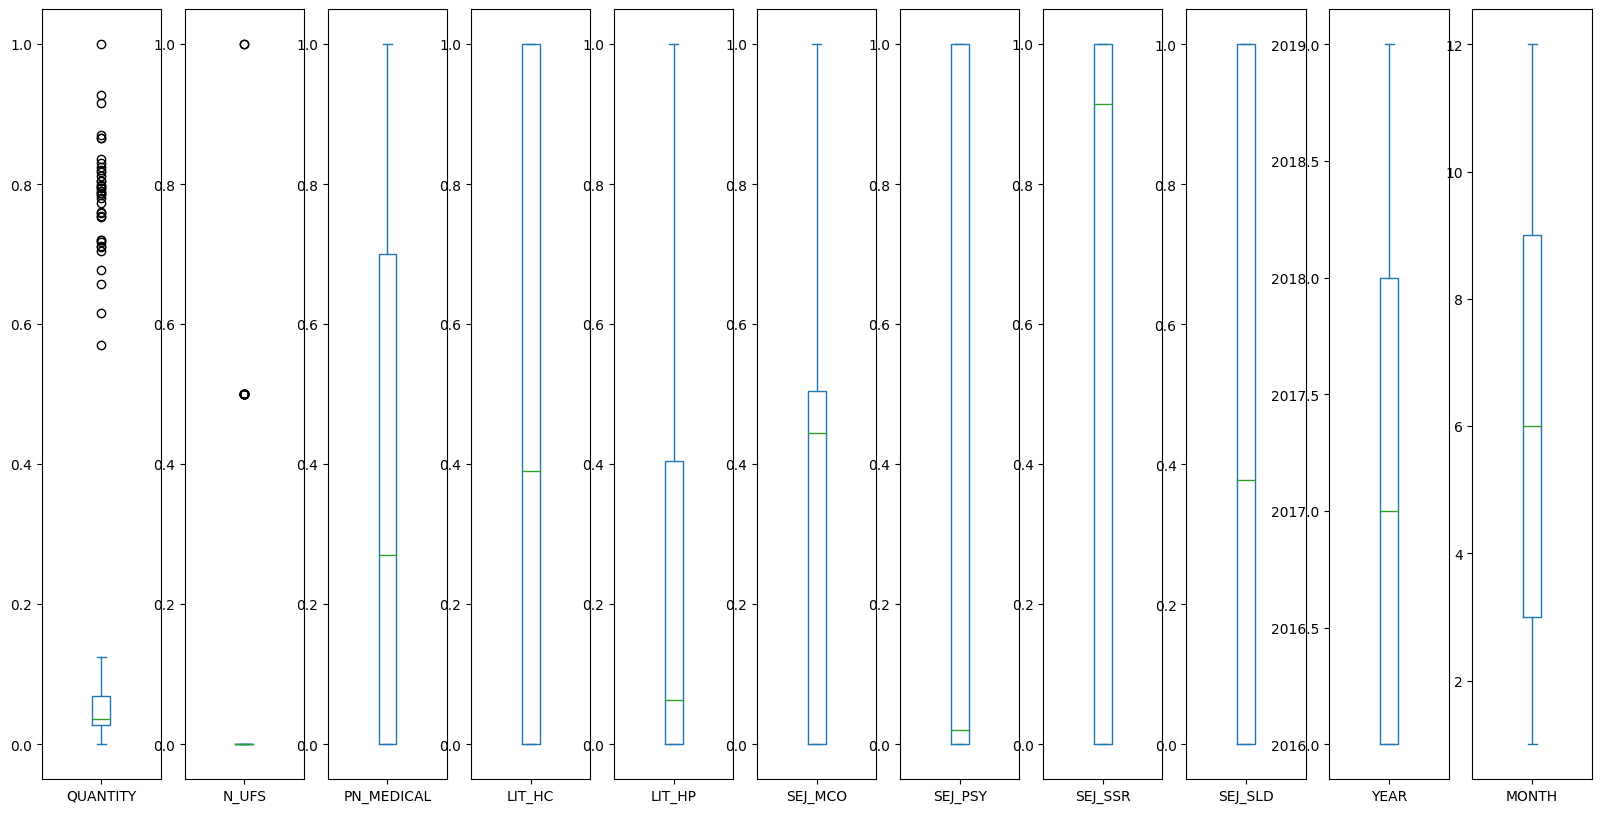

In [ ]:
# Outliers checking using boxplot
df_HOSPI_4.plot(kind='box', subplots=True, figsize=(20, 10))
plt.show()

In [ ]:
model_4=df_HOSPI_4.groupby(['HOSPI_CODE_UCD','YEAR','MONTH']).agg({'QUANTITY':'sum','N_UFS':'mean','PN_MEDICAL':'mean','LIT_HC': 'mean', 'LIT_HP': 'mean', 'SEJ_PSY':'mean','SEJ_SSR':'mean', 'SEJ_MCO':'mean','SEJ_SLD':'mean'})

In [ ]:
model_4.reset_index(inplace=True)

In [ ]:
df_UCD_regression_Hospi_4 = model_4
model_4 = pd.get_dummies(model_4, columns=["HOSPI_CODE_UCD","MONTH"], prefix=["HOSPI_CODE_UCD", "MONTH"])
model_4

,YEAR,QUANTITY,N_UFS,PN_MEDICAL,LIT_HC,LIT_HP,SEJ_PSY,SEJ_SSR,SEJ_MCO,SEJ_SLD,HOSPI_CODE_UCD_3400890837149,HOSPI_CODE_UCD_3400891191226,HOSPI_CODE_UCD_3400891225037,HOSPI_CODE_UCD_3400891235203,HOSPI_CODE_UCD_3400891996128,HOSPI_CODE_UCD_3400892052120,HOSPI_CODE_UCD_3400892065366,HOSPI_CODE_UCD_3400892075761,HOSPI_CODE_UCD_3400892088310,HOSPI_CODE_UCD_3400892203645,HOSPI_CODE_UCD_3400892508566,HOSPI_CODE_UCD_3400892669236,HOSPI_CODE_UCD_3400892697789,HOSPI_CODE_UCD_3400892729589,HOSPI_CODE_UCD_3400892745848,HOSPI_CODE_UCD_3400892761527,HOSPI_CODE_UCD_3400892761695,HOSPI_CODE_UCD_3400893022634,HOSPI_CODE_UCD_3400893736135,HOSPI_CODE_UCD_3400893826706,HOSPI_CODE_UCD_3400893875490,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,2016,0.056899,0.0,0.0,1.000000,0.063830,0.020433,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2016,0.055121,0.0,0.0,1.000000,0.063830,0.020433,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2016,0.053698,0.0,0.0,1.000000,0.063830,0.020433,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2016,0.054410,0.0,0.0,1.000000,0.063830,0.020433,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2016,0.053698,0.0,0.0,1.000000,0.063830,0.020433,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,2018,0.072262,0.0,0.7,0.000000,0.404255,1.000000,0.914591,0.504676,0.377049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
766,2018,0.072084,0.0,0.7,0.000000,0.404255,1.000000,0.914591,0.504676,0.377049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
767,2019,0.094061,0.0,1.0,0.898305,1.000000,0.919471,0.229537,1.000000,0.073770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
768,2019,0.073649,0.0,1.0,0.898305,1.000000,0.919471,0.229537,1.000000,0.073770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(df_HOSPI_4[df_HOSPI_4.N_UFS == 0])

733

### **Data Splitting Hospital 4**

In [ ]:
X_val=model_4.drop(['QUANTITY'], axis=1)
y_val=model_4['QUANTITY']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_val,y_val, test_size=0.2,shuffle=True, random_state=42)

### **Overall Linear Regression Hospital 4**

In [ ]:
#model definition
l_reg_4=LinearRegression()

# train the model
l_reg_4.fit(X_train,y_train)

print(f"The accuracy after learning %2.3f Percent"%(l_reg_4.score(X_train,y_train)*100))

## Let's make the test with the 20% remaining data
## To do it, we use the function `predict`
l_pred_4= l_reg_4.predict(X_test)

print(f"Accuracy_Score = %2.2f" % metrics.r2_score(y_test,l_pred_4))

The accuracy after learning 95.985 Percent
Accuracy_Score = 0.99


### **Overall XGB Regression**

In [ ]:
# Try different Regression
#model definition
xgb_model = XGBRegressor(random_state=0,seed = 7)

# train the model
xgb_model.fit(X_train, y_train)

print(f"The accuracy after learning %2.3f Percent"%(xgb_model.score(X_train,y_train)*100))

## Let's make the test with the 20% remaining data
## To do it, we use the function `predict`
xgb_predictions = xgb_model.predict(X_test)

print(f"Accuracy_Score = %2.2f" % metrics.r2_score(y_test,xgb_predictions))

The accuracy after learning 99.954 Percent
Accuracy_Score = 0.59


### **Overall Random Forest Regression**

In [ ]:
# Try different Regression
#model definition
rf_model=RandomForestRegressor(n_estimators=30,random_state=42)

# train the model
rf_model.fit(X_train,y_train)
print(f"The accuracy after learning %2.3f Percent"%(rf_model.score(X_train,y_train)*100))

## Let's make the test with the 20% remaining data
## To do it, we use the function `predict`
rf_predictions = rf_model.predict(X_test)

print(f"Accuracy_Score = %2.2f" % metrics.r2_score(y_test,rf_predictions))

The accuracy after learning 99.586 Percent
Accuracy_Score = 0.75


### **Linear Regression Hospital 4**

In [ ]:
df_UCD_regression_Hospi_4 = pd.get_dummies(df_UCD_regression_Hospi_4, columns=["MONTH"], prefix=["MONTH"])

In [ ]:
# Coefficients of the linear regression
prediction_list =[]
y_list=[]
# Initialize variables for the weighted average
total_weighted_r2 = 0
total_samples = 0


unique_UCD_Code_list = df_UCD_regression_Hospi_4['HOSPI_CODE_UCD'].unique()
result=pd.DataFrame(index=range(len(unique_UCD_Code_list)),columns=['HOSPI_CODE_UCD','MSE','RMSE','R2','MAPE','Accurancy'])
result['HOSPI_CODE_UCD'] = unique_UCD_Code_list

j = 0
for unique_UCD_Code in unique_UCD_Code_list:

  df_temp = df_UCD_regression_Hospi_4[df_UCD_regression_Hospi_4['HOSPI_CODE_UCD'] == unique_UCD_Code].copy().drop(['HOSPI_CODE_UCD'], axis=1)

  X_val=df_temp.drop(['QUANTITY'], axis=1)
  y_val=df_temp['QUANTITY']

  # Separate data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42, shuffle=True)

  model=LinearRegression()
  model.fit(X_train,y_train)

  # Make predictions
  predictions = model.predict(X_test)
  prediction_list.append(pd.DataFrame(predictions))
  y_list.append(y_test.copy())

  # Evaluate model performance using KPIs
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

  # Result table
  result['Accurancy'][j]= model.score(X_test,y_test)*100
  result['MSE'][j]= round(mse, 5)
  result['RMSE'][j]= round(np.sqrt(mse), 5)
  result['R2'][j]= round(r2, 5)
  result['MAPE'][j]= round(mape, 5)

  # Weighting of the R-squared value based on the number of data points in this group
  num_samples = len(y_val)
  total_weighted_r2 += r2 * num_samples
  total_samples += num_samples

  j=j+1
result['HOSPI_CODE_UCD'] = result['HOSPI_CODE_UCD'].astype(str)
result

,HOSPI_CODE_UCD,MSE,RMSE,R2,MAPE,Accurancy
0,3400890837149,0.00031,0.01775,-3.41295,15.0278,-341.294665
1,3400891191226,0.00007,0.00849,-3.46921,20.7302,-346.921107
2,3400891225037,0.00054,0.02314,-4.20972,20.71186,-420.97154
3,3400891235203,0.00004,0.00656,0.32387,23.07785,32.386863
4,3400891996128,0.0295,0.17176,-6.84899,15.94659,-684.898679
5,3400892052120,0.00006,0.00776,-14.79636,15.73877,-1479.636103
6,3400892065366,0.00037,0.01923,-4.34153,15.52147,-434.153258
7,3400892075761,0.00025,0.01583,-9.49496,33.73596,-949.495621
8,3400892088310,207432.36076,455.44743,-1495989719.4886,933198.80952,-149598971948.859802
9,3400892203645,0.00014,0.01188,-4.72319,26.8512,-472.318783


In [ ]:
result.MAPE.astype(float).mean()

44462.27591333334

In [ ]:
result.R2.astype(float).mean()

-71237609.22583617

In [ ]:
# Calculate the weighted average of the R-squared values
total_regression_r2 = total_weighted_r2 / total_samples

print("Weighted R-squared for the entire regression:", total_regression_r2)

Weighted R-squared for the entire regression: -42742567.19411052


### **XGB Regression Hospital 4**

In [ ]:
# Coefficients of the XGB regression
prediction_list =[]
y_list=[]
# Initialize variables for the weighted average
total_weighted_r2 = 0
total_samples = 0


unique_UCD_Code_list = df_UCD_regression_Hospi_4['HOSPI_CODE_UCD'].unique()
result=pd.DataFrame(index=range(len(unique_UCD_Code_list)),columns=['HOSPI_CODE_UCD','MSE','RMSE','R2','MAPE','Accurancy',])
result['HOSPI_CODE_UCD'] = unique_UCD_Code_list

j = 0
for unique_UCD_Code in unique_UCD_Code_list:

  df_temp = df_UCD_regression_Hospi_4[df_UCD_regression_Hospi_4['HOSPI_CODE_UCD'] == unique_UCD_Code].copy().drop(['HOSPI_CODE_UCD'], axis=1)

  X_val=df_temp.drop(['QUANTITY'], axis=1)
  y_val=df_temp['QUANTITY']

  # Separate data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42, shuffle=True)

  model = XGBRegressor(random_state=0,seed = 7)
  model.fit(X_train, y_train)

  # Make predictions
  predictions = model.predict(X_test)
  prediction_list.append(pd.DataFrame(predictions))
  y_list.append(y_test.copy())

  # Evaluate model performance using KPIs
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

  # Result table
  result['Accurancy'][j]= model.score(X_test,y_test)*100
  result['MSE'][j]= round(mse, 5)
  result['RMSE'][j]= round(np.sqrt(mse), 5)
  result['R2'][j]= round(r2, 5)
  result['MAPE'][j]= round(mape, 5)

  # Weighting of the R-squared value based on the number of data points in this group
  num_samples = len(y_val)
  total_weighted_r2 += r2 * num_samples
  total_samples += num_samples

  j=j+1
result['HOSPI_CODE_UCD'] = result['HOSPI_CODE_UCD'].astype(str)
result

,HOSPI_CODE_UCD,MSE,RMSE,R2,MAPE,Accurancy
0,3400890837149,0.00003,0.0057,0.54504,5.78783,54.503619
1,3400891191226,0.00016,0.01263,-8.87588,25.35163,-887.587849
2,3400891225037,0.00016,0.01255,-0.53208,11.73567,-53.208427
3,3400891235203,0.00008,0.00893,-0.25145,23.66177,-25.145337
4,3400891996128,0.06915,0.26297,-17.39854,15.56193,-1739.854106
5,3400892052120,0.00011,0.01046,-27.68726,15.02933,-2768.725836
6,3400892065366,0.00065,0.02549,-8.38318,17.46025,-838.317827
7,3400892075761,0.00029,0.01697,-11.05395,35.2027,-1105.395409
8,3400892088310,0.00028,0.0166,-0.98781,115.45518,-98.781262
9,3400892203645,0.0002,0.01405,-7.00271,26.77903,-700.270609


### **Random Forest Regression Hospital 2**

In [ ]:
# Coefficients of the linear regression
prediction_list =[]
y_list=[]
# Initialize variables for the weighted average
total_weighted_r2 = 0
total_samples = 0


unique_UCD_Code_list = df_UCD_regression_Hospi_4['HOSPI_CODE_UCD'].unique()
result=pd.DataFrame(index=range(len(unique_UCD_Code_list)),columns=['HOSPI_CODE_UCD','MSE','RMSE','R2','MAPE','Accurancy',])
result['HOSPI_CODE_UCD'] = unique_UCD_Code_list

j = 0
for unique_UCD_Code in unique_UCD_Code_list:

  df_temp = df_UCD_regression_Hospi_4[df_UCD_regression_Hospi_4['HOSPI_CODE_UCD'] == unique_UCD_Code].copy().drop(['HOSPI_CODE_UCD'], axis=1)

  X_val=df_temp.drop(['QUANTITY'], axis=1)
  y_val=df_temp['QUANTITY']

  # Separate data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42, shuffle=True)

  model=RandomForestRegressor(n_estimators=30,random_state=42)
  model.fit(X_train,y_train)

  # Make predictions
  predictions = model.predict(X_test)
  prediction_list.append(pd.DataFrame(predictions))
  y_list.append(y_test.copy())

  # Evaluate model performance using KPIs
  mse = mean_squared_error(y_test, predictions)
  r2 = r2_score(y_test, predictions)
  mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

  # Result table
  result['Accurancy'][j]= model.score(X_test,y_test)*100
  result['MSE'][j]= round(mse, 5)
  result['RMSE'][j]= round(np.sqrt(mse), 5)
  result['R2'][j]= round(r2, 5)
  result['MAPE'][j]= round(mape, 5)

  # Weighting of the R-squared value based on the number of data points in this group
  num_samples = len(y_val)
  total_weighted_r2 += r2 * num_samples
  total_samples += num_samples

  j=j+1
result['HOSPI_CODE_UCD'] = result['HOSPI_CODE_UCD'].astype(str)
result

,HOSPI_CODE_UCD,MSE,RMSE,R2,MAPE,Accurancy
0,3400890837149,0.00007,0.00826,0.04364,7.18318,4.364151
1,3400891191226,0.00006,0.00775,-2.71774,16.41283,-271.774476
2,3400891225037,0.00024,0.01538,-1.30107,14.51353,-130.107472
3,3400891235203,0.00003,0.00569,0.49168,15.67522,49.167927
4,3400891996128,0.00849,0.09213,-1.25807,8.94023,-125.807269
5,3400892052120,0.00004,0.00629,-9.3691,11.11665,-936.910254
6,3400892065366,0.00013,0.01137,-0.86708,12.11696,-86.708441
7,3400892075761,0.0001,0.01003,-3.21404,22.86339,-321.403607
8,3400892088310,0.00022,0.0147,-0.55854,102.44225,-55.853979
9,3400892203645,0.00007,0.00846,-1.90323,20.47678,-190.323133
